# 📊 구독 서비스 프로덕트 데이터 설명

## **1️⃣ 유저 행동 데이터**
| 컬럼명 | 컬럼 설명 | 추가 정보 |
|--------|------------|--------------|
| `enter.main_page` | 서비스 메인페이지 진입 |  |
| `enter.signup_page` | 회원가입 페이지 진입 |  |
| `complete.signup` | 회원가입 완료 | 로그인 방식 |

---

## **2️⃣ 콘텐츠 이용 관련 데이터**
| 컬럼명 | 컬럼 설명 | 추가 정보 |
|--------|------------|--------------|
| `enter.content_page` | 콘텐츠 개별 페이지 진입 | 콘텐츠 ID |
| `click.content_page_start_content_button` | 콘텐츠 시청하기 버튼 클릭 | 콘텐츠 ID, 버튼 이름 |
| `click.content_page_more_review_button` | 콘텐츠 후기 더보기 버튼 클릭 | 콘텐츠 ID |
| `enter.episode_page` | 에피소드 시청 시작 | 콘텐츠 ID, 에피소드 ID, 무료체험 여부 |
| `start.content` | 콘텐츠 시청 시작 | 콘텐츠 ID, 콘텐츠 이용가 _(22년 8월부터 수집됨)_ |
| `complete.episode` | 에피소드 시청 완료 | 콘텐츠 ID, 에피소드 ID |
| `end.content` | 콘텐츠 시청 완료 | 콘텐츠 ID _(모든 에피소드 시청 시 기록됨)_ |

---

## **3️⃣ 결제 및 구독 관련 데이터**
| 컬럼명 | 컬럼 설명 | 추가 정보 |
|--------|------------|--------------|
| `enter.payment_page` | 결제 페이지 진입 |  |
| `complete.subscription` | 첫 결제 완료 | 요금제 종류, 쿠폰 종류, 쿠폰 혜택 종류, 정상가, 할인가, 할인액, 결제수단 타입 _(첫 결제가 중복이면 환불 후 재결제한 케이스)_ |
| `renew.subscription` | 정기 결제 완료 | 요금제 종류, 쿠폰 종류, 쿠폰 혜택 종류, 정상가, 할인가, 할인액, 결제수단 타입 |
| `resubscribe.subscription` | 만료 후 재구독 완료 | 요금제 종류, 쿠폰 종류, 쿠폰 혜택 종류, 정상가, 할인가, 할인액, 결제수단 타입 |
| `start.free_trial` | 서비스 무료체험 시작 | 콘텐츠 ID, 요금제 종류, 정상가 |
| `click.cancel_plan_button` | 구독 취소 버튼 클릭 | _(클릭 시 구독 취소로 간주됨)_ |

---

## **4️⃣ 사용자 인터랙션 데이터**
| 컬럼명 | 컬럼 설명 | 추가 정보 |
|--------|------------|--------------|
| `click.episode_page_related_comment_box` | 에피소드 페이지 내 댓글보기 버튼 클릭 | 콘텐츠 ID, 에피소드 ID, 댓글 ID |


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import timedelta

In [4]:
# 음??? 메모리 에러 나네????
# folder_path = 'C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트'
# files = os.listdir(folder_path)

# # 파일별 데이터프레임 생성
# # rsplit()은 문자열을 오른쪽(r)에서부터 나눔.
# # '.' 기준으로 최대 1번 분할할
# for i in files:
#         file_name = i.rsplit('.', 1)[0].replace('.', '_')  # 확장자 제거 + '.' → '_'
#         file_path = f'{folder_path}/{i}'  # 파일 경로ddd

        
#         globals()[file_name] = pd.read_csv(file_path)

# # 변수 리스트 확인
# print('생성된 데이터 프레임 변수')
# for name in files:
#         df_name = name.rsplit('.',1)[0].replace('.','_')
#         print(df_name)

- 웹 크롤러로 보이는 chrome headless(os_name)는 제거 할 필요 있음 : 개발자 도구
- 변수명에 있는 . -> _(언더바)로 변경
- 데이터 사용할 기한 2022년 1월 ~ 2023년 12월


### 1. 서비스 메인 페이지 진입(enter.main_page)

In [5]:
enter_main_page = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/enter.main_page.csv')
enter_main_page.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-05 21:04:28.967000,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-05 21:01:31.258000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN


In [6]:
# 데이터 타입 변경 확인
enter_main_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133548 entries, 0 to 2133547
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
dtypes: float64(1), object(11)
memory usage: 195.3+ MB


In [7]:
# 사용하지 않는 device carrier 컬럼 제거
enter_main_page.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터 제거
enterenter_main_page =enter_main_page.loc[enter_main_page['os_name'] != 'Chrome Headless']

# reset_index
enterenter_main_page =enter_main_page.reset_index(drop=True)

# 데이터 타입 변경
enter_main_page['client_event_time'] = pd.to_datetime(enter_main_page['client_event_time'])

# 9시간 추가 (KST 변환)
enter_main_page["client_event_time"] = enter_main_page["client_event_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
enter_main_page = enter_main_page[(enter_main_page['client_event_time'] >= '2022-01-01') 
                                  & (enter_main_page['client_event_time'] <= '2023-12-31')]

In [8]:
print(enter_main_page['client_event_time'].min())
print(enter_main_page['client_event_time'].max())

2022-01-01 09:02:20.959000
2023-12-15 11:46:11.182000


In [9]:
# 메인 페이지 진입 할 때 결측이 아닌 user_id는 자동 로그인 상태 일 수 있다.
enter_main_page.isnull().sum()

city                   56987
client_event_time          0
country                 1869
device_family           2813
device_type            60050
event_type                 0
language                   0
os_name                 2304
os_version             13868
platform                   0
user_id              1610997
dtype: int64

In [10]:
enter_main_page['city'].value_counts()

city
Seoul              532417
Gangnam-gu          62073
Suwon               54818
Seongnam-si         53783
Yongin-si           40355
                    ...  
Mandi Bahauddin         1
Ismailia                1
Alexander City          1
Pijon-dong              1
Haldwani                1
Name: count, Length: 3429, dtype: int64

In [11]:
enter_main_page['country'].value_counts()

country
South Korea      2079265
United States      18915
Japan               5329
Canada              4142
Germany             3009
                  ...   
Kosovo                 1
Somalia                1
Belize                 1
Mauritania             1
Guyana                 1
Name: count, Length: 172, dtype: int64

In [12]:
# 월별 사용유저
enter_main_page.groupby(enter_main_page['client_event_time'].dt.to_period('M')).count()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
client_event_time,,,,,,,,,,,
2022-01,75492,77191,77166,76794,76775,77191,77191,76803,76801,77191,49587
2022-02,109786,112409,112319,112347,112325,112409,112409,112362,112339,112409,52250
2022-03,107938,111261,111130,111064,111062,111261,111261,111069,111048,111261,50858
2022-04,84605,86276,86240,86164,86162,86276,86276,86191,86188,86276,39664
2022-05,84453,86600,86549,86516,86513,86600,86600,86522,86510,86600,39307
2022-06,92566,94169,94134,94093,94091,94169,94169,94096,94090,94169,42615
2022-07,80908,82166,82111,82054,82051,82166,82166,82061,82044,82166,41906
2022-08,58431,59615,59577,59522,59517,59615,59615,59530,59522,59615,23111
2022-09,45901,46703,46663,46636,46636,46703,46703,46639,46639,46703,17845


In [13]:
# 월별 유입 유저의 총 수와 user_id가 있는 유저, user_id가 없는 유저 중 user_id가 없는 유저의 비율

monthly_user = pd.DataFrame()
                            
monthly_user['month'] = enter_main_page['client_event_time'].dt.to_period('M') # 월별로 변환

# 유저 아이디가 있응 유저 수와 유저 아이디가 없는 수 월별로 그룹화화
monthly_user['user_id_status'] = enter_main_page['user_id'].notna().map({True : 'user_id_cnt', False : 'non_user_id_cnt'})
group = (monthly_user.groupby(['month','user_id_status']).size().unstack(fill_value = 0).reset_index())

#total_user 총 유저 수 계산
group['total_users'] = group['user_id_cnt'] + group['non_user_id_cnt']

# user_id 없는 유저 수수 비율 계산
group['missing_user_id_ratio'] = ((group['non_user_id_cnt'] / group['total_users']) * 100).round(2)

# 2022년 1월부터 2023년 12월 데이터만 추출출
group = group[(group['month'] >= '2022-01') & (group['month'] <= '2023-12')]

group.columns.name = None # index 이름 제거

group


,month,non_user_id_cnt,user_id_cnt,total_users,missing_user_id_ratio
0,2022-01,27604,49587,77191,35.76
1,2022-02,60159,52250,112409,53.52
2,2022-03,60403,50858,111261,54.29
3,2022-04,46612,39664,86276,54.03
4,2022-05,47293,39307,86600,54.61
5,2022-06,51554,42615,94169,54.75
6,2022-07,40260,41906,82166,49.00
7,2022-08,36504,23111,59615,61.23
8,2022-09,28858,17845,46703,61.79
9,2022-10,28024,15540,43564,64.33


- 이상한 날짜 존재(전처리 필요!)
- 시간이 지날수록 user_id 없이 컨텐츠 이용자가 증가하고 있음 -> 그렇다면 구독 안하고 이탈 확률 높아짐
- user_id가 없이 메인 페이지에 진입하여 할 수 있는건 뭐가 있을까?
    -> 5번 콘텐츠 수강하기 버튼 클릭에서 버튼 이름과 연관지어 볼 수 있을까?

### 2. 회원가입 페이지 진입(enter.signup_page)
- user_id 모두 결측치 -> 회원가입 페이지 진입이기 때문에 없을 수 밖에!

In [14]:
enter_signup_page = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/enter.signup_page.csv')
enter_signup_page.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:30:42.557000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.signup_page,Korean,Chrome,112.0.0.0,Web,NaN
1,Seoul,2023-04-05 21:37:41.467000,South Korea,NaN,Samsung SM-S916N,NaN,enter.signup_page,Korean,Chrome,111.0.0.0,Web,NaN
2,Seoul,2023-04-05 21:05:53.237000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.signup_page,Korean,Mobile Safari,16.4,Web,NaN


In [15]:
# 사용하지 않는 device carrier 컬럼 제거
enter_signup_page.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터 제거
enterenter_signup_page =enter_signup_page.loc[enter_signup_page['os_name'] != 'Chrome Headless']

# reset_index
enterenter_signup_page =enter_signup_page.reset_index(drop=True)

# client_event_time 데이터 타입 변경
enter_signup_page['client_event_time'] = pd.to_datetime(enter_signup_page['client_event_time'])

# 9시간 추가 (KST 변환)
enter_signup_page["client_event_time"] = enter_signup_page["client_event_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
enter_signup_page = enter_signup_page[(enter_signup_page['client_event_time'] >= '2022-01-01') 
                                  & (enter_signup_page['client_event_time'] <= '2023-12-31')]

In [16]:
print(enter_signup_page['client_event_time'].min())
print(enter_signup_page['client_event_time'].max())

2022-01-01 00:26:57.049000
2023-12-30 23:59:23.159000


In [17]:
# 데이터 타입 확인
enter_signup_page.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594374 entries, 0 to 596828
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               578621 non-null  object        
 1   client_event_time  594374 non-null  datetime64[ns]
 2   country            593860 non-null  object        
 3   device_family      594292 non-null  object        
 4   device_type        565128 non-null  object        
 5   event_type         594374 non-null  object        
 6   language           594374 non-null  object        
 7   os_name            594299 non-null  object        
 8   os_version         592195 non-null  object        
 9   platform           594374 non-null  object        
 10  user_id            0 non-null       float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 54.4+ MB


In [18]:
# 결측값 확인 회원가입 페이지 진입 -> user_id가 없는 유저들
enter_signup_page.isnull().sum()

city                  15753
client_event_time         0
country                 514
device_family            82
device_type           29246
event_type                0
language                  0
os_name                  75
os_version             2179
platform                  0
user_id              594374
dtype: int64

In [19]:
enter_signup_page['device_family'].unique()

array(['Samsung Phone', 'Samsung SM-S916N', 'Apple iPhone', 'Mac',
       'Windows', 'Samsung Galaxy Phone', 'Samsung Tablet',
       'Motorola Phone', 'Redmi Phone', 'Apple iPad',
       'Samsung Galaxy Note', 'K', 'Samsung SM-S911N', 'LG LM-X220N',
       'Linux', 'Chromium OS', 'Samsung Galaxy Tab', 'LG LM-G910N',
       'Samsung SM-S918N', 'LG V607L', 'Ubuntu',
       'Xiaomi Redmi Note 10 Lite', 'MobiGo2', 'LGE Phone',
       'Apple iPad14,3', 'LG LM-Q630N', 'Google Phone', 'LG LM-G820N',
       'LGM-V300L', 'LG LM-V500N', 'Google Nexus Phone', 'LG V525',
       'LG LM-V409N', 'LG LM-V510N', 'LG lge', 'M2006C3MG', 'LGM-V300S',
       'A001XM', 'Huawei Phone', '2206122SC', 'LG LM-Q920N',
       'LG LM-Q510N', 'LG LM-G710N', 'LG V522', 'M2012K11AC',
       'LG LM-F100N', 'LG LM-V350N', 'LG LM-Q815K', 'LG F350S',
       '2201116SG', 'Samsung SM-A346N', 'Dicle_Tab_Lite_M',
       'Lenovo YT-X705F', 'M2101K7AG', 'LG LM-X625N', 'BTV-DL09',
       'LG LM-Q927L', 'Xiaomi Phone', 'M2002J9S

In [20]:
enter_signup_page['device_type'].unique()

array(['Samsung Galaxy A51 5G', nan, 'Apple iPhone', 'Mac',
       'Samsung Galaxy Quantum2', 'Windows', 'Samsung Galaxy A23',
       'Samsung Galaxy S21 Ultra 5G', 'Samsung Galaxy Note20 5G',
       'Samsung Galaxy S21 5G', 'Samsung Galaxy On7(2016)',
       'Samsung Galaxy Tab A', 'Motorola Moto G4', 'Samsung Galaxy S10',
       'Motorola moto g power (2022)', 'Redmi Note 10 Pro',
       'Samsung Galaxy A31', 'Samsung Galaxy S22',
       'Samsung Galaxy A53 5G', 'Samsung Galaxy S10+',
       'Apple iPhone 12 Pro', 'Apple iPad', 'Samsung Galaxy S20 FE 5G',
       'Samsung Galaxy Tab S6 Lite', 'Apple iPhone 13',
       'Samsung Galaxy Note20 Ultra 5G', 'Samsung Galaxy Note9',
       'Samsung Galaxy S22 Ultra', 'Samsung Galaxy S20+ 5G',
       'Samsung Galaxy A32', 'Apple iPhone 14 Pro',
       'Samsung Galaxy Z Flip4', 'Samsung Galaxy Note 8',
       'Apple iPhone 11', 'Samsung Galaxy Z Flip3 5G', 'Apple iPhone XR',
       'Apple iPhone 11 Pro', 'Apple iPhone XS Max',
       'Apple iPh

### 3. 회원가입 완료(complete.signup)
- type : 로그인 방식

In [21]:
complete_signup = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/complete.signup.csv')
complete_signup

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-05 21:33:26.068000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-05 21:45:18.672000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 14:47:56.424000,South Korea,NaN,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 14:25:45.920000,South Korea,NaN,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 14:09:50.698000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145128,NaN,2023-10-10 05:10:04.854000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,0117038cc69fe8a40388ec19bb0a495e,kakao
145129,NaN,2023-10-10 05:16:31.995000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,bc1a28ff902daba9399e7f602cc86285,kakao
145130,NaN,2023-10-10 05:27:53.140000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,0d507104136f139cbc9f6fa1db365162,google
145131,NaN,2023-10-10 05:33:30.471000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,298e200203472e5bc0f9a14053e1dfe1,google


In [22]:
# 사용하지 않는 device carrier 컬럼 제거
#complete_signup_df = complete_signup.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터 제거
complete_signup_df =complete_signup.loc[complete_signup['os_name'] != 'Chrome Headless']

# reset_index
complete_signup_df =complete_signup_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
complete_signup_df['client_event_time'] = pd.to_datetime(complete_signup_df['client_event_time'])

# 9시간 추가 (KST 변환)
complete_signup_df["client_event_time"] = complete_signup_df["client_event_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
complete_signup_df = complete_signup_df[complete_signup_df['client_event_time'].dt.year.isin([2022,2023])]


In [23]:
print(complete_signup_df['client_event_time'].min())
print(complete_signup_df['client_event_time'].max())

2022-01-01 09:06:31.232000
2023-12-31 23:41:01.654000


In [24]:
complete_signup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145082 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145082 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145082 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object        
 11  user_id            145082 non-null  object        
 12  type               144907 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memo

In [25]:
complete_signup_df.isnull().sum()

city                 100308
client_event_time         0
country               99326
device_carrier       145082
device_family         99315
device_type          100423
event_type                0
language              99315
os_name               99337
os_version            99431
platform              99315
user_id                   0
type                    175
dtype: int64

In [26]:
# type별 이용 수 확인 
complete_signup_df['type'].value_counts()

type
kakao       89448
google      21461
naver       19433
email       14122
facebook      442
test            1
Name: count, dtype: int64

In [27]:
# 회원가입 완료에서 user_id 중복 없음
complete_signup_df[complete_signup_df.duplicated(subset = ['user_id'])]

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type


In [28]:
complete_signup_df[complete_signup_df['type'] == 'test']

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
24616,NaN,2023-02-17 16:49:50.039,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,717fd2ff22addd9f8745923ab19ee231,test


- complete_signup[complete_signup['type'] == 'test']     

    -> user_id : 717fd2ff22addd9f8745923ab19ee231 : 다른 데이터에서 어떤활동인지 보고 진짜 test한 항목이면 삭제처리!

In [29]:
# 타입 test행 제거
complete_signup_df = complete_signup_df[complete_signup_df['type'] != 'test']
complete_signup_df['type'].value_counts()

type
kakao       89448
google      21461
naver       19433
email       14122
facebook      442
Name: count, dtype: int64

In [30]:
complete_signup_df = complete_signup_df.drop_duplicates(subset = ['user_id'], keep = False)
complete_signup_df

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-06 06:33:26.068,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-06 06:45:18.672,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 23:47:56.424,South Korea,NaN,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 23:25:45.920,South Korea,NaN,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 23:09:50.698,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145128,NaN,2023-10-10 14:10:04.854,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,0117038cc69fe8a40388ec19bb0a495e,kakao
145129,NaN,2023-10-10 14:16:31.995,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,bc1a28ff902daba9399e7f602cc86285,kakao
145130,NaN,2023-10-10 14:27:53.140,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,0d507104136f139cbc9f6fa1db365162,google
145131,NaN,2023-10-10 14:33:30.471,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,298e200203472e5bc0f9a14053e1dfe1,google


In [31]:
complete_signup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145081 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145081 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145081 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object        
 11  user_id            145081 non-null  object        
 12  type               144906 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memo

### 4. 콘텐츠 개별 페이지 진입(enter.content_page)
- content_id : 콘텐츠 id
- 콘텐츠 개별 페이지 체류 시간

In [32]:
enter_content_page = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/enter.content_page.csv')
enter_content_page.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seoul,2023-04-05 21:40:35.740000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd


In [33]:
print(enter_content_page['client_event_time'].min())
print(enter_content_page['client_event_time'].max())

2021-11-03 19:15:12.076000
2023-12-31 23:59:18.981000


In [34]:
enter_content_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
dtypes: float64(1), object(12)
memory usage: 189.9+ MB


In [35]:
enter_content_page.isnull().sum()

city                   30757
client_event_time          0
country                 7570
device_carrier       1914257
device_family            639
device_type            23651
event_type                 0
language                   0
os_name                  149
os_version              2549
platform                   0
user_id               465168
content.id                 0
dtype: int64

In [36]:
enter_content_page_df = enter_content_page[['city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id','content.id']].rename(
    columns = {'content.id' : 'content_id', 'client_event_time' : 'enter_content_page_time'}
)

# 사용하지 않는 device carrier 컬럼 제거
#enter_content_page_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
enter_content_page_df =enter_content_page_df.loc[enter_content_page_df['os_name'] != 'Chrome Headless']

# reset_index
enter_content_page_df =enter_content_page_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
enter_content_page_df['enter_content_page_time'] = pd.to_datetime(enter_content_page_df['enter_content_page_time'])

# 9시간 추가 (KST 변환)
enter_content_page_df["enter_content_page_time"] = enter_content_page_df["enter_content_page_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
enter_content_page_df = enter_content_page_df[enter_content_page_df['enter_content_page_time'].dt.year.isin([2022,2023])]

In [37]:
enter_content_page['user_id'].unique()

array(['d57aba7b4527e71b96135deaaec57def', nan,
       '41362ad5ebcade2bb1b78344a53e7ccf', ...,
       'bc1a28ff902daba9399e7f602cc86285',
       '298e200203472e5bc0f9a14053e1dfe1',
       '4252b7d6d08c1ba797ec2f5d0b244963'], shape=(72707,), dtype=object)

In [38]:
enter_content_page['user_id'].value_counts()

user_id
4f74b6e2f650f4c8db87579e44f5b7d6    29654
d21dc741fde11ffb6768d8bdb3547398    24270
e9261fd1140ae566bddb38c7a4c997cc     2153
2d9b821bb7ad4ae411fc3eab9c0ebfe5     1992
d3b2f51ede04364bd9861f8d261f26ec     1912
                                    ...  
12190f6c1b2b6f97ac0e0b505d7a3951        1
b6a1dc1d69e2a9fec058fc5a76393829        1
4114c1e748ef95ac3e87dd7ac1b542ca        1
727ff42ef092950f053d52bcd35597b5        1
298e200203472e5bc0f9a14053e1dfe1        1
Name: count, Length: 72706, dtype: int64

- 상위 2개 컨텐츠 유저 접근 수 다른 유저 대비 상당히 높음 -> 헤비유저? 개발자?

In [39]:
enter_contents_error = enter_content_page[enter_content_page['user_id'] == '4f74b6e2f650f4c8db87579e44f5b7d6'].sort_values('client_event_time')

In [40]:
filtered_df = enter_content_page.dropna(subset=['user_id'])
filtered_df[filtered_df.duplicated(subset=['user_id'])]

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
3,Daejeon,2023-04-05 21:14:25.355000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430
6,Seoul,2023-04-05 21:51:59.437000,South Korea,NaN,Mac,Mac,enter.content_page,Korean,Safari,16.4,Web,f6a4000105c745f8ffd2694f55caf7e8,18992b667be06d6f29ba0008f99d9745
8,Gangseo-gu,2023-04-05 21:19:47.684000,South Korea,NaN,Samsung Phone,Samsung Galaxy S9,enter.content_page,Korean,Chrome,111.0.0.0,Web,5a0099deffc1e2def829590197c6f2c3,e88906bb19b773dcbf2adb5d34c49d9c
12,Seoul,2023-04-05 21:15:07.232000,South Korea,NaN,Samsung Phone,Samsung Galaxy S22,enter.content_page,Korean,Chrome,110.0.0.0,Web,a861512f4cdca0cec8d58546b9c27b0b,f4be1a0fe0e301b03115591777fddf29
16,Suwon,2023-04-10 14:32:06.047000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,GSA,258.1.520699392,Web,5f7f8e69f8f016db90e92663460c027a,68a3658f1b936bfff3bd6960cd561b0a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914209,Gwacheon,2023-10-10 05:50:15.395000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Chrome,117.0.0.0,Web,620de3f1b229ebc5bfc95c51bfd166c6,621c7ad99b17d2d16832b618d47aea7e
1914217,Seodaemun-gu,2023-10-10 05:15:42.653000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Chrome,117.0.0.0,Web,b27f37352be57de11cd62c262b2e1628,f4be1a0fe0e301b03115591777fddf29
1914234,Incheon,2023-10-10 05:07:28.944000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6
1914241,Anyang-si,2023-10-10 05:17:57.486000,South Korea,NaN,Samsung Phone,Samsung Galaxy S23 Ultra,enter.content_page,Korean,Samsung Browser,22.0,Web,bc1a28ff902daba9399e7f602cc86285,f4be1a0fe0e301b03115591777fddf29


### 5. 콘텐츠 수강하기 버튼 클릭(click.content_page_start_content_button)

- content.id : 콘텐츠 id
- button_name : 버튼 이름(콘텐츠 페이즈 개편 전)
- button.name : 버튼 이름(콘텐츠 페이지 개변 후)

In [41]:
click_content_page_start_content_button = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/click.content_page_start_content_button.csv')
click_content_page_start_content_button.head(3)

C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\3659375697.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  click_content_page_start_content_button = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/click.content_page_start_content_button.csv')


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,button.name,button_name
0,Daejeon,2023-04-05 21:14:38.432000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
1,Seongnam-si,2023-04-10 14:57:20.033000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,112.0.1722.34,Web,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,콘텐츠 이어보기,NaN
2,Yangp'yong,2023-04-10 14:28:29.515000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,111.0.0.0,Web,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,콘텐츠 이어보기,NaN


In [42]:
print(click_content_page_start_content_button['client_event_time'].min())
print(click_content_page_start_content_button['client_event_time'].max())

2021-11-25 18:40:50.968000
2023-12-31 23:51:15.363000


In [43]:
click_content_page_start_content_button.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172911 entries, 0 to 172910
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               169437 non-null  object 
 1   client_event_time  172911 non-null  object 
 2   country            171495 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      172911 non-null  object 
 5   device_type        171581 non-null  object 
 6   event_type         172911 non-null  object 
 7   language           172911 non-null  object 
 8   os_name            172911 non-null  object 
 9   os_version         172593 non-null  object 
 10  platform           172911 non-null  object 
 11  user_id            128361 non-null  object 
 12  content.id         172699 non-null  object 
 13  button.name        86242 non-null   object 
 14  button_name        38951 non-null   object 
dtypes: float64(1), object(14)
memory usage: 19.8+ MB


In [44]:
click_content_page_start_content_button.isnull().sum()

city                   3474
client_event_time         0
country                1416
device_carrier       172911
device_family             0
device_type            1330
event_type                0
language                  0
os_name                   0
os_version              318
platform                  0
user_id               44550
content.id              212
button.name           86669
button_name          133960
dtype: int64

In [45]:
click_content_page_start_content_button_df = click_content_page_start_content_button[['city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id','content.id', 'button.name', 'button_name']].rename(
    columns = {'content.id' : 'content_id', 'button.name' : 'button_name_type_b','button_name' : 'button_name_type_a'}
)

# 사용하지 않는 device carrier 컬럼 제거
#click_content_page_start_content_button_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터 제거
enterclick_content_page_start_content_button_df =click_content_page_start_content_button_df.loc[click_content_page_start_content_button_df['os_name'] != 'Chrome Headless']

# reset_index
enterclick_content_page_start_content_button_df =click_content_page_start_content_button_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
click_content_page_start_content_button_df['client_event_time'] = pd.to_datetime(click_content_page_start_content_button_df['client_event_time'])

# 9시간 추가 (KST 변환)
click_content_page_start_content_button_df["client_event_time"] = click_content_page_start_content_button_df["client_event_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
click_content_page_start_content_button_df = click_content_page_start_content_button_df[(click_content_page_start_content_button_df['client_event_time'] >= '2022-01-01') 
                                  & (click_content_page_start_content_button_df['client_event_time'] <= '2023-12-31')]


In [46]:
# button_a 항목과 클릭 수 확인
display(click_content_page_start_content_button_df['button_name_type_a'].unique())
click_content_page_start_content_button_df['button_name_type_a'].value_counts()

array([nan, '이어하기', '무료로 시작하기', '수강하기', '수강시작'], dtype=object)

button_name_type_a
이어하기        23787
무료로 시작하기     6093
수강하기         5345
수강시작         3716
Name: count, dtype: int64

In [47]:
# button_b 항목과 클릭 수 확인
display(click_content_page_start_content_button_df['button_name_type_b'].unique())
click_content_page_start_content_button_df['button_name_type_b'].value_counts()

array(['콘텐츠 구독하기', '콘텐츠 이어보기', '최저가 혜택 받기', '무료로 들어보기', '무료로 시작하기',
       '구독 시작하기', '최저가로 시작하기', '할인받고 구독 시작', nan], dtype=object)

button_name_type_b
콘텐츠 구독하기      40883
콘텐츠 이어보기      27673
무료로 들어보기      13596
무료로 시작하기       2513
최저가 혜택 받기       907
최저가로 시작하기       293
구독 시작하기         174
할인받고 구독 시작        1
Name: count, dtype: int64

### 6. 콘텐츠 후기 더보기 버튼 클릭(click.content_page_more_review_button)

- content.id : 콘텐츠 id

In [48]:
click_content_page_more_review_button = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/click.content_page_more_review_button.csv')
click_content_page_more_review_button

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seo-gu,2023-04-10 14:10:01.402000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417000,United Kingdom,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 14:30:36.568000,South Korea,NaN,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 03:24:32.337000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93957,Goyang-si,2023-07-31 03:10:29.773000,South Korea,NaN,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,WebKit,605.1.15,Web,748d20973591001e4df47a87edb79b24,c269eb6df3a374b464f7c18f12fa398f
93958,Seoul,2023-07-11 06:32:48.945000,South Korea,NaN,Mac,Mac,click.content_page_more_review_button,Korean,Safari,15.4,Web,NaN,e543c38ec7fa6bcd5045049ecc31e5f8
93959,Seoul,2023-11-01 23:37:23.165000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,118.0.0.0,Web,e8d4e1bb915de2be1b4585a5b59525a6,f351e92bba7aadae94d04c85c3fb1834
93960,Gangnam-gu,2023-12-29 13:10:12.048000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,120.0.0.0,Web,04c660e8e893dfedc0063ad681982b86,1ccd38c0253604fb48f78970736f915c


In [49]:
print(click_content_page_more_review_button['client_event_time'].min())
print(click_content_page_more_review_button['client_event_time'].max())

2021-12-14 08:38:03.653000
2023-12-31 18:44:14.083000


In [50]:
click_content_page_more_review_button.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               93792 non-null  object 
 1   client_event_time  93962 non-null  object 
 2   country            93944 non-null  object 
 3   device_carrier     0 non-null      float64
 4   device_family      93962 non-null  object 
 5   device_type        93909 non-null  object 
 6   event_type         93962 non-null  object 
 7   language           93962 non-null  object 
 8   os_name            93962 non-null  object 
 9   os_version         93959 non-null  object 
 10  platform           93962 non-null  object 
 11  user_id            10702 non-null  object 
 12  content.id         93938 non-null  object 
dtypes: float64(1), object(12)
memory usage: 9.3+ MB


In [51]:
click_content_page_more_review_button.isnull().sum()

city                   170
client_event_time        0
country                 18
device_carrier       93962
device_family            0
device_type             53
event_type               0
language                 0
os_name                  0
os_version               3
platform                 0
user_id              83260
content.id              24
dtype: int64

In [52]:
click_content_page_more_review_button_df = click_content_page_more_review_button[['city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id','content.id']].rename(
    columns = {'content.id' : 'content_id'}
)
# 사용하지 않는 device carrier 컬럼 제거
#click_content_page_more_review_button_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터 제거
enterclick_content_page_more_review_button_df =click_content_page_more_review_button_df.loc[click_content_page_more_review_button_df['os_name'] != 'Chrome Headless']

# reset_index
enterclick_content_page_more_review_button_df =click_content_page_more_review_button_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
click_content_page_more_review_button_df['client_event_time'] = pd.to_datetime(click_content_page_more_review_button_df['client_event_time'])

# 9시간 추가 (KST 변환)
click_content_page_more_review_button_df["client_event_time"] = click_content_page_more_review_button_df["client_event_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
click_content_page_more_review_button_df = click_content_page_more_review_button_df[(click_content_page_more_review_button_df['client_event_time'] >= '2022-01-01') 
                                  & (click_content_page_more_review_button_df['client_event_time'] <= '2023-12-31')]

In [53]:
# 유저별 리뷰 버튼 클릭 수
click_content_page_more_review_button['user_id'].value_counts()

user_id
d2c7120aabd4ece896035f58b763a2dd    285
17d570bd01d51cf56c1b8aaa464d32c8    202
f8eedef539df7b9f3486c6ea72f02012    164
45473d99d11966b8791c2a1846f99cb6    143
f8868b5573dc20f97a1c65b25a02b7fb    109
                                   ... 
e28e336f5c8ab4af71e780a11bc9eed7      1
7daa327236f9f864864e6f320ecddb35      1
74c417971fed77273658b0bc69036556      1
0675bf9f0c103f7b61ebfcb48db3f67e      1
148c6900916b1c6e4ae3aa53b3823a95      1
Name: count, Length: 3195, dtype: int64

In [54]:

click_review_button_df = (
click_content_page_more_review_button_df.groupby(
    ['user_id','content_id']).size().reset_index(name = 'count').sort_values(by=['count'], ascending= False))

#click_review_button = click_review_button_df.loc[click_review_button_df.duplicated(subset=['user_id'])]
click_review_button_df

# click_review_button_df_columns = ['user_id', 'content.id', 'count']
# click_review_button = click_review_button_df[click_review_button_df_columns]
# click_review_button


,user_id,content_id,count
432,17d570bd01d51cf56c1b8aaa464d32c8,db82104b9c508953b3d00eea82844a48,94
4349,f8eedef539df7b9f3486c6ea72f02012,38df90d4de533d6296b52c6a1d90e26b,69
4350,f8eedef539df7b9f3486c6ea72f02012,3c3701997224d03a95fbb3b34446d238,63
433,17d570bd01d51cf56c1b8aaa464d32c8,ddaafc2251644873b3dcde16c5d0b9ba,51
2414,8c7c7766fa75bcd1eb4ee6230d6e0815,595cb4bbfc83e683b0314ca1312cfbde,43
...,...,...,...
4494,ff9ed2f643d4ab354fdb45922b1c4136,32cf55a55adcc30ad80b674c0fee2ff4,1
970,367edff63c801ddfed29137d32230802,61b6463287573f00de13a930805a52d6,1
971,368e1d2011eb0ed0dd55b1eae03362ae,479926b04fe824bce5bdc7e0f81a2539,1
4497,fff863f2a4d9ef10dc106f90c65952fc,f4be1a0fe0e301b03115591777fddf29,1


In [55]:
# 유저의 컨텐츠별 리뷰 버튼 클릭 수

# 그룹화하여 count 컬럼 추가
click_review_button_df = (
    click_content_page_more_review_button_df
    .groupby(['user_id', 'content_id'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['count'], ascending=False)
)

# 특정 컬럼만 선택
click_review_button_df_columns = ['user_id', 'content_id', 'count']
click_review_button = click_review_button_df[click_review_button_df_columns]

# user_id를 처음 한 번만 출력하도록 변환
click_review_button.loc[click_review_button.duplicated(subset=['user_id']), 'user_id'] = ""
display(click_review_button)

,user_id,content_id,count
432,17d570bd01d51cf56c1b8aaa464d32c8,db82104b9c508953b3d00eea82844a48,94
4349,f8eedef539df7b9f3486c6ea72f02012,38df90d4de533d6296b52c6a1d90e26b,69
4350,,3c3701997224d03a95fbb3b34446d238,63
433,,ddaafc2251644873b3dcde16c5d0b9ba,51
2414,8c7c7766fa75bcd1eb4ee6230d6e0815,595cb4bbfc83e683b0314ca1312cfbde,43
...,...,...,...
4494,,32cf55a55adcc30ad80b674c0fee2ff4,1
970,367edff63c801ddfed29137d32230802,61b6463287573f00de13a930805a52d6,1
971,,479926b04fe824bce5bdc7e0f81a2539,1
4497,fff863f2a4d9ef10dc106f90c65952fc,f4be1a0fe0e301b03115591777fddf29,1


### 7. 결제 페이지 진입(enter.payment_page)

In [56]:
enter_payment_page = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/enter.payment_page.csv')
enter_payment_page.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806


In [57]:
# 결제 페이지 진입의 경우 2022년 11월부터 2023년 12월까지 있음

print(enter_payment_page['client_event_time'].min())
print(enter_payment_page['client_event_time'].max())

2022-11-03 02:39:46.400000
2023-12-10 14:56:01.475000


In [58]:
enter_payment_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165061 entries, 0 to 165060
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               162362 non-null  object 
 1   client_event_time  165061 non-null  object 
 2   country            164899 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      165060 non-null  object 
 5   device_type        159066 non-null  object 
 6   event_type         165061 non-null  object 
 7   language           165061 non-null  object 
 8   os_name            165061 non-null  object 
 9   os_version         164560 non-null  object 
 10  platform           165061 non-null  object 
 11  user_id            158834 non-null  object 
dtypes: float64(1), object(11)
memory usage: 15.1+ MB


In [59]:
#user_id가 없어도 결제 페이지에 진입이 가능한건가?
enter_payment_page.isnull().sum()

city                   2699
client_event_time         0
country                 162
device_carrier       165061
device_family             1
device_type            5995
event_type                0
language                  0
os_name                   0
os_version              501
platform                  0
user_id                6227
dtype: int64

In [60]:
enter_payment_page_df = enter_payment_page[['city','client_event_time','country','device_family','event_type',	'os_name','user_id']].rename(columns = {'client_event_time' : 'enter_payment_page_time'})

# 사용하지 않는 device carrier 컬럼 제거
#enter_payment_page_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터 제거
enter_payment_page_df =enter_payment_page_df.loc[enter_payment_page_df['os_name'] != 'Chrome Headless']

# reset_index
enter_payment_page_df =enter_payment_page_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
enter_payment_page_df['enter_payment_page_time'] = pd.to_datetime(enter_payment_page_df['enter_payment_page_time'])

# 9시간 추가 (KST 변환)
enter_payment_page_df['enter_payment_page_time'] = enter_payment_page_df['enter_payment_page_time'] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
enter_ipayment_page_df = enter_payment_page_df[enter_payment_page_df['enter_payment_page_time'].dt.year.isin([2022,2023])]

In [61]:
enter_payment_page_df['user_id'].unique()

array(['8ee58bcaa05b234cdbf84167c0983385',
       '74d17c27a41656e7788b0c81d9f76cda',
       '62cfa08370da60b8db4495baaff62806', ...,
       '0d507104136f139cbc9f6fa1db365162',
       '298e200203472e5bc0f9a14053e1dfe1',
       '4252b7d6d08c1ba797ec2f5d0b244963'], shape=(63919,), dtype=object)

In [62]:
enter_payment_page_df['user_id'].value_counts()

user_id
233094e3798cb9f681d9d1466e276ed8    101
d3b2f51ede04364bd9861f8d261f26ec     55
fe3beafec5633844a56822e010bf73f9     55
23380fbcdeecb36c1ad92a7558315b63     49
29126bff58f932e3b36adef464f8fdbb     49
                                   ... 
1fe73e3496ab9c8e58e990822927975c      1
824d513dac110ef6e59c804b6ef49f16      1
aa3f191e037db904bb78e27f23b19fff      1
b5403d5f53eedad8a843f0d62e064c46      1
eb75bdef427fafaf336fd4e4996af277      1
Name: count, Length: 63918, dtype: int64

### 8. 첫 결제 완료(complete.subscription)

- 첫 결제가 중복인 경우는 첫 결제 환불 후 다시 결제한 케이스로 간주 -> 그럼 결국 중복된 결제 내역중 최근 마지막 기록만 보면 되는건가?
- plan.price : 정상가
- paid_amount : 실제 결제 금액
- coupon.discount_amount : 할인액(정상가 - 실제 결제 금액으로 계산)
- pg.type : 결제수단 타입(A,B,C는 각기 다른 간편결제 수단)
    -> 결제 타입이 결측인 경우는 뭘까? 무료체험 서비스? 

In [63]:
complete_subscription = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/complete.subscription.csv')
complete_subscription.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nowon-gu,2023-04-05 21:40:04.000000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008000,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN


In [64]:
print(complete_subscription['client_event_time'].min())
print(complete_subscription['client_event_time'].max())

2022-01-01 06:17:24.513000
2023-12-31 16:27:37.370000


In [65]:
complete_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    13757 non-null  object 
 1   client_event_time       14289 non-null  object 
 2   country                 13906 non-null  object 
 3   device_carrier          0 non-null      float64
 4   device_family           13914 non-null  object 
 5   device_type             13764 non-null  object 
 6   event_type              14289 non-null  object 
 7   language                13914 non-null  object 
 8   os_name                 13908 non-null  object 
 9   os_version              13899 non-null  object 
 10  platform                13914 non-null  object 
 11  user_id                 14289 non-null  object 
 12  plan.price              14289 non-null  int64  
 13  paid_amount             14289 non-null  int64  
 14  coupon.discount_amount  14289 non-null

In [66]:
complete_subscription.shape

(14289, 16)

In [67]:
complete_subscription.isnull().sum()

city                        532
client_event_time             0
country                     383
device_carrier            14289
device_family               375
device_type                 525
event_type                    0
language                    375
os_name                     381
os_version                  390
platform                    375
user_id                       0
plan.price                    0
paid_amount                   0
coupon.discount_amount        0
pg.type                   12647
dtype: int64

In [68]:
complete_subscription_df = complete_subscription[['city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id',
                                            'plan.price','paid_amount',	'coupon.discount_amount',	'pg.type']].rename(columns = {
                                                                                                                    'plan.price' : 'complete_sub_plan_price',
                                                                                                                    'paid_amount' : 'complete_sub_paid_amount',
                                                                                                                    'coupon.discount_amount' : 'complete_sub_coupon_discount_amount',
                                                                                                                    'pg.type' : 'pg_type',
                                                                                                                    'client_event_time' : 'complete_sub_time'})

# 크롤링 데이터 제거
complete_subscription_df =complete_subscription_df.loc[complete_subscription_df['os_name'] != 'Chrome Headless']

# 사용하지 않는 device carrier 컬럼 제거
#complete_subscription_df.drop(columns='device_carrier',inplace=True)

# reset_index
complete_subscription_df =complete_subscription_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
complete_subscription_df['complete_sub_time'] = pd.to_datetime(complete_subscription_df['complete_sub_time'])

# 9시간 추가 (KST 변환)
complete_subscription_df["complete_sub_time"] = complete_subscription_df["complete_sub_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
complete_subscription_df = complete_subscription_df[complete_subscription_df['complete_sub_time'].dt.year.isin([2022,2023])]

In [69]:
complete_subscription_df.shape

(14283, 12)

In [70]:
# 중복 건수 확인 -> 첫 결제 여러번 한 사람 존재 : 최신 마지막 날짜 첫 결제만 남기기
complete_subscription_df['user_id'].value_counts()

user_id
3767d4c7a827422fccf61d45ae889669    8
f833cca4c382ac8c502c6f99bc432725    6
ccea16701cf72a9027d7d5f2c3d3019c    5
e04c24e899b1e875ed432a7b398a4308    4
62bbe9d8fe746553c1ed600ec124a423    3
                                   ..
ac62c41fb1f784bee9ac6819b299ea9c    1
7d177a26c48ab42bb9f07be513121747    1
d2cce94f7139e02152a6116806de141d    1
76552cd1c7eda558d1d99598bc5e37e5    1
1116a2ae90ca6b06f85feba27ad51ef0    1
Name: count, Length: 13875, dtype: int64

In [71]:
# 첫 결제가 중복인 경우 첫 결제 환불 후 다시 결제한 케이스로 보기 때문에 가장 최근 결제 내역만 남기기로 함
complete_subscription_df = complete_subscription_df.sort_values(by = 'complete_sub_time')

# user_id별 가장 최근 결제 내역 1건만 남기고 중복 제거
complete_subscription_df = complete_subscription_df.drop_duplicates(subset ='user_id', keep = 'last')
complete_subscription_df

,city,complete_sub_time,country,device_family,event_type,language,os_name,user_id,complete_sub_plan_price,complete_sub_paid_amount,complete_sub_coupon_discount_amount,pg_type
9399,Seoul,2022-01-01 15:17:24.513,South Korea,Apple iPhone,complete.subscription,Korean,Mobile Safari,c2fd9e1a9d094f563d6ca7a6caa538be,42960,42960,0,NaN
6914,Bucheon-si,2022-01-02 17:34:14.270,South Korea,Windows,complete.subscription,Korean,Edge,8eabe35d59b6596f27552a4c71a279c1,15920,15920,0,NaN
5757,Dongjak-gu,2022-01-03 00:23:04.269,South Korea,Windows,complete.subscription,Korean,Chrome,97c0a306a466b44643469ebf1d4b57e3,42960,42960,0,NaN
7520,Seoul,2022-01-03 13:25:14.519,South Korea,Windows,complete.subscription,Korean,Chrome,29488c6f47c0f19ed631be20c40d64c0,15920,15920,0,NaN
5747,Osan,2022-01-04 22:35:09.247,South Korea,Windows,complete.subscription,Korean,Chrome,37ebaca2779d2f5b40d5694afa387f43,42960,42960,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13845,NaN,2023-12-31 23:53:50.716,NaN,NaN,complete.subscription,NaN,NaN,0c110b2f6f132ff2c49a8216487e9eed,95520,95520,0,B
13865,Yongin-si,2023-12-31 23:55:28.896,South Korea,Windows,complete.subscription,Korean,Chrome,06ec18de3fbfe88e76183f0549762c1e,95520,95520,0,A
13862,Seoul,2023-12-31 23:58:09.218,South Korea,Windows,complete.subscription,Korean,Chrome,cac396c58ee1f0db0f9eb1f974b0ca14,95520,95520,0,B
13870,NaN,2023-12-31 23:59:15.788,NaN,NaN,complete.subscription,NaN,NaN,1ff17f878a119da197d7d28ca5fe4aa6,95520,95520,0,B


In [72]:
# 결제 수단별 이용 수
complete_subscription_df['pg_type'].value_counts(dropna = False)

pg_type
NaN    12267
A       1012
B        596
Name: count, dtype: int64

In [73]:
complete_subscription_df.shape

(13875, 12)

In [74]:
complete_subscription_rate = complete_subscription_df[['user_id', 'complete_sub_time', 'complete_sub_plan_price', 'complete_sub_coupon_discount_amount', 'pg_type']].copy()

#결제 할인율 계산
complete_subscription_rate['coupon_discount_rate(%)'] = (
    complete_subscription_rate['complete_sub_coupon_discount_amount'] / complete_subscription_rate['complete_sub_plan_price'] * 100).round(2)
print('유저별 받은 결제 할인율(%)')
display(complete_subscription_rate)

#결제 수단 및 월별 평균 할인율 계산
complete_subscription_rate['month'] = complete_subscription_rate['complete_sub_time'].dt.to_period('M')
complete_subscription_df_avg = complete_subscription_rate.groupby(['month'])['coupon_discount_rate(%)'].mean().reset_index()
print('월별 결제 할인율')
complete_subscription_df_avg

유저별 받은 결제 할인율(%)


,user_id,complete_sub_time,complete_sub_plan_price,complete_sub_coupon_discount_amount,pg_type,coupon_discount_rate(%)
9399,c2fd9e1a9d094f563d6ca7a6caa538be,2022-01-01 15:17:24.513,42960,0,NaN,0.0
6914,8eabe35d59b6596f27552a4c71a279c1,2022-01-02 17:34:14.270,15920,0,NaN,0.0
5757,97c0a306a466b44643469ebf1d4b57e3,2022-01-03 00:23:04.269,42960,0,NaN,0.0
7520,29488c6f47c0f19ed631be20c40d64c0,2022-01-03 13:25:14.519,15920,0,NaN,0.0
5747,37ebaca2779d2f5b40d5694afa387f43,2022-01-04 22:35:09.247,42960,0,NaN,0.0
...,...,...,...,...,...,...
13845,0c110b2f6f132ff2c49a8216487e9eed,2023-12-31 23:53:50.716,95520,0,B,0.0
13865,06ec18de3fbfe88e76183f0549762c1e,2023-12-31 23:55:28.896,95520,0,A,0.0
13862,cac396c58ee1f0db0f9eb1f974b0ca14,2023-12-31 23:58:09.218,95520,0,B,0.0
13870,1ff17f878a119da197d7d28ca5fe4aa6,2023-12-31 23:59:15.788,95520,0,B,0.0


월별 결제 할인율


,month,coupon_discount_rate(%)
0,2022-01,1.192308
1,2022-02,2.161165
2,2022-03,5.452800
3,2022-04,6.264432
4,2022-05,7.133550
5,2022-06,7.079174
6,2022-07,6.161572
7,2022-08,5.777188
8,2022-09,0.534884
9,2022-10,2.651934


In [75]:
# 월별, 쿠폰 할인율별 사용자 수 계산
monthly_coupon_users = complete_subscription_rate.groupby(
    [complete_subscription_rate["complete_sub_time"].dt.to_period("M"), "coupon_discount_rate(%)"])["user_id"].nunique().unstack()
monthly_coupon_users

coupon_discount_rate(%),0.00,2.09,3.00,4.59,5.00,7.00,9.00,10.00,15.00,20.00,25.00,30.00,40.00,50.00,75.13
complete_sub_time,,,,,,,,,,,,,,,
2022-01,46.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-02,448.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,42.0,21.0,NaN,NaN,NaN,1.0,NaN
2022-03,410.0,NaN,3.0,NaN,1.0,2.0,NaN,NaN,168.0,39.0,NaN,NaN,2.0,NaN,NaN
2022-04,330.0,NaN,4.0,NaN,1.0,NaN,3.0,NaN,160.0,33.0,NaN,1.0,2.0,3.0,NaN
2022-05,349.0,NaN,5.0,NaN,2.0,NaN,NaN,NaN,183.0,70.0,NaN,NaN,4.0,1.0,NaN
2022-06,323.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,211.0,40.0,NaN,NaN,2.0,1.0,NaN
2022-07,468.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,93.0,70.0,51.0,NaN,4.0,NaN,NaN
2022-08,278.0,NaN,3.0,NaN,1.0,NaN,1.0,NaN,18.0,16.0,57.0,NaN,1.0,2.0,NaN
2022-09,251.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,1.0,NaN,NaN


In [76]:
# 쿠폰 할인율별 수
complete_subscription_rate['coupon_discount_rate(%)'].value_counts()

coupon_discount_rate(%)
0.00     10981
15.00     1244
75.13      793
20.00      331
10.00      308
25.00      110
3.00        27
40.00       22
2.09        17
50.00       16
5.00        11
9.00         7
7.00         5
4.59         2
30.00        1
Name: count, dtype: int64

In [77]:
#<정확한 할인 프로모션 날짜를 추측해보고자 실행함>

# 할인율이 가장 높았던 2022년 11월의 각 유저별 할인율을 보고자함
complete_subscription_rate_filtered = complete_subscription_rate[complete_subscription_rate['month'] == '2022-11']

# 75% 할인율 건수가 전체에서 793건이었는데 790건이 11월달에 있음
print(complete_subscription_rate_filtered['coupon_discount_rate(%)'].value_counts())


# 할인율이 75%였던 날짜는 언제인지 추출
coupoun_discount_rate = complete_subscription_rate[complete_subscription_rate['coupon_discount_rate(%)'] == 75.13]
coupoun_discount_rate


coupon_discount_rate(%)
75.13    790
0.00     145
50.00      3
20.00      2
40.00      2
7.00       1
3.00       1
Name: count, dtype: int64


,user_id,complete_sub_time,complete_sub_plan_price,complete_sub_coupon_discount_amount,pg_type,coupon_discount_rate(%),month
9311,88a14a5e16c3c0963cde35d1e31e1182,2022-11-14 00:21:00.810,15920,11960,NaN,75.13,2022-11
9310,5ab8b5bcb6c0bc770bd22ab2df7e87a9,2022-11-14 00:24:58.812,15920,11960,NaN,75.13,2022-11
9307,1a689497c40f8b54b20e19ec8e4c7342,2022-11-14 00:47:29.466,15920,11960,NaN,75.13,2022-11
4127,7612345dfdaaba9b71db226ebbd3cd87,2022-11-14 01:35:32.307,15920,11960,NaN,75.13,2022-11
7344,1dd32475d99482be1d5600d92c741893,2022-11-14 04:39:47.755,15920,11960,NaN,75.13,2022-11
...,...,...,...,...,...,...,...
7353,fcd35117552cb1517dee6b99a0473307,2022-11-30 23:55:01.097,15920,11960,NaN,75.13,2022-11
7382,38c2908f6c1a111ee7cecdedfa668841,2022-11-30 23:56:53.802,15920,11960,NaN,75.13,2022-11
8898,ff136ba6f35b8eaadc3e27f3a9d02959,2022-12-01 00:00:08.684,15920,11960,NaN,75.13,2022-12
8899,ba016b25a5a844957fe85d50be6ba6cd,2022-12-01 00:00:23.212,15920,11960,NaN,75.13,2022-12


In [78]:
# 할인율이 75%였던 기간 추출
print(coupoun_discount_rate['complete_sub_time'].min())
print(coupoun_discount_rate['complete_sub_time'].max())

2022-11-14 00:21:00.810000
2023-02-09 17:25:04.249000


- pt.type이 결측인 부분도 할인 받은게 있어서 조심...
- 22년 11월에 할인율이 높음 -> 뭐지??

### 9. 정기 결제 완료(renew.subscription)

- plan.price : 정상가
- paid_amount : 실제 결제 금액
- coupon.discount_amount : 할인액 -> 어떻게 받은 걸까? 첫 결제 / 구독 이런거 이벤트? -> 확인 필요     
    만약 이런 할인 수단으로 정기 구독 한 후에 정기 구독 끝나면 재구독 했나??
- pg.type : 결제수단 타입

In [79]:
renew_subscription = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/renew.subscription.csv')
renew_subscription.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nam-gu,2022-09-08 03:05:02.068,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 03:40:02.050,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 03:49:00.829,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN


In [80]:
renew_subscription.shape

(15945, 16)

In [81]:
print(renew_subscription['client_event_time'].min())
print(renew_subscription['client_event_time'].max())

2022-09-08 03:05:02.068
2023-12-31 16:10:03.242


In [82]:
renew_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    15575 non-null  object 
 1   client_event_time       15945 non-null  object 
 2   country                 15656 non-null  object 
 3   device_carrier          0 non-null      float64
 4   device_family           15657 non-null  object 
 5   device_type             15484 non-null  object 
 6   event_type              15945 non-null  object 
 7   language                15657 non-null  object 
 8   os_name                 15654 non-null  object 
 9   os_version              15644 non-null  object 
 10  platform                15657 non-null  object 
 11  user_id                 15945 non-null  object 
 12  plan.price              15945 non-null  int64  
 13  paid_amount             15945 non-null  int64  
 14  coupon.discount_amount  15945 non-null

In [83]:
renew_subscription.isnull().sum()

city                        370
client_event_time             0
country                     289
device_carrier            15945
device_family               288
device_type                 461
event_type                    0
language                    288
os_name                     291
os_version                  301
platform                    288
user_id                       0
plan.price                    0
paid_amount                   0
coupon.discount_amount        0
pg.type                   13213
dtype: int64

In [84]:
# 필요한 컬럼 선택 후 컬럼명 변경
renew_subscription_df = renew_subscription[['city', 'client_event_time', 'country', 'device_family', 
                                            'event_type', 'language', 'os_name', 'user_id',
                                            'plan.price', 'paid_amount', 'coupon.discount_amount', 'pg.type']].rename(
    columns={'plan.price': 'renew_sub_plan_price',
             'paid_amount': 'renew_sub_paid_amount',
             'coupon.discount_amount': 'renew_sub_coupon_discount_amount',
             'pg.type': 'pg_type',
             'client_event_time': 'renew_sub_time'})

# 명확한 크롤링 데이터 제거 (Chrome Headless 사용자 제거)
renew_subscription_df = renew_subscription_df.loc[renew_subscription_df['os_name'] != 'Chrome Headless']

# 사용하지 않는 컬럼 제거 (os_name은  필요 없으므로 삭제 가능)
#renew_subscription_df = renew_subscription_df.drop(columns=['device_carrier', 'os_name', 'platform'])

# 인덱스 리셋
renew_subscription_df = renew_subscription_df.reset_index(drop=True)

# renew_sub_time을 datetime 형식으로 변환
renew_subscription_df['renew_sub_time'] = pd.to_datetime(renew_subscription_df['renew_sub_time'])

# 9시간 추가 (UTC → KST 변환)
renew_subscription_df["renew_sub_time"] = renew_subscription_df["renew_sub_time"] + timedelta(hours=9)

# 2022년 1월 ~ 2023년 12월 데이터 필터링
renew_subscription_df = renew_subscription_df[renew_subscription_df['renew_sub_time'].dt.year.isin([2022,2023])]

In [85]:
# 정기 결제 여러 번 한 유저 확인
renew_subscription_df[renew_subscription_df.duplicated(subset='user_id')]

,city,renew_sub_time,country,device_family,event_type,language,os_name,user_id,renew_sub_plan_price,renew_sub_paid_amount,renew_sub_coupon_discount_amount,pg_type
371,Seoul,2022-09-18 10:23:21.907,South Korea,Apple iPhone,renew.subscription,Korean,Mobile Safari,5a1157d27bedba5aa78471f8466545ed,15920,15920,0,NaN
803,Seoul,2022-09-29 18:46:30.843,South Korea,Apple iPhone,renew.subscription,Korean,Mobile Safari,6686b6d185ef0cf2880f4923be24be2a,15920,12736,3184,NaN
958,Bucheon-si,2022-10-03 19:08:56.562,South Korea,Android,renew.subscription,Korean,Samsung Browser,0a6c37562330d3aeb48eee50ea65724e,131600,105280,26320,NaN
1135,Gijang-gun,2022-10-08 12:45:01.734,South Korea,Windows,renew.subscription,Korean,Chrome,c2d47034960fdff5df495822ff66fbc1,15920,7960,7960,NaN
1136,Seoul,2022-10-08 13:15:06.712,South Korea,Windows,renew.subscription,Korean,Chrome,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15917,Gangnam-gu,2023-12-31 22:27:35.977,South Korea,Mac,renew.subscription,Korean,Chrome,8f571ddc0323396196ee1e1ff87ed671,95520,95520,0,A
15919,Suwon,2023-12-31 22:35:01.924,South Korea,Windows,renew.subscription,Korean,Edge,446431cff6a5becfb58aecee8b486be1,95520,95520,0,A
15921,Seoul,2023-12-31 23:00:02.659,South Korea,Mac,renew.subscription,Korean,Chrome,126ed602ca2c0a2ea68ab874557a20a6,95520,95520,0,A
15931,Wŏnju,2023-12-31 23:24:50.513,South Korea,Samsung Phone,renew.subscription,Korean,Samsung Browser,10c43b95e86fd0feb871bd21bede50c6,95520,95520,0,B


In [86]:
print(renew_subscription_df['renew_sub_time'].min())
print(renew_subscription_df['renew_sub_time'].max())

2022-09-08 12:05:02.068000
2023-12-31 23:50:02.215000


In [87]:
renew_subscription_df['user_id'].nunique()

7498

In [88]:
# 유저의 정기 결제 횟수
user_subscription_counts = renew_subscription_df.groupby('user_id').size().reset_index(name = 'subscription_count')

# 정기 결제 횟수 기준 내림차순
user_subscription_counts = user_subscription_counts.sort_values(by = 'subscription_count', ascending = False).reset_index(drop = True)
user_subscription_counts

,user_id,subscription_count
0,9f12c110740a42edb3c837d2562de2e9,17
1,980e8570b4c2bf5bc1b3ce2514d7bb94,16
2,85822a1663cebc3351e24c25f8c02552,16
3,b861b2fe92132b41ae1bfdf4d89da3a2,16
4,4d70ddd053a019d2d0b8c53fda149e51,16
...,...,...
7493,5c4fd1c080ea76ebbfdb5948fdb840d3,1
7494,5c54c027a6a14cdf3bab032ca759c6e4,1
7495,fffba676b17f9f0f228360930f238f07,1
7496,5c60d42bac7f1d658240f2d8e3b8c77f,1


In [89]:
# 정상가 종류가 다양함(1개월 : 15920원, 2개월 : 131600원)
renew_subscription_df['renew_sub_plan_price'].unique()

array([ 15920,  42960, 131600,  79200,  83200,  87200,  91200,  95200,
        14328, 118440,  95520])

In [90]:
# 정상가별 결제 수
renew_subscription_df['renew_sub_plan_price'].value_counts()

renew_sub_plan_price
15920     11817
42960      1062
79200       954
131600      891
95520       536
83200       287
87200       160
95200       115
91200       105
14328        16
118440        1
Name: count, dtype: int64

### 10. 만료 후 재구독 완료(resubscribe.subscription)

- plan.price : 정상가
- paid_amount : 실제 결제 금액
- coupon.dicount_amount : 할인액
- pg.type : 결제수단 타입

In [91]:
resubscribe_subscription = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/resubscribe.subscription.csv')
resubscribe_subscription

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Daejeon,2023-04-05 21:11:45.525,South Korea,NaN,Windows,Windows,resubscribe.subscription,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,15920,15920,0,NaN
1,Seoul,2023-06-30 09:59:56.848,South Korea,NaN,Samsung Phone,Samsung Galaxy S22+,resubscribe.subscription,Korean,Chrome WebView,113.0.5672.162,Web,68831c27e47f0e8f04ba809baeec218e,15920,15920,0,NaN
2,Nowon-gu,2023-06-13 06:20:22.524,South Korea,NaN,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,4e7568cb7db01f8386614ec2c6c961cd,15920,15920,0,NaN
3,Suwon,2023-06-11 11:02:11.878,South Korea,NaN,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,f91f19527b9ec688e028ec884b1b5c1c,131600,131600,0,NaN
4,Koishikawa,2023-06-13 14:39:25.736,Japan,NaN,Apple iPhone,Apple iPhone,resubscribe.subscription,Japanese,Chrome,114.0.5735.99,Web,2276d7d2a31e05f4a5558c6406cc36c9,131600,131600,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Englewood,2023-10-20 19:29:37.174,United States,NaN,Mac,Mac,resubscribe.subscription,English,Safari,17.0,Web,482cf2ed1eefbe648ce156e43d323114,15920,15920,0,NaN
787,Suwon,2023-07-31 03:01:55.489,South Korea,NaN,Windows,Windows,resubscribe.subscription,Korean,Edge,115.0.1901.188,Web,b6b9428216580dbdc053e0bb19083be1,15920,15920,0,NaN
788,Buk-gu,2023-12-31 03:53:51.324,South Korea,NaN,Samsung Phone,Samsung Galaxy Z Flip4,resubscribe.subscription,Korean,Whale,1.0.0.0,Web,eaff98093acb9a109975957cafb2d105,95520,95520,0,B
789,Seoul,2023-12-29 13:33:42.128,South Korea,NaN,Windows,Windows,resubscribe.subscription,Korean,Chrome,120.0.0.0,Web,e6aace24ed8703d42ce43c4b8b1c7d66,95520,95520,0,A


In [92]:
print(renew_subscription['client_event_time'].min())
print(renew_subscription['client_event_time'].max())

2022-09-08 03:05:02.068
2023-12-31 16:10:03.242


In [93]:
resubscribe_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    775 non-null    object 
 1   client_event_time       791 non-null    object 
 2   country                 784 non-null    object 
 3   device_carrier          0 non-null      float64
 4   device_family           784 non-null    object 
 5   device_type             773 non-null    object 
 6   event_type              791 non-null    object 
 7   language                784 non-null    object 
 8   os_name                 784 non-null    object 
 9   os_version              784 non-null    object 
 10  platform                784 non-null    object 
 11  user_id                 791 non-null    object 
 12  plan.price              791 non-null    int64  
 13  paid_amount             791 non-null    int64  
 14  coupon.discount_amount  791 non-null    in

In [94]:
resubscribe_subscription.isnull().sum()

city                       16
client_event_time           0
country                     7
device_carrier            791
device_family               7
device_type                18
event_type                  0
language                    7
os_name                     7
os_version                  7
platform                    7
user_id                     0
plan.price                  0
paid_amount                 0
coupon.discount_amount      0
pg.type                   618
dtype: int64

In [95]:
resubscribe_subscription_df = resubscribe_subscription[['city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id',
                                            'plan.price','paid_amount',	'coupon.discount_amount',	'pg.type']].rename(columns = {
                                                                                                                    'plan.price' : 'resub_plan_price',
                                                                                                                    'paid_amount' : 'resub_paid_amount',
                                                                                                                    'coupon.discount_amount' : 'resub_coupon_discount_amount',
                                                                                                                    'pg.type' : 'pg_type',
                                                                                                                    'client_event_time' : 'resubscribe_time'})

# 사용하지 않는 device carrier 컬럼 제거

#resubscribe_subscription_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
resubscribe_subscription_df =resubscribe_subscription_df.loc[resubscribe_subscription_df['os_name'] != 'Chrome Headless']

# reset_index
resubscribe_subscription_df =resubscribe_subscription_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
resubscribe_subscription_df['resubscribe_time'] = pd.to_datetime(resubscribe_subscription_df['resubscribe_time'])

# 9시간 추가 (KST 변환)
resubscribe_subscription_df["resubscribe_time"] = resubscribe_subscription_df["resubscribe_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
resubscribe_subscription_df = resubscribe_subscription_df[resubscribe_subscription_df['resubscribe_time'].dt.year.isin([2022,2023])]

In [96]:
resubscribe_subscription_df['pg_type'].value_counts()

pg_type
A    122
B     49
Name: count, dtype: int64

In [97]:
renew_subscription_df['user_id'].value_counts()

user_id
9f12c110740a42edb3c837d2562de2e9    17
41741c33a86486de88b1c2dbcd9559f3    16
c04d49c018270cae193200010382a4d9    16
38f7e82989652ff42f89a818378f84cb    16
7734b5e7f3c7e0f80885672cbe56f0ae    16
                                    ..
9f0593ee7e7f16ad735742ebd70c02b1     1
4d02f315e86ff83f47911d2ee7d63be6     1
fb28a7b6b6ddbe66f2adba5d0bab27dd     1
21de7eca350deecec1ccdbde29dde26a     1
141d46fef0eda9cd2239639ef374f133     1
Name: count, Length: 7498, dtype: int64

In [98]:
renew_subscription_df['user_id'].nunique()

7498

In [99]:
# 만료 후 재구독시 할인 받은 사람도 존재 
resubscribe_subscription_df['resub_coupon_discount_amount'].value_counts()

resub_coupon_discount_amount
0        698
2388      18
796       14
478       14
7960       6
19740      6
32900      5
1289       5
3184       4
3948       4
1115       3
17184      3
6368       2
3980       2
52640      1
3867       1
1433       1
6580       1
11844      1
Name: count, dtype: int64

In [100]:
# 만료 재구독시 받은 할인율
resubscribe_subscription_rate = resubscribe_subscription_df[['user_id', 'resubscribe_time', 'resub_plan_price', 'resub_paid_amount','resub_coupon_discount_amount', 'pg_type']].copy()

#결제 할인율 계산
resubscribe_subscription_rate['coupon_discount_rate(%)'] = (
    resubscribe_subscription_rate['resub_coupon_discount_amount'] / resubscribe_subscription_rate['resub_plan_price'] * 100).round(2)
print('유저별 재구독시 받은 결제 할인율(%)')
display(resubscribe_subscription_rate)

#결제 수단 및 월별 평균 할인율 계산
resubscribe_subscription_rate['month'] = resubscribe_subscription_rate['resubscribe_time'].dt.to_period('M')
resubscribe_subscription_df_avg = resubscribe_subscription_rate.groupby(['month'])['coupon_discount_rate(%)'].mean().reset_index()
print('월별 재구독 결제 할인율')
resubscribe_subscription_df_avg

유저별 재구독시 받은 결제 할인율(%)


,user_id,resubscribe_time,resub_plan_price,resub_paid_amount,resub_coupon_discount_amount,pg_type,coupon_discount_rate(%)
0,41362ad5ebcade2bb1b78344a53e7ccf,2023-04-06 06:11:45.525,15920,15920,0,NaN,0.0
1,68831c27e47f0e8f04ba809baeec218e,2023-06-30 18:59:56.848,15920,15920,0,NaN,0.0
2,4e7568cb7db01f8386614ec2c6c961cd,2023-06-13 15:20:22.524,15920,15920,0,NaN,0.0
3,f91f19527b9ec688e028ec884b1b5c1c,2023-06-11 20:02:11.878,131600,131600,0,NaN,0.0
4,2276d7d2a31e05f4a5558c6406cc36c9,2023-06-13 23:39:25.736,131600,131600,0,NaN,0.0
...,...,...,...,...,...,...,...
786,482cf2ed1eefbe648ce156e43d323114,2023-10-21 04:29:37.174,15920,15920,0,NaN,0.0
787,b6b9428216580dbdc053e0bb19083be1,2023-07-31 12:01:55.489,15920,15920,0,NaN,0.0
788,eaff98093acb9a109975957cafb2d105,2023-12-31 12:53:51.324,95520,95520,0,B,0.0
789,e6aace24ed8703d42ce43c4b8b1c7d66,2023-12-29 22:33:42.128,95520,95520,0,A,0.0


월별 재구독 결제 할인율


,month,coupon_discount_rate(%)
0,2022-09,2.488372
1,2022-10,3.666667
2,2022-11,4.977778
3,2023-03,0.937500
4,2023-04,1.187500
5,2023-05,0.000000
6,2023-06,0.000000
7,2023-07,0.000000
8,2023-08,0.513158
9,2023-09,4.671642


In [101]:
resubscribe_subscription_rate['coupon_discount_rate(%)'].unique()

array([ 0.,  7.,  5., 20.,  3., 50., 40., 15.,  9., 25.])

- 만료 후 재구독의 경우 큰 할인은 없던 것으로 보임

In [102]:
# 만료 후 재구독 여러번 한 유저 확인
resubscribe_subscription_df[resubscribe_subscription_df.duplicated(subset='user_id')]

,city,resubscribe_time,country,device_family,event_type,language,os_name,user_id,resub_plan_price,resub_paid_amount,resub_coupon_discount_amount,pg_type
183,Seoul,2023-04-04 16:56:56.160,South Korea,Samsung Phone,resubscribe.subscription,Korean,Whale,0b701fd2a173038f42a4562a57fb9a2b,15920,15920,0,NaN
225,Seoul,2022-11-08 23:58:55.689,South Korea,Apple iPhone,resubscribe.subscription,Korean,Mobile Safari,688a59aa0378a80cf660175bd6d2e226,42960,41671,1289,NaN
267,Gwangju,2022-11-12 13:48:28.116,South Korea,Windows,resubscribe.subscription,Korean,Chrome,3966266887fba64584a2c890fd7400d5,15920,15442,478,NaN
272,Seongbuk-gu,2022-09-23 08:17:07.196,South Korea,Windows,resubscribe.subscription,English,Chrome,dd038cd3b6630a91bf870d338b45d3a6,15920,15920,0,NaN
309,Mapo-gu,2022-11-19 13:12:03.189,South Korea,Apple iPad,resubscribe.subscription,Korean,Mobile Safari,ea08d0030696141e2ec26b54b5fd2ee1,15920,15920,0,NaN
345,Gwanak-gu,2022-10-01 23:09:50.556,South Korea,Mac,resubscribe.subscription,Korean,Chrome,374312364e615be115ae0b43759a2b72,42960,42960,0,NaN
361,Gangneung,2023-12-31 20:50:49.579,South Korea,Samsung Phone,resubscribe.subscription,Korean,Whale,586909d00a3f326c5277a87be11e0715,95520,95520,0,B
438,Seoul,2023-09-19 16:37:07.132,South Korea,Mac,resubscribe.subscription,Korean,Chrome,a5d9a882e39e7e1baf665ad6b7ac93a5,15920,15124,796,NaN
458,Goyang-si,2023-09-27 19:53:25.178,South Korea,Windows,resubscribe.subscription,Korean,Chrome,03f4b626f647e17db0f26fb15bbc0e63,15920,13532,2388,NaN
477,Yongsan-gu,2023-10-08 20:22:58.576,South Korea,Windows,resubscribe.subscription,English,Chrome,c9ca83ec5f91a308ef458d2745819b77,15920,15920,0,NaN


In [103]:
# 유저의 만료 후 재구독 결제 횟수
resubscribe_subscription_df_counts = resubscribe_subscription_df.groupby('user_id').size().reset_index(name = 'subscription_count')

# 만료후 재구독 결제 횟수 기준 내림차순
resubscribe_subscription_df_counts = resubscribe_subscription_df_counts.sort_values(by = 'subscription_count', ascending = False).reset_index(drop = True)
resubscribe_subscription_df_counts

,user_id,subscription_count
0,688a59aa0378a80cf660175bd6d2e226,3
1,709e41c97d8b384e115bef2578cbd2ce,3
2,3966266887fba64584a2c890fd7400d5,3
3,dd038cd3b6630a91bf870d338b45d3a6,3
4,283ac3be2e9cf59284cf995e8d46e0df,2
...,...,...
754,ff917e8b6bcf53a48bd1b1efae5d00f5,1
755,ff9bb243eff83d84e2cb289ff629aba8,1
756,ffd42b112242c93d77b874a8668443f8,1
757,ffe13db0ad3751c9be06a73aa38bc9fc,1


- 만료 후 재구독을 여러 번 한 유저도 존재함
- 중간에 취소했던 경험이 있을까?

### 11. 서비스 무료체험 시작(start.free_trial)

- plan.price : 정상가
- plan.type : 요금제 종류
- trial.type : 무료체험 방식   

    - type A(구버전)    
            - 특정 컨텐츠 하나에 대해 영구적인 무료체험을 제공    
            - 여러 컨텐츠에 걸쳐서 중복 무료체험 제공하였음 -> (어떤 컨텐츠인지 정보는 남아있지 않음) 

    - type B (신버전)     
            - 기간 단위로 모든 컨텐츠를 경험할 수 있는 버전으로 제공    
            - 중복 무료체험 제공하지 않음

In [298]:
start_free_trial = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/start.free_trial.csv')
start_free_trial.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,plan.type,trial.type
0,Seoul,2023-04-05 21:49:36.156000,South Korea,NaN,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B
1,Dobong-gu,2023-03-12 08:28:29.384000,South Korea,NaN,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B
2,NaN,2023-03-12 08:35:00.107000,NaN,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B


In [299]:
print(start_free_trial['client_event_time'].min())
print(start_free_trial['client_event_time'].max())

2021-12-04 12:46:00.519000
2023-04-30 14:59:47.032000


In [300]:
start_free_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30621 entries, 0 to 30620
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               30133 non-null  object 
 1   client_event_time  30621 non-null  object 
 2   country            30491 non-null  object 
 3   device_carrier     0 non-null      float64
 4   device_family      30499 non-null  object 
 5   device_type        30478 non-null  object 
 6   event_type         30621 non-null  object 
 7   language           30499 non-null  object 
 8   os_name            30499 non-null  object 
 9   os_version         30497 non-null  object 
 10  platform           30499 non-null  object 
 11  user_id            30607 non-null  object 
 12  plan.price         2439 non-null   float64
 13  plan.type          2439 non-null   object 
 14  trial.type         30621 non-null  object 
dtypes: float64(2), object(13)
memory usage: 3.5+ MB


In [301]:
start_free_trial.isnull().sum()

city                   488
client_event_time        0
country                130
device_carrier       30621
device_family          122
device_type            143
event_type               0
language               122
os_name                122
os_version             124
platform               122
user_id                 14
plan.price           28182
plan.type            28182
trial.type               0
dtype: int64

In [302]:
start_free_trial.shape

(30621, 15)

In [303]:
start_free_trial_df = start_free_trial[['city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id',
                                            'plan.price','plan.type','trial.type']].rename(columns = {'plan.price' : 'start_free_trial_plan_price',
                                                                                                        'plan.type' : 'start_free_trial_plan_type',
                                                                                                        'trial.type' : 'start_free_trial_type',
                                                                                                        'client_event_time' : 'start_free_trial_time'})

# 사용하지 않는 device carrier 컬럼 제거
#start_free_trial_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
start_free_trial_df =start_free_trial_df.loc[start_free_trial_df['os_name'] != 'Chrome Headless']

# reset_index
start_free_trial_df =start_free_trial_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
start_free_trial_df['start_free_trial_time'] = pd.to_datetime(start_free_trial_df['start_free_trial_time'])

# 9시간 추가 (KST 변환)
start_free_trial_df["start_free_trial_time"] = start_free_trial_df["start_free_trial_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
start_free_trial_df = start_free_trial_df[start_free_trial_df['start_free_trial_time'].dt.year.isin([2022,2023])]

In [304]:
#user_id가 결측인데도 서비스 무료 체험을 할 수 있나? -> 14건 삭제 했음(시스템 상 오류 등등의 원인 추측)
start_free_trial_df[start_free_trial_df['user_id'].isna()]

,city,start_free_trial_time,country,device_family,event_type,language,os_name,user_id,start_free_trial_plan_price,start_free_trial_plan_type,start_free_trial_type
3075,Seoul,2022-02-24 16:36:57.522,South Korea,Mac,start.free_trial,Korean,Safari,NaN,NaN,NaN,A
5022,Gangnam-gu,2022-01-26 17:55:47.608,South Korea,Windows,start.free_trial,Korean,Chrome,NaN,NaN,NaN,A
5023,Gangnam-gu,2022-01-26 17:59:01.671,South Korea,Windows,start.free_trial,Korean,Chrome,NaN,NaN,NaN,A
5024,Gangnam-gu,2022-01-26 17:59:11.373,South Korea,Windows,start.free_trial,Korean,Chrome,NaN,NaN,NaN,A
5187,Seoul,2022-06-29 18:44:22.929,South Korea,Apple iPhone,start.free_trial,Korean,Mobile Safari,NaN,NaN,NaN,A
6457,Cheongju-si,2022-02-06 16:42:08.666,South Korea,Windows,start.free_trial,Korean,Chrome,NaN,NaN,NaN,A
11593,Gangnam-gu,2022-01-26 18:00:08.176,South Korea,Windows,start.free_trial,Korean,Chrome,NaN,NaN,NaN,A
14472,Seoul,2022-06-21 16:03:55.053,South Korea,Mac,start.free_trial,Korean,Safari,NaN,NaN,NaN,A
17365,Osan,2022-01-27 08:50:18.502,South Korea,Apple iPhone,start.free_trial,Korean,WebKit,NaN,NaN,NaN,A
17366,Osan,2022-01-27 08:50:56.525,South Korea,Apple iPhone,start.free_trial,Korean,WebKit,NaN,NaN,NaN,A


In [305]:
# user_id 결측 데이터 제거
start_free_trial_df = start_free_trial_df.dropna(subset=['user_id'])
start_free_trial_df.shape

(30602, 11)

In [306]:
# 모든 중복 제거 후 Type A 이용기간 (최소, 최대)
a_trial_period = start_free_trial_df.loc[
    start_free_trial_df['start_free_trial_type'] == 'A', 'start_free_trial_time'].agg(['min', 'max'])

# 모든 중복 제거 후 Type B 이용기간 (최소, 최대)
b_trial_priod = start_free_trial_df.loc[
    start_free_trial_df['start_free_trial_type'] == 'B', 'start_free_trial_time'].agg(['min','max'])

print(f"TYPE A 이용기간 : 시작 날짜 {a_trial_period['min']},\n"
      f"                 마지막 날짜 {a_trial_period['max']}")


print('-' * 60)


print(f'TYPE B 이용기간 : 시작 날짜 {b_trial_priod['min']},\n'
      f"                 마지막 날짜 {b_trial_priod['max']}")

TYPE A 이용기간 : 시작 날짜 2022-01-01 09:17:55.165000,
                 마지막 날짜 2022-11-13 23:38:56.844000
------------------------------------------------------------
TYPE B 이용기간 : 시작 날짜 2023-02-01 00:03:03.291000,
                 마지막 날짜 2023-04-30 23:59:47.032000


- user_id, trial_type의 중복에 대해 알아보고자 함

In [307]:
# user_id 중복 확인 
# -> user_id와 trial.type(같은 user_id에 A,B 모두 이용 가능성)이 같을 경우만 중복처리 제거해서 진행함)

# 이벤트 타입, user_id 기준 오름차순으로 정렬
duplicated_sorted = start_free_trial_df.sort_values(by = ['user_id', 'start_free_trial_time'])
duplicated_sorted

# user_id가 중복이 있는 값만 추출
start_free_trial_duplicate= duplicated_sorted[duplicated_sorted.duplicated(subset = ['user_id'], keep= False)]
start_free_trial_duplicate.head()

,city,start_free_trial_time,country,device_family,event_type,language,os_name,user_id,start_free_trial_plan_price,start_free_trial_plan_type,start_free_trial_type
14196,Suwon,2022-02-04 14:55:28.871,South Korea,Windows,start.free_trial,Korean,Chrome,000ec3029411f0e0f5198abb679eebb8,NaN,NaN,A
14197,Suwon,2022-02-04 14:56:37.400,South Korea,Windows,start.free_trial,Korean,Chrome,000ec3029411f0e0f5198abb679eebb8,NaN,NaN,A
18698,Daegu,2022-03-18 15:24:20.014,South Korea,Windows,start.free_trial,Korean,Chrome,001ddbe4885db89888b34bf0eb14f6e1,NaN,NaN,A
18699,Daegu,2022-03-18 15:37:46.294,South Korea,Windows,start.free_trial,Korean,Chrome,001ddbe4885db89888b34bf0eb14f6e1,NaN,NaN,A
18700,Daegu,2022-03-18 15:48:47.524,South Korea,Windows,start.free_trial,Korean,Chrome,001ddbe4885db89888b34bf0eb14f6e1,NaN,NaN,A


In [308]:
# user_id가 중복인 데이터에서 trial.type 확인
start_free_trial_duplicate['start_free_trial_type'].value_counts() 

start_free_trial_type
A    20167
B       39
Name: count, dtype: int64

In [309]:
# 중복 제거 전 A타입의 무료 체험과 B타입 무료 체험 모두 이용한 유저 추출
# filterted_df_sorted A타입과 B 타입을 모두 이용하면서 각 타입 이용 횟수

filtered_df = start_free_trial_df.groupby('user_id').filter(
    lambda group : ('A' in group['start_free_trial_type'].values) and  ('B' in group['start_free_trial_type'].values)
)
user_free_trial = filtered_df.groupby('user_id')['start_free_trial_type'].value_counts().unstack(fill_value=0)
user_free_trial

start_free_trial_type,A,B
user_id,,
00c4c694c8e071de103be590a4ce4b28,3,1
00dae4b5b145ebb67aab108a2e8bdab1,6,1
039ec92c347a0c3b9b8b6710e2e02f3e,1,1
096a9e35a84b0c7ff1a591885d13cca8,8,1
0b3f816f3fca3737099841d7769c7c96,1,1
0e22f6361c85b85b372ece2d2f78fdcb,3,1
0fd76a81503fd3510bbeb5ea0e74b1a2,1,1
27c2b57f4c26c7c97acc83e846632225,1,1
36637cc347af0c19b4e23c8d3a6c7250,1,1


In [310]:
# 확인차 TYPE A와 TYPE B 모두 사용하는 유저_id 한 개 체크
filtered_df[filtered_df['user_id'] == '096a9e35a84b0c7ff1a591885d13cca8']

,city,start_free_trial_time,country,device_family,event_type,language,os_name,user_id,start_free_trial_plan_price,start_free_trial_plan_type,start_free_trial_type
1553,Seoul,2023-04-04 08:23:33.500,South Korea,Windows,start.free_trial,Korean,Whale,096a9e35a84b0c7ff1a591885d13cca8,15920.0,1개월 플랜,B
4919,Seongbuk-gu,2022-05-24 16:25:16.699,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A
12488,Seongbuk-gu,2022-05-27 20:37:30.436,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A
12489,Seongbuk-gu,2022-05-27 20:59:33.813,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A
19145,Seongbuk-gu,2022-05-24 20:17:28.290,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A
22327,Seongbuk-gu,2022-05-24 07:37:21.520,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A
22328,Seongbuk-gu,2022-05-24 07:50:18.919,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A
22526,Seongbuk-gu,2022-05-25 07:26:28.521,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A
28970,Seongbuk-gu,2022-05-24 08:11:40.963,South Korea,Windows,start.free_trial,Korean,Edge,096a9e35a84b0c7ff1a591885d13cca8,NaN,NaN,A


In [311]:
# 타입 A, B를 모두 사용한 유저 -> 39명
# 유저별 A, B 사용 횟수 집계
user_trial_counts = filtered_df.groupby('user_id')['start_free_trial_type'].value_counts().unstack(fill_value=0)

# 각 값을 해당 문자(A/B)로 반복해서 문자열로 변환
user_trial_counts = user_trial_counts.apply(lambda x: ''.join(x.index[i] * int(x[i]) for i in range(len(x))), axis=1).reset_index()
user_trial_counts.columns = ['user_id', 'start_free_trial_type']

user_trial_counts

C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\1973124368.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_trial_counts = user_trial_counts.apply(lambda x: ''.join(x.index[i] * int(x[i]) for i in range(len(x))), axis=1).reset_index()


,user_id,start_free_trial_type
0,00c4c694c8e071de103be590a4ce4b28,AAAB
1,00dae4b5b145ebb67aab108a2e8bdab1,AAAAAAB
2,039ec92c347a0c3b9b8b6710e2e02f3e,AB
3,096a9e35a84b0c7ff1a591885d13cca8,AAAAAAAAB
4,0b3f816f3fca3737099841d7769c7c96,AB
5,0e22f6361c85b85b372ece2d2f78fdcb,AAAB
6,0fd76a81503fd3510bbeb5ea0e74b1a2,AB
7,27c2b57f4c26c7c97acc83e846632225,AB
8,36637cc347af0c19b4e23c8d3a6c7250,AB
9,393d8753cf0adbf637ef4347c1390a4d,AB


- 타입 A의 경우 여러 번 무료 체험 서비스를 이용한 경우가 존재
- 타입 B의 경우 유저에게 중복으로 무료 체험 서비스를 제공하지 않는 것을 확인 함

### 11-1. 중복 제거 -> A,B 모두 사용하는 유저는 제외하기로함

In [316]:
#사용할 컬럼만 추출
free_trial_df = start_free_trial_df[['user_id','start_free_trial_time','start_free_trial_type']]

# A와 B 모두 사용한 유저 목록 추출
users_to_remove = filtered_df["user_id"].unique()

# A와 B 모두 사용한 유저 제거 
free_trial_df = free_trial_df[~free_trial_df["user_id"].isin(users_to_remove)]
free_trial_df.shape

(30472, 3)

In [318]:
# 가장 최근의 start_free_trial_time을 가진 행만 남기기
free_trial_df = free_trial_df.sort_values(by="start_free_trial_time", ascending=False).drop_duplicates(subset="user_id", keep="first")

# 결과 확인
free_trial_df

,user_id,start_free_trial_time,start_free_trial_type
2127,095d4340975710b39a43de1341da51ea,2023-04-30 23:59:47.032,B
2126,cea0d65cbcd9005a6a4e66b5f39aa5e7,2023-04-30 23:56:40.414,B
1713,15db6de4ab4dd0c20f1c4dd377e6aaa3,2023-04-30 22:56:07.995,B
1714,7079785832f489a60be4583d4858a88d,2023-04-30 22:13:44.708,B
2385,48b01c56224c89cf3d5f247140c4e352,2023-04-30 21:53:53.374,B
...,...,...,...
16337,2b18637d168277f9e981ffbe1e3e98f4,2022-01-01 11:18:56.150,A
16341,346239bb0b26fb4b4314b08e884b7e15,2022-01-01 11:11:57.529,A
22136,0ac05541526958e4ffa257afe205fc57,2022-01-01 10:37:28.634,A
29679,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:35.744,A


In [319]:
free_trial_df['user_id'].nunique()

16268

In [320]:
# 중복 확인
free_duplicated = free_trial_df[free_trial_df.duplicated(subset = ['user_id'])]
free_duplicated

,user_id,start_free_trial_time,start_free_trial_type


In [321]:
# trial_type별 이용자 수 -> 한 유저의 중복 사용은 A 타입만 존재
free_duplicated['start_free_trial_type'].value_counts()

Series([], Name: count, dtype: int64)

In [122]:
# A 타입은 하나의 컨텐츠에 대해 영구적인 무료 서비스를 제공하였으므로 plan.type이 없음
free_trial_df.groupby(['start_free_trial_type']).size()

start_free_trial_type
A    28072
B     2400
dtype: int64

In [123]:
# Type A 이용기간 (최소, 최대)
a_trial_period = free_trial_df.loc[
    free_trial_df['start_free_trial_type'] == 'A', 'start_free_trial_time'].agg(['min', 'max'])

# Type B 이용기간 (최소, 최대)
b_trial_priod = free_trial_df.loc[
    free_trial_df['start_free_trial_type'] == 'B', 'start_free_trial_time'].agg(['min','max'])

print(f"TYPE A 이용기간 : 시작 날짜 {a_trial_period['min']},\n"
      f"                 마지막 날짜 {a_trial_period['max']}")


print('-' * 60)


print(f'TYPE B 이용기간 : 시작 날짜 {b_trial_priod['min']},\n'
      f"                 마지막 날짜 {b_trial_priod['max']}")

TYPE A 이용기간 : 시작 날짜 2022-01-01 09:17:55.165000,
                 마지막 날짜 2022-11-13 23:38:56.844000
------------------------------------------------------------
TYPE B 이용기간 : 시작 날짜 2023-02-01 00:03:03.291000,
                 마지막 날짜 2023-04-30 23:59:47.032000


### 11-2. 회원가입 유저 -> 무료 체험 서비스 이용 -> 첫 결제 완료     
-> 여기서부터 11번 항목은 초반 EDA이므로 무시해도 됩니다

In [124]:
# # 1. 회원가입 후 무료 체험 서비스을 경험해본 유저 추출

# # 회원가입 완료
# complete_signup_df = complete_signup[['user_id','client_event_time','type']]

# # 회원 가입 서비스 무료 체험 이용 유저 merge
# signup_free_trial = pd.merge(complete_signup_df, free_trial_df, how  = 'inner', on = 'user_id')

# signup_free_trial

In [125]:
# # 전체 회원가입 유저 수 및 회원가입 후 무료체험 이용 유저 수 계산
# total_signup = complete_signup_df["user_id"].nunique()  # 전체 회원가입 유저 수
# total_trial_users = signup_free_trial["user_id"].nunique()  # 회원가입 후 무료체험을 이용한 유저 수

# # 비율 계산
# trial_users_ratio = (total_trial_users / total_signup) * 100

# # 결과 - type a,b 모두 사용한 경우가 포함 되어있음...
# print("회원가입 후 무료 체험 서비스를 이용한 유저 수:", total_trial_users)
# print("회원가입 후 무료 체험 서비스를 이용한 유저 비율 (%):", trial_users_ratio)

In [126]:
# #2. 첫 결제가 정기 구독인 유저

# # 중복 결제 내역 제거한 첫 결제 완료 데이터 필요한 컬럼만 추출(첫 정기 결제 : renew_subscription_df)
# complete_subscription_final = complete_subscription_df[
#     ['user_id', 'complete_sub_time', 'complete_sub_plan_price', 'complete_sub_paid_amount','complete_sub_coupon_discount_amount','pg_type' ]]

# # 첫 결제 유저와 정기 구독인 유저 결합 
# complete_renew = pd.merge(complete_subscription_final, renew_subscription_df, how  = 'inner', on = 'user_id')

# complete_renew

In [127]:
# # 2. 회원 가입 완료 회원의 무료 서비스 체험 후 첫 결제 완료

# # 중복 결제 내역 제거한 첫 결제 완료 데이터 필요한 컬럼만 추출
# complete_subscription_final = complete_subscription_df[
#     ['user_id', 'complete_sub_time', 'complete_sub_plan_price', 'complete_sub_paid_amount','complete_sub_coupon_discount_amount','pg_type' ]]

# # merge_df(무료 서비스 체험)와 complete_subscription_final_df(첫 결제 완료) merge
# free_trial_complete_outer = signup_free_trial.merge(complete_subscription_final, on = 'user_id', how = 'outer')
# free_trial_complete_outer

### 11-3. 무료 체험 경험 있는 유저 -> 첫 결제 완료 기록 O / 첫 결제 완료 기록 X

In [128]:
# # 3. 무료서비스 이용 후 첫 결제 완료 기록있는 유저 & 첫 결제 완료 기록 없는 유저

# # 3-1.  무료 체험 경험이 있는 유저만 추출(start_free_trial_time 결측이 아닌 데이터)
# free_trial_complete = free_trial_complete_outer[free_trial_complete_outer['start_free_trial_time'].notna()]

# # 3-2. 무료서비스 이용 후 첫 결제 완료 유저    
# #(조건 : start_free_trial_time < complete_subscription_time) : row = 3143 -> 구독전환율
# # 무료 체험 서비스 이용 시간이 먼저여야 하는 이유는 만약 첫 결제 완료 후에 무료 체험 레슨을 들었을 변수를 제외시키기 위해서

# free_trial_complete_yes =  free_trial_complete[free_trial_complete['complete_sub_time'].notna()
#                                                      & (free_trial_complete['start_free_trial_time'] < free_trial_complete['complete_sub_time'])]
# print(free_trial_complete_yes.shape)

# # 3-3. 무료 서비스 이용 후 첫 결제 완료 유저 수 및 전환율
# free_trial_complete_yes_users = free_trial_complete_yes['user_id'].nunique()
# free_trial_complete_yes_rate = (free_trial_complete_yes_users /total_trial_users) * 100

# print(f'무료 체험 서비스 이용 후 첫 결제 완료 유저 수 : {free_trial_complete_yes_users}')
# print(f'무료 체험 서비스 이용 후 첫 결제 완료 유저 비율 : {free_trial_complete_yes_rate}')

In [129]:
# # 4. TYPE별 무료체험에서 첫 결제 전환율

# # TYPE A의 전환율
# free_trial_subscription_A = free_trial_complete_yes[free_trial_complete_yes['start_free_trial_type'] == 'A']

# free_trial_subscription_A_users = free_trial_subscription_A['user_id'].nunique()
# free_trial_subscription_A_rate = (free_trial_complete_yes_users / free_trial_complete_yes_users) * 100

# # TYPE B의 전환율 
# free_trial_subscription_B = free_trial_complete_yes[free_trial_complete_yes['start_free_trial_type'] == 'B']

# free_trial_subscription_B_users = free_trial_subscription_B['user_id'].nunique()
# free_trial_subscription_B_rate = (free_trial_subscription_B_users / free_trial_complete_yes_users) * 100

# print(f'TYPE A의 첫 결제 전환 유저 수 : {free_trial_subscription_A_users}')
# print(f'TYPE A의 첫 결제 전환율 : {free_trial_subscription_A_rate}')

# print('-' * 60)

# print(f'TYPE B의 무료 체험 서비스 이용 후 첫 결제 전환 유저 수 : {free_trial_subscription_B_users}')
# print(f'TYPE B의 무료 체험 서비스 이용 후 첫 결제 전환율 : {free_trial_subscription_B_rate}')

In [130]:
# # 5.무료 체험 서비스 이용 후 첫 결제 완료 기록없는 유저 추출(이탈)
# free_trial_complete_no = free_trial_complete[free_trial_complete['complete_sub_time'].isna()]

# # 5-1. 무료 체험 서비스 이용 후 첫 결제 완료 기록 없는 유저 수  
# free_trial_complete_no_users = free_trial_complete_no['user_id'].nunique()
# free_trial_complete_no_rate = (free_trial_complete_no_users / total_trial_users) * 100

# print(f'무료 체험 서비스 이용 후 이탈 유저 수 : {free_trial_complete_no_users}')
# print(f'무료 체험 서비스 이용 후 이탈률 : {free_trial_complete_no_rate}')

In [131]:
# # 6. 첫 결제 완료 후 무료 체험 서비스를 이용하지 한 유저(사용 여부 아직 모름)
# free_trial_complete_yesno =  free_trial_complete[free_trial_complete['complete_sub_time'].notna()
#                                                      & (free_trial_complete['start_free_trial_time'] > free_trial_complete['complete_sub_time'])]
# display(free_trial_complete_yesno.head())

# print('첫 결제 후 무료체험 서비스의 type이 A인 것으로 보아 구독 한 컨텐츠가 무료 체험 서비스 컨텐츠였을 것으로 추측')
# free_trial_complete_yesno['start_free_trial_type'].unique()

### 11-4. 회원가입 -> 무료 체험 서비스 -> 정기 결제 완료

In [132]:
# # 첫 결제 완료 -> 정기결제 유저
# complete_sub_df = complete_subscription_df[
#     ['user_id', 'complete_sub_time', 'complete_sub_plan_price', 'complete_sub_paid_amount','complete_sub_coupon_discount_amount','pg_type' ]]


# # user_id의 정기결제 내역만 있는 정기 결제 완료 데이터 : renew_subscription_df
# free_trial_complete_sub = pd.merge(signup_free_trial, complete_sub_df, how  = 'inner', on = 'user_id')

# free_trial_complete_df =  free_trial_complete_sub[(free_trial_complete_sub['start_free_trial_time']) <= (free_trial_complete_sub['complete_sub_time'])]

# # 무료 체험 서비스 이용 후 정기 결제 완료 유저
# complete_renew_users = free_trial_complete_df['user_id'].nunique()
# complete_renew_users_rate = (complete_renew_users/total_trial_users) * 100

# print(f"무료 체험 서비스 사용 후 정기 결제 완료 유저 수 : {complete_renew_users}")
# print(f"무료 체험 서비스 사용 후 정기 결제 전환율 : {complete_renew_users_rate}")

In [133]:
# free_trial_complete_df['start_free_trial_type'].value_counts()

### 11-5. 회원 가입 후 무료 체험 서비스를 이용하지 않은 유저

In [134]:
# # 1. 회원 가입 완료 후 무료 체험 서비스를 체험하지 않은 유저
# signup_no_trial = complete_signup_df[~complete_signup_df['user_id'].isin(start_free_trial_df['user_id'])]
# signup_no_trial

In [135]:
# # 2. 회원 가입 완료 후 무료 체험 서비스를 체험하지 않은 유저 수와 비율(signup_no_trial_df/total_signup )

# total_signup_no_trial = signup_no_trial["user_id"].nunique()  # 회원가입 후 무료체험을 이용하지 않은 유저 수

# # 비율 계산
# total_signup_no_trial_ratio = (total_signup_no_trial / total_signup) * 100

# # 결과 - type a,b 모두 사용한 경우가 포함 되어있음...
# print("회원가입 후 무료 체험 서비스를 이용하지 않은 유저 수:", total_signup_no_trial)
# print("회원가입 후 무료 체험 서비스를 이용하지 않은 유저 비율 (%):",total_signup_no_trial_ratio )


# # 3. 회원 가입 완료 후 무료 서비스 체험 없이 바로 첫 결제 완료 유저


# # 4. 회원 가입 완료 후 무료 서비스 체험 없이 바로 정기 구독 완료 유저

### 12. 콘텐츠 수강 시작(start.content)
-> 22년 8월부터 수집된 테이블

- content.id : 콘텐츠 id
- content.difficulty : 콘텐츠 난이도

In [136]:
start_content = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/start.content.csv')
start_content.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-05 21:14:39.906000,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674000,South Korea,NaN,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585000,South Korea,NaN,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040000,Canada,NaN,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467000,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [137]:
start_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city                121017 non-null  object 
 1   client_event_time   124917 non-null  object 
 2   country             122032 non-null  object 
 3   device_carrier      0 non-null       float64
 4   device_family       122690 non-null  object 
 5   device_type         120068 non-null  object 
 6   event_type          124917 non-null  object 
 7   language            122692 non-null  object 
 8   os_name             122671 non-null  object 
 9   os_version          122585 non-null  object 
 10  platform            122692 non-null  object 
 11  user_id             124917 non-null  object 
 12  content.id          124917 non-null  object 
 13  content.difficulty  124917 non-null  object 
dtypes: float64(1), object(13)
memory usage: 13.3+ MB


In [138]:
start_content.isnull().sum()

city                    3900
client_event_time          0
country                 2885
device_carrier        124917
device_family           2227
device_type             4849
event_type                 0
language                2225
os_name                 2246
os_version              2332
platform                2225
user_id                    0
content.id                 0
content.difficulty         0
dtype: int64

In [139]:
start_content_df = start_content[['city','client_event_time','country','device_family','event_type','language',	'os_name','user_id', 'content.id','content.difficulty'
                                            ]].rename(columns = {'client_event_time' : 'start_content_time',
                                                                                           'content.id' : 'content_id',
                                                                                           'content.difficulty' : 'content_difficulty'})

# 사용하지 않는 device carrier 컬럼 제거
#start_content_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
start_content_df =start_content_df.loc[start_content_df['os_name'] != 'Chrome Headless']

# reset_index
start_content_df =start_content_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
start_content_df['start_content_time'] = pd.to_datetime(start_content_df['start_content_time'])

# 9시간 추가 (KST 변환)
start_content_df["start_content_time"] = start_content_df["start_content_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
start_content_df = start_content_df[start_content_df['start_content_time'].dt.year.isin([2022,2023])]

In [140]:
# 컨텐츠 난이도별 수강 수
start_content['content.difficulty'].value_counts()

content.difficulty
beginner        58628
intermediate    36109
advanced        27485
hard             2695
Name: count, dtype: int64

In [141]:
start_content['content.difficulty'].value_counts()

content.difficulty
beginner        58628
intermediate    36109
advanced        27485
hard             2695
Name: count, dtype: int64

### 13. 레슨 시작(enter.lesson_page)
-> 콘텐츠는 여러 개의 레슨으로 구성

- content.id : 콘텐츠 id
- lesson.id : 레슨 id
- is_free_trial : 무료 공개 레슨에 대한 진입인지 여부(특정 기준 시점으로 사용하지 않음)
- is_trial : 무료 공개 레슨에 대한 진입이면서 그 유저가 현재 구독하지 않은 회원인지 여부

In [142]:
enter_lesson_page = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/enter.lesson_page.csv')
enter_lesson_page.head()

C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\1562356419.py:1: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  enter_lesson_page = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/enter.lesson_page.csv')


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-05 21:04:55.828000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-05 21:05:34.139000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


In [143]:
enter_lesson_page_df = enter_lesson_page[[
    'city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id','lesson.id','is_trial', 'is_free_trial']].rename(
        columns = {'lesson.id' : 'lesson_id','client_event_time' : 'enter_lesson_time'})

# 사용하지 않는 device carrier 컬럼 제거
#enter_lesson_page_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
enter_lesson_page_df =enter_lesson_page_df.loc[enter_lesson_page_df['os_name'] != 'Chrome Headless']

# reset_index
enter_lesson_page_df =enter_lesson_page_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
enter_lesson_page_df['enter_lesson_time'] = pd.to_datetime(enter_lesson_page_df['enter_lesson_time'])

# 9시간 추가 (KST 변환)
enter_lesson_page_df["enter_lesson_time"] = enter_lesson_page_df["enter_lesson_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
enter_lesson_page_df = enter_lesson_page_df[enter_lesson_page_df['enter_lesson_time'].dt.year.isin([2022,2023])]

In [144]:
display(enter_lesson_page_df.shape)
print(enter_lesson_page_df.info())
display(enter_lesson_page_df.isnull().sum())

(21028196, 11)

<class 'pandas.core.frame.DataFrame'>
Index: 21028196 entries, 0 to 21029243
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   enter_lesson_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   event_type         object        
 5   language           object        
 6   os_name            object        
 7   user_id            object        
 8   lesson_id          object        
 9   is_trial           object        
 10  is_free_trial      object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.9+ GB
None


city                   539967
enter_lesson_time           0
country                358426
device_family            6482
event_type                  0
language                    0
os_name                   417
user_id               1537886
lesson_id                   0
is_trial              7373311
is_free_trial        18804537
dtype: int64

In [145]:
# user_id가 결측인 경우 데이터 확인해봄 -> 수강기록 확인 가능 그런데 다른 데이터들과 merge가 불가능 할 듯?
# 이 경우는 무료로 레슨이 수강이 가능한 부분이기 때문에 외부에서 비회원인 사람들이 들어와서 강의를 보고 했던 식으로 보기로 함.

enter_lesson_df = enter_lesson_page_df[enter_lesson_page_df['user_id'].isna()]
enter_lesson_df

,city,enter_lesson_time,country,device_family,event_type,language,os_name,user_id,lesson_id,is_trial,is_free_trial
92,NaN,2023-04-06 06:04:19.774,South Korea,Windows,enter.lesson_page,Korean,Chrome,NaN,73ef28f4d72d40e571b5a3a3df826ef7,False,NaN
93,NaN,2023-04-06 06:16:34.067,South Korea,Windows,enter.lesson_page,Korean,Chrome,NaN,127a02f25f1872a98e46467e9a02a531,False,NaN
94,NaN,2023-04-06 06:28:46.441,South Korea,Windows,enter.lesson_page,Korean,Chrome,NaN,1a2aaeb4aad8991aed51e24e4b7c45de,False,NaN
95,NaN,2023-04-06 06:36:06.042,South Korea,Windows,enter.lesson_page,Korean,Chrome,NaN,5ba9d48917c21d8ad320b7a7e94b1f45,False,NaN
96,NaN,2023-04-06 06:40:59.422,South Korea,Windows,enter.lesson_page,Korean,Chrome,NaN,685c72776f4e9f3d1f61bcc81bc244f0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21029162,Seoul,2023-10-10 14:53:38.735,South Korea,Mac,enter.lesson_page,Korean,Safari,NaN,bf96b80a2dbcab54b289aba0b06d7198,False,NaN
21029163,Seoul,2023-10-10 14:53:41.872,South Korea,Mac,enter.lesson_page,Korean,Safari,NaN,bf96b80a2dbcab54b289aba0b06d7198,False,NaN
21029164,Seoul,2023-10-10 14:53:46.963,South Korea,Mac,enter.lesson_page,Korean,Safari,NaN,37c7431f1601772c9a40cca96179b560,False,NaN
21029239,Seoul,2023-10-10 14:18:14.053,South Korea,Apple iPad,enter.lesson_page,Korean,Mobile Safari,NaN,582f0dd769db16a3d920fd7916090efb,False,NaN


In [146]:
enter_lesson_df['is_free_trial'].unique()

array([nan, False, True], dtype=object)

In [147]:
print(enter_lesson_df['is_free_trial'].unique())
print(enter_lesson_df['is_trial'].value_counts())

[nan False True]
is_trial
False    1489465
True        6692
Name: count, dtype: int64


In [148]:
# 날짜별 'is_free_trial'
monthly_is_free_trial = enter_lesson_df[['user_id', 'enter_lesson_time', 'lesson_id','is_trial','is_free_trial']]

monthly_is_free_trial = (
    monthly_is_free_trial.groupby([monthly_is_free_trial['enter_lesson_time'].dt.to_period('M'), 'is_free_trial']).count())
monthly_is_free_trial

user_id  enter_lesson_time  lesson_id  \
enter_lesson_time is_free_trial                                          
2022-05           False                0               2497       2497   
                  True                 0                  3          3   
2022-06           False                0               3198       3198   
                  True                 0                  8          8   
2022-07           False                0               2984       2984   
                  True                 0                145        145   
2022-08           False                0               2832       2832   
2022-09           False                0                991        991   

                                 is_trial  
enter_lesson_time is_free_trial            
2022-05           False                 0  
                  True                  0  
2022-06           False                 0  
                  True                  0  
2022-07           False                 0  
                  True                  0  
2022-08           False                 0  
2022-09           False                 0

In [149]:
# 날짜별 'is_trial'
monthly_is_trial = enter_lesson_df[['user_id', 'enter_lesson_time','lesson_id','is_free_trial','is_trial']]
monthly_is_trial = (
    monthly_is_trial.groupby([monthly_is_trial['enter_lesson_time'].dt.to_period('M'), 'is_trial']).count())
monthly_is_trial

user_id  enter_lesson_time  lesson_id  \
enter_lesson_time is_trial                                          
2022-11           False           0                  4          4   
2022-12           False           0                 26         26   
2023-01           False           0               7677       7677   
                  True            0                878        878   
2023-02           False           0              23285      23285   
                  True            0                782        782   
2023-03           False           0               7005       7005   
                  True            0                274        274   
2023-04           False           0               4377       4377   
                  True            0                 10         10   
2023-05           False           0               6013       6013   
                  True            0                118        118   
2023-06           False           0               8592       8592   
                  True            0                221        221   
2023-07           False           0             346047     346047   
                  True            0               1070       1070   
2023-08           False           0             375747     375747   
                  True            0               1163       1163   
2023-09           False           0             277570     277570   
                  True            0                526        526   
2023-10           False           0             234929     234929   
                  True            0                511        511   
2023-11           False           0             176416     176416   
                  True            0                684        684   
2023-12           False           0              21777      21777   
                  True            0                455        455   

                            is_free_trial  
enter_lesson_time is_trial                 
2022-11           False                 0  
2022-12           False                 0  
2023-01           False                 0  
                  True                  0  
2023-02           False                 0  
                  True                  0  
2023-03           False                 0  
                  True                  0  
2023-04           False                 0  
                  True                  0  
2023-05           False                 0  
                  True                  0  
2023-06           False                 0  
                  True                  0  
2023-07           False                 0  
                  True                  0  
2023-08           False                 0  
                  True                  0  
2023-09           False                 0  
                  True                  0  
2023-10           False                 0  
                  True                  0  
2023-11           False                 0  
                  True                  0  
2023-12           False                 0  
                  True                  0

- is_trial(무료 공개 레슨에 대한 진입이면서 그 유저가 현재 구독하지 않은 회원인지 여부) -> 루팡 회원으로 따로 추출

- is_free_trial : 무료 공개 레슨에 대한 진입이 아닌 것으로 점차 비중이 높아지는 중(False)      
    -> is_trial로 전환하면서 is_free_trial 진입 감소?
- is_trial : 구독인지 아닌지 여부도 추가한 데이터로 -> 대부분 구독하지 않은 상태로 무료 공개 레슨 시작

In [150]:
enter_lesson_page_df['user_id'].nunique()

113916

### 14. 레슨 완료(complete.lesson)

- content.id : 콘텐츠 id
- lesson.id : 레슨 id

In [151]:
complete_lesson = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/complete.lesson.csv')
complete_lesson.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,lesson.id
0,Wonju,2023-04-05 21:55:51.836000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-05 21:19:01.243000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-05 21:20:27.939000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-05 21:23:01.534000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-05 21:28:34.965000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


In [152]:
complete_lesson_df = complete_lesson[[
    'city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id','content.id', 'lesson.id']].rename(
        columns = {'lesson.id' : 'lesson_id','client_event_time' : 'complete_lesson_time', 'content.id' : 'content_id'})

# 사용하지 않는 device carrier 컬럼 제거
#complete_lesson_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
complete_lesson_df =complete_lesson_df.loc[complete_lesson_df['os_name'] != 'Chrome Headless']

# reset_index
complete_lesson_df =complete_lesson_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
complete_lesson_df['complete_lesson_time'] = pd.to_datetime(complete_lesson_df['complete_lesson_time'])

# 9시간 추가 (KST 변환)
complete_lesson_df["complete_lesson_time"] = complete_lesson_df["complete_lesson_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
complete_lesson_df = complete_lesson_df[complete_lesson_df['complete_lesson_time'].dt.year.isin([2022,2023])]

In [153]:
display(complete_lesson.info())
display(complete_lesson.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405069 entries, 0 to 5405068
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  lesson.id          object 
dtypes: float64(1), object(13)
memory usage: 577.3+ MB


None

city                  189679
client_event_time          0
country               148360
device_carrier       5405069
device_family          53035
device_type            80829
event_type                 0
language               53014
os_name                53291
os_version             54076
platform               53014
user_id                    0
content.id                 0
lesson.id                  0
dtype: int64

- 비회원인 사람들의 경우 레슨 완료의 기록이 남지 않는 것으로 보면 될 것 같음

### 15. 레슨 페이지 내 질문 목록 클릭(click_lesson_page_related_question_box)

- content.id : 콘텐츠 id
- lesson.id : 레슨 id
- question.id : 질문 id

In [154]:
click_lesson_page_related_question_box = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/click.lesson_page_related_question_box.csv')
click_lesson_page_related_question_box.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question.id,content.id,lesson.id
0,Dong-gu,2023-04-05 21:51:48.377000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
1,Dong-gu,2023-04-05 21:52:21.689000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
2,Dong-gu,2023-04-05 21:52:42.481000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
3,Goyang-si,2023-04-05 21:20:15.032000,South Korea,NaN,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,9016e2246486e852992ccd9ae0eb27ca,c269eb6df3a374b464f7c18f12fa398f,395bdf0293b24ec47d5a9e960574f851
4,Goyang-si,2023-04-05 21:21:55.275000,South Korea,NaN,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,4ecd552eeded70b3274b8edf3ecacbd9,c269eb6df3a374b464f7c18f12fa398f,a738c7835388066e2618af1e5ebacb3c


In [155]:
click_lesson_page_related_question_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379136 entries, 0 to 1379135
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   city               1355675 non-null  object 
 1   client_event_time  1379136 non-null  object 
 2   country            1364245 non-null  object 
 3   device_carrier     0 non-null        float64
 4   device_family      1379135 non-null  object 
 5   device_type        1372802 non-null  object 
 6   event_type         1379136 non-null  object 
 7   language           1379136 non-null  object 
 8   os_name            1379135 non-null  object 
 9   os_version         1378923 non-null  object 
 10  platform           1379136 non-null  object 
 11  user_id            1326233 non-null  object 
 12  question.id        824789 non-null   object 
 13  content.id         824788 non-null   object 
 14  lesson.id          824789 non-null   object 
dtypes: float64(1), object(14)
memory

In [156]:
click_lesson_page_related_question_box.isnull().sum()

city                   23461
client_event_time          0
country                14891
device_carrier       1379136
device_family              1
device_type             6334
event_type                 0
language                   0
os_name                    1
os_version               213
platform                   0
user_id                52903
question.id           554347
content.id            554348
lesson.id             554347
dtype: int64

In [157]:
click_lesson_page_related_question_box_df = click_lesson_page_related_question_box[[
    'city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id','question.id', 'content.id', 'lesson.id']].rename(
        columns = {'lesson.id' : 'lesson_id','client_event_time' : 'click_question_box_time'})

# 사용하지 않는 device carrier 컬럼 제거
#click_lesson_page_related_question_box_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
click_lesson_page_related_question_box_df =click_lesson_page_related_question_box_df.loc[click_lesson_page_related_question_box_df['os_name'] != 'Chrome Headless']

# reset_index
click_lesson_page_related_question_box_df =click_lesson_page_related_question_box_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
click_lesson_page_related_question_box_df['click_question_box_time'] = pd.to_datetime(click_lesson_page_related_question_box_df['click_question_box_time'])

# 9시간 추가 (KST 변환)
click_lesson_page_related_question_box_df["click_question_box_time"] = click_lesson_page_related_question_box_df["click_question_box_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df[click_lesson_page_related_question_box_df['click_question_box_time'].dt.year.isin([2022,2023])]

### 16. 콘텐츠 수강 완료(end.content)
    -> 콘텐츠 내 모든 레슨을 시청하면 해당 테이블에 로그가 쌓임

- content.id : 콘텐츠 id

In [158]:
end_content = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/end.content.csv')
end_content['client_event_time'] = pd.to_datetime(end_content['client_event_time'])

# 9시간 추가 (KST 변환)
end_content["client_event_time"] = end_content["client_event_time"] + timedelta(hours=9)

end_content

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Yokohama,2023-04-10 23:02:10.600,Japan,NaN,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 23:21:26.466,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 23:37:04.440,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 23:37:19.909,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 23:08:58.968,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120577,Namyangju,2023-10-10 14:21:55.287,South Korea,NaN,Mac,Mac,end.content,Korean,Chrome,117.0.0.0,Web,86453faaa4d0da97c471665e8d35642b,710ffb5be9f89772b7baa9f62c9c8805
120578,Dalseong-gun,2023-10-10 14:52:23.524,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,117.0.0.0,Web,a0a63b8416b759f2524918094a04d1bf,101e1d0dcc38d9c86156f008a145083e
120579,Daedeok-gu,2023-10-10 14:43:45.139,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,117.0.0.0,Web,e209e09abc061bd69f3116ff23dcb56b,f4be1a0fe0e301b03115591777fddf29
120580,Saha-gu,2023-10-10 14:13:17.274,South Korea,NaN,Windows,Windows,end.content,Korean,Edge,117.0.2045.47,Web,e962f191e86d935bc3cf7a566156a11a,61b6463287573f00de13a930805a52d6


In [159]:
display(end_content.info())
display(end_content.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               116280 non-null  object        
 1   client_event_time  120582 non-null  datetime64[ns]
 2   country            117182 non-null  object        
 3   device_carrier     0 non-null       float64       
 4   device_family      119391 non-null  object        
 5   device_type        118866 non-null  object        
 6   event_type         120582 non-null  object        
 7   language           119392 non-null  object        
 8   os_name            119387 non-null  object        
 9   os_version         119362 non-null  object        
 10  platform           119392 non-null  object        
 11  user_id            120582 non-null  object        
 12  content.id         120582 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)

None

city                   4302
client_event_time         0
country                3400
device_carrier       120582
device_family          1191
device_type            1716
event_type                0
language               1190
os_name                1195
os_version             1220
platform               1190
user_id                   0
content.id                0
dtype: int64

In [160]:
end_content['user_id'].nunique()

29236

- 컨텐츠 수강 완료 기록도 user_id가 존재해야 기록이 남음

### 17. 구독 취소 버튼 클릭(click.cancel_plan_button)
    -> 구독 취소 버튼을 클릭했다면 구독 취소가 이루어진 것으로 간주

In [161]:
click_cancel_plan_button = pd.read_csv('C:/Users/rmagm/OneDrive/바탕 화면/vscode/구독서비스프로덕트데이터/click.cancel_plan_button.csv')
click_cancel_plan_button.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,NaN,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6


In [162]:
display(click_cancel_plan_button.info())
display(click_cancel_plan_button.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               17742 non-null  object 
 1   client_event_time  17895 non-null  object 
 2   country            17893 non-null  object 
 3   device_carrier     0 non-null      float64
 4   device_family      17895 non-null  object 
 5   device_type        17567 non-null  object 
 6   event_type         17895 non-null  object 
 7   language           17895 non-null  object 
 8   os_name            17895 non-null  object 
 9   os_version         17892 non-null  object 
 10  platform           17895 non-null  object 
 11  user_id            16853 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.6+ MB


None

city                   153
client_event_time        0
country                  2
device_carrier       17895
device_family            0
device_type            328
event_type               0
language                 0
os_name                  0
os_version               3
platform                 0
user_id               1042
dtype: int64

In [163]:
click_cancel_plan_button_df = click_cancel_plan_button[[
    'city',	'client_event_time','country','device_family','event_type',	'language',	'os_name','user_id']].rename(
        columns = {'client_event_time' : 'click_cancel_button_time'})

# 사용하지 않는 device carrier 컬럼 제거
#click_cancel_plan_button_df.drop(columns='device_carrier',inplace=True)

# 명확한 크롤링 데이터
click_cancel_plan_button_df =click_cancel_plan_button_df.loc[click_cancel_plan_button_df['os_name'] != 'Chrome Headless']

# reset_index
click_cancel_plan_button_df =click_cancel_plan_button_df.reset_index(drop=True)

# client_event_time 데이터 타입 변경
click_cancel_plan_button_df['click_cancel_button_time'] = pd.to_datetime(click_cancel_plan_button_df['click_cancel_button_time'])

# 9시간 추가 (KST 변환)
click_cancel_plan_button_df["click_cancel_button_time"] = click_cancel_plan_button_df["click_cancel_button_time"] + timedelta(hours=9)

#2022년 1월 ~ 2023년 12월
click_cancel_plan_button_df = click_cancel_plan_button_df[click_cancel_plan_button_df['click_cancel_button_time'].dt.year.isin([2022,2023])]

In [164]:
print(click_cancel_plan_button_df['click_cancel_button_time'].min())
print(click_cancel_plan_button_df['click_cancel_button_time'].max())

2022-01-01 11:24:46.052000
2023-12-31 23:58:18.895000


In [165]:
# 여러 번 구독 취소 버튼을 누른 유저 존재 -> 어떤 컨텐츠?
click_cancel_plan_button_df['user_id'].value_counts()

user_id
9b48974f776b88ab303a43cc4db09d66    5
13dfdc8bbcd8d8dd853c2cc37c9b7226    5
8cdd971549087a4561f42858dd5ab7a5    5
e14242a188611a9c49b1831cb0f6bb74    5
2dc22bfe6872ebe3d752c86d4951c349    5
                                   ..
7f9c4216c31f85c6ed33b44a507b6a72    1
28194b919aa563aa5f712dafaf08d3a2    1
a4545c7ece2f1f266264c67080ef3ded    1
69d916faedf7e8f7e4236fea1be8d169    1
a5126b13e18dd9525eaa36b79d44c081    1
Name: count, Length: 14641, dtype: int64

- 구독 취소를 여러 번한 회원 존재 -> 그럼 구독하고 있는 컨텐츠 남아있는 걸까? / 컨텐츠 수강을 완료해서 컨텐츠 구독을 취소하는 걸까?
- user_id가 없어도 구독 취소가 가능한 건가??

### 주제 선정 후 분석 진행

- 루팡 유저 판별 기준(무료 체험 서비스 이용만 하고 사라진 유저)
    1. 무료 체험 서비스 이용은 했지만 정기 구독을 하지 않은 유저(무료 체험 서비스 이용 기록만 존재)

- 루팡 유저들의 결제 페이지 진입 기록 
    - 결제 페이지에 진입했다면 진입까지 걸린 평균 시간
- 루팡 유저들의 메인 페이지 진입 수
- 루팡 유저들의 유입 경로 비교 -> 마케팅 전략 제안 가능 -> 시각화 가능
- 무료 체험 서비스를 이용한 루팡들이 어느 레슨과 컨텐츠를 사용했는지
- 13.enter.lesson_page 데이터에 is_trial 컬럼이 무료 체험했으나 현재 구독하지 않은 회원인지의 여부를 알려주고 있어요. 이 부분도 더블 체크 해보시는게 좋을 것 같아요! 무료체험 서비스 데이터가 아무래도 4월 30일까지여서,
- type b는 제 기억엔 모두 정기 결제를 한게 맞구(확인을 그래도 한 번 하는게 좋아옄ㅋㅋ)  7일 무료 체험하고 취소한 걸 따로 봐야겠네여(merge…)
- 무료 체험 서비스 a,b type 따로 봐야 할 것 같아요(a는 2023년, b는 2024년)

- PQL(제품을 무료로 사용해 본 후, 유료 전환 가능성이 높은 잠재 고객을 의미)
- TYPE B의 경우 7일의 무료체험 기간이 끝나고 이후에 결제로 넘어가기 때문에 첫 결제 내역이 남아있지 않음 -> 무료 체험 기간이 끝나기 전에 정기결제 취소했기 때문에 루팡

In [166]:
palette = ['#b3cde0', '#7e79b8', '#eac4d5', '#6e58a7', '#c6e2e9',
            '#a9a7cf', '#9dc3c1','#d5d5e9', '#baaad0', '#f8c8dc', '#c5b9f2']  

sns.set_palette(palette)

- 시간순서 수정
- 


In [322]:
A_start = start_free_trial_df[start_free_trial_df['start_free_trial_type'] == 'A']['start_free_trial_time'].min()
A_end = start_free_trial_df[start_free_trial_df['start_free_trial_type'] == 'A']['start_free_trial_time'].max()

B_start = start_free_trial_df[start_free_trial_df['start_free_trial_type'] == 'B']['start_free_trial_time'].min()
B_end = start_free_trial_df[start_free_trial_df['start_free_trial_type'] == 'B']['start_free_trial_time'].max()

In [323]:
# 1. 회원가입 후 무료 체험 서비스을 경험해본 유저 추출

# 무료 체험 기간 회원가입 완료
complete_signup_df2 = complete_signup_df[['user_id','client_event_time']]
complete_signup_df_count = complete_signup_df['user_id'].nunique()

# 무료 체험 서비스 기간에 회원 가입한 유저 필터링

complete_signup_df3 = complete_signup_df2[
    (
        ((complete_signup_df2["client_event_time"] >= A_start) & (complete_signup_df2["client_event_time"] <= A_end)) | 
        ((complete_signup_df2["client_event_time"] >= B_start) & (complete_signup_df2["client_event_time"] <= B_end))
    )
]
signup_user = complete_signup_df3['user_id'].nunique()

#  회원 가입 서비스 무료 체험 이용 유저 merge
complete_signup_trial = free_trial_df.merge(complete_signup_df3, how  = 'inner', on = 'user_id')

# 전체 회원가입 유저 수 및 회원가입 후 무료체험 이용 유저 수 계산
total_signup = complete_signup_df3["user_id"].nunique()  # 전체 회원가입 유저 수
total_trial_users = complete_signup_trial["user_id"].nunique()  # 회원가입 후 무료체험을 이용한 유저 수

# 비율 계산
trial_users_ratio = (total_trial_users / total_signup) * 100

# 결과
print("전체 기간(22,23) 회원 가입 유저 수 :" ,  complete_signup_df_count)
print("무료 체험 기간 회원 가입한 유저 수 :", signup_user)
print('-' * 70)
print("<무료 체험 서비스 기간 기준>")
print("회원가입 후 무료 체험 서비스를 이용한 유저 수:", total_trial_users)
print(f"회원가입 후 무료 체험 서비스를 이용한 유저 비율(%): {trial_users_ratio:.2f}%")


전체 기간(22,23) 회원 가입 유저 수 : 145081
무료 체험 기간 회원 가입한 유저 수 : 67740
----------------------------------------------------------------------
<무료 체험 서비스 기간 기준>
회원가입 후 무료 체험 서비스를 이용한 유저 수: 14095
회원가입 후 무료 체험 서비스를 이용한 유저 비율(%): 20.81%


In [324]:
# 무료 체험 서비스 여러 번 한 유저인 경우 가장 최근 이용 내역만 남기기로 함
complete_signup_trial = complete_signup_trial.sort_values(by = 'start_free_trial_time')
# signup_free_trial
# user_id별 가장 최근 결제 내역 1건만 남기고 중복 제거
complete_signup_trial = complete_signup_trial.drop_duplicates(subset ='user_id', keep = 'first')
complete_signup_trial.head()

,user_id,start_free_trial_time,start_free_trial_type,client_event_time
14094,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:35.744,A,2022-01-01 09:29:36.534
14093,346239bb0b26fb4b4314b08e884b7e15,2022-01-01 11:11:57.529,A,2022-01-01 11:09:29.914
14092,1535248f825028bae04dc0eee26d43ef,2022-01-01 11:25:07.304,A,2022-01-01 11:22:00.036
14091,cf226fb4193276063956cefeed0de36d,2022-01-01 13:03:36.113,A,2022-01-01 12:39:16.766
14090,65eca51bd95d9f65cac59dfbfbd363d3,2022-01-01 13:33:30.048,A,2022-01-01 13:31:24.500


In [325]:
# A/B 타입별 무료 체험을 이용한 유저 필터링
signup_free_trial_A = complete_signup_trial[complete_signup_trial["start_free_trial_type"] == "A"]
signup_free_trial_B = complete_signup_trial[complete_signup_trial["start_free_trial_type"] == "B"]


# A/B 타입별 무료 체험 이용 유저 수
total_trial_users_A = signup_free_trial_A["user_id"].nunique()
total_trial_users_B = signup_free_trial_B["user_id"].nunique()

# A/B 타입별 무료 체험 이용 비율
trial_users_ratio_A = (total_trial_users_A / total_trial_users) * 100
trial_users_ratio_B = (total_trial_users_B / total_trial_users) * 100

# 결과 출력
print(f"무료 체험 서비스 이용 기간 회원가입 후 무료 체험 이용 유저 수: {total_trial_users}")
print(f"TYPE A 기간 - 무료 체험 이용 유저 수: {total_trial_users_A}")
print(f"TYPE B 기간 - 무료 체험 이용 유저 수: {total_trial_users_B}")


무료 체험 서비스 이용 기간 회원가입 후 무료 체험 이용 유저 수: 14095
TYPE A 기간 - 무료 체험 이용 유저 수: 11992
TYPE B 기간 - 무료 체험 이용 유저 수: 2103


C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\257177403.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=trial_users_df, x="Type", y="Number of Users", palette= palette)
C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\257177403.py:12: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax = sns.barplot(data=trial_users_df, x="Type", y="Number of Users", palette= palette)


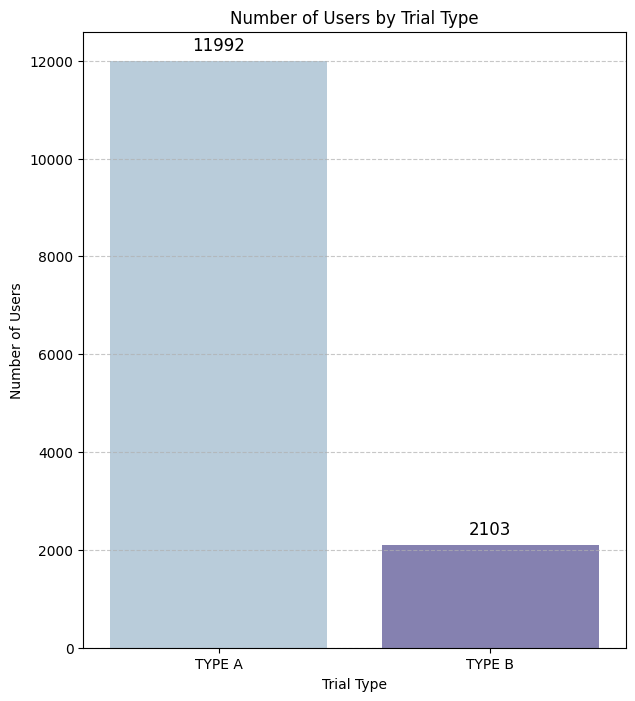

In [326]:
# 데이터 준비
trial_users_data = {
    "Type": ["TYPE A", "TYPE B"],
    "Number of Users": [total_trial_users_A, total_trial_users_B]
}

# DataFrame 생성
trial_users_df = pd.DataFrame(trial_users_data)

# 시각화
plt.figure(figsize=(7, 8))
ax = sns.barplot(data=trial_users_df, x="Type", y="Number of Users", palette= palette)

# 막대 위에 값 표시
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=12, padding=5)

# 그래프 설정
plt.xlabel("Trial Type")
plt.ylabel("Number of Users")
plt.title("Number of Users by Trial Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [327]:
# 2. 회원 가입 완료 회원의 무료 서비스 체험 후 첫 결제 완료(무료 서비스 체험 사용 기간 내)

# 2-1. 중복 결제 내역 제거한 첫 결제 완료 데이터에서 필요한 컬럼만 추출
complete_subscription_final = complete_subscription_df[
    ['user_id', 'complete_sub_time']
]

# 2-2. 무료 체험 유저와 첫 결제 완료 데이터 merge
free_trial_complete = complete_signup_trial.merge(complete_subscription_final, on='user_id', how='left')

# 2-3. 무료 체험 후 첫 결제를 완료한 유저 필터링

#(조건 : start_free_trial_time < complete_subscription_time) : row = 3147 -> 구독전환율
# 무료 체험 서비스 이용 시간이 먼저여야 하는 이유는 만약 첫 결제 완료 후에 무료 체험 레슨을 들었을 변수를 제외시키기 위해서

free_trial_complete_yes = free_trial_complete[
    free_trial_complete['start_free_trial_time'].notna() &  # 무료 체험 시작 시간이 존재하는 경우
    (free_trial_complete['start_free_trial_time'] < free_trial_complete['complete_sub_time']) &  # 무료 체험 후 첫 결제
    (free_trial_complete['client_event_time'] < free_trial_complete['start_free_trial_time'])  # 회원가입 시간이 무료 체험 시작보다 이전
]

# 2-4. 무료 체험 후 첫 결제 완료한 유저 수 및 전환율 계산
free_trial_complete_yes_users = free_trial_complete_yes['user_id'].nunique()
total_trial_users = complete_signup_trial['user_id'].nunique()  # 무료 체험 체험 기간동안 회원가입 후 무료 체험 전체 유저 수

free_trial_complete_yes_rate = (free_trial_complete_yes_users / total_trial_users) * 100

print(f'무료 체험 서비스 이용 후 첫 결제 완료 유저 수 : {free_trial_complete_yes_users}')
print(f'무료 체험 서비스 이용 후 첫 결제 완료 유저 비율 : {free_trial_complete_yes_rate:.2f}%')


무료 체험 서비스 이용 후 첫 결제 완료 유저 수 : 2997
무료 체험 서비스 이용 후 첫 결제 완료 유저 비율 : 21.26%


In [328]:
# Calculate number of users who completed first payment after free trial for each type
free_trial_complete_yes_type = free_trial_complete_yes.groupby("start_free_trial_type")["user_id"].nunique().reset_index()
free_trial_complete_yes_type.columns = ["Trial Type", "Number of Users"]

# Calculate total trial users for each type
total_trial_users_A = complete_signup_trial[complete_signup_trial["start_free_trial_type"] == "A"]["user_id"].nunique()
total_trial_users_B = complete_signup_trial[complete_signup_trial["start_free_trial_type"] == "B"]["user_id"].nunique()

# Calculate conversion rate for each type
free_trial_complete_yes_rate_A = (free_trial_complete_yes_type.loc[free_trial_complete_yes_type["Trial Type"] == "A", "Number of Users"].values[0] / total_trial_users_A) * 100
free_trial_complete_yes_rate_B = (free_trial_complete_yes_type.loc[free_trial_complete_yes_type["Trial Type"] == "B", "Number of Users"].values[0] / total_trial_users_B) * 100

# Print results
print(f'TYPE A - 무료 체험 서비스 이용 후 첫 결제 완료 유저 수: {free_trial_complete_yes_type.loc[free_trial_complete_yes_type["Trial Type"] == "A", "Number of Users"].values[0]}')
print(f'TYPE A - 무료 체험 서비스 이용 후 첫 결제 완료 유저 비율: {free_trial_complete_yes_rate_A:.2f}%')

print(f'TYPE B - 무료 체험 서비스 이용 후 첫 결제 완료 유저 수: {free_trial_complete_yes_type.loc[free_trial_complete_yes_type["Trial Type"] == "B", "Number of Users"].values[0]}')
print(f'TYPE B - 무료 체험 서비스 이용 후 첫 결제 완료 유저 비율: {free_trial_complete_yes_rate_B:.2f}%')


TYPE A - 무료 체험 서비스 이용 후 첫 결제 완료 유저 수: 2129
TYPE A - 무료 체험 서비스 이용 후 첫 결제 완료 유저 비율: 17.75%
TYPE B - 무료 체험 서비스 이용 후 첫 결제 완료 유저 수: 868
TYPE B - 무료 체험 서비스 이용 후 첫 결제 완료 유저 비율: 41.27%


,Trial Type,Number of Users
0,A,2129
1,B,868


C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\3099973154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=free_trial_complete_yes_type, x="Trial Type", y="Number of Users", palette= palette)
C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\3099973154.py:11: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax = sns.barplot(data=free_trial_complete_yes_type, x="Trial Type", y="Number of Users", palette= palette)


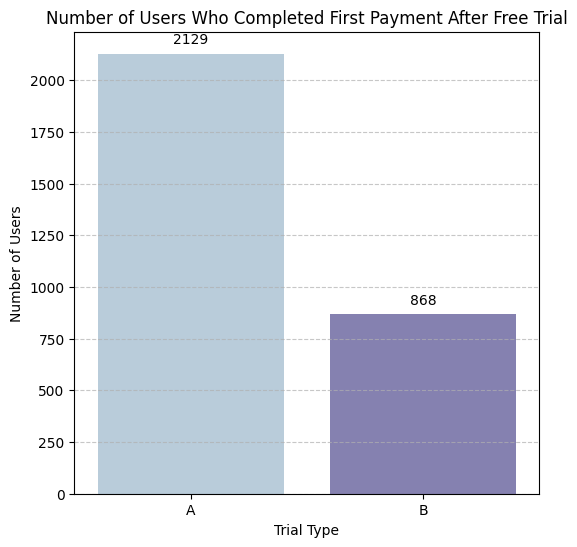

In [329]:
# 타입별 무료 체험 후 첫 결제 완료 유저 수 계산
free_trial_complete_yes_type = free_trial_complete_yes.groupby("start_free_trial_type")["user_id"].nunique().reset_index()

# 컬럼명 변경
free_trial_complete_yes_type.columns = ["Trial Type", "Number of Users"]

# 결과
display(free_trial_complete_yes_type)

plt.figure(figsize=(6, 6))
ax = sns.barplot(data=free_trial_complete_yes_type, x="Trial Type", y="Number of Users", palette= palette)

# 바 그래프 수치 추가
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=10, padding=5)

plt.xlabel("Trial Type")
plt.ylabel("Number of Users")
plt.title("Number of Users Who Completed First Payment After Free Trial")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [330]:
free_trial_complete_yes_type

,Trial Type,Number of Users
0,A,2129
1,B,868


###  TYPE 별 무료 서비스 체험 후 첫 결제까지 걸린 평균 결제 시간 

In [331]:
# 무료 체험 후 첫 결제 까지 걸린 시간(일 단위)
free_complete_yes = free_trial_complete_yes.copy()

free_complete_yes['day_to_conversion'] = (free_complete_yes['complete_sub_time'] - free_complete_yes['start_free_trial_time']).dt.total_seconds() / 86400

# 전체 평균 및 첫 결제까지 소요 시간 
free_complete_yes_avg = free_complete_yes['day_to_conversion'].mean()

# TYPE A와 TYPE B 소요 시간 평균 계산
free_complete_yes_type_avg = free_complete_yes.groupby('start_free_trial_type')['day_to_conversion'].mean()

free_complete_yes_type_avg_df = free_complete_yes_type_avg.reset_index()
free_complete_yes_type_avg_df.columns = ["Trial Type", "Avg Conversion Days"]

print(f"전체 평균 첫 결제 소요 시간: {free_complete_yes_avg:.2f}일")
print("\nType A와 Type B별 평균 첫 결제 소요 시간:")
print(free_complete_yes_type_avg_df.to_string(index=False, float_format="%.2f"))

전체 평균 첫 결제 소요 시간: 21.90일

Type A와 Type B별 평균 첫 결제 소요 시간:
Trial Type  Avg Conversion Days
         A                25.03
         B                14.21


C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\4216840546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=free_complete_yes_type_avg_df, x="Trial Type", y="Avg Conversion Days", palette="Blues")


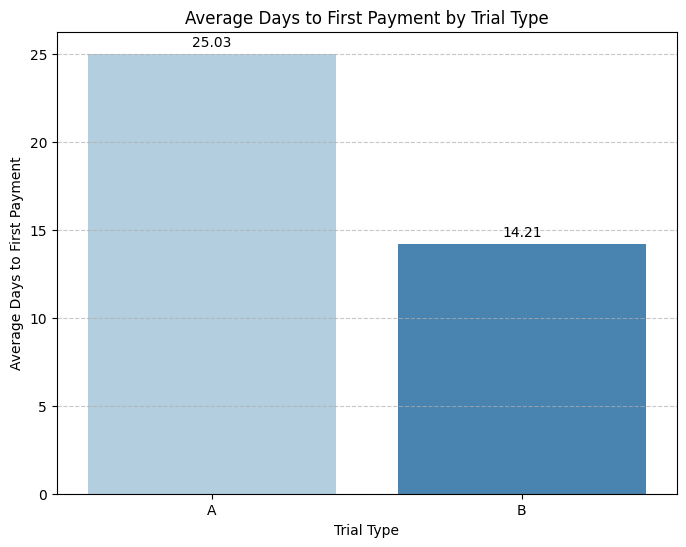

In [332]:
plt.figure(figsize=(8, 6))

# 바 그래프
ax = sns.barplot(data=free_complete_yes_type_avg_df, x="Trial Type", y="Avg Conversion Days", palette="Blues")

# 바 위에 수치 추가
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)

plt.xlabel("Trial Type")
plt.ylabel("Average Days to First Payment")
plt.title("Average Days to First Payment by Trial Type")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [333]:
# Type A 첫 결제까지 가장 빠른 유저 TOP 5
print("=" * 60)  
print("\n Type A - 첫 결제까지 가장 빠른 유저 TOP 5")
print(free_complete_yes[free_complete_yes["start_free_trial_type"] == "A"]
      .nsmallest(5, "day_to_conversion")[["user_id", "day_to_conversion"]]
      .to_string(index=False, float_format="%.2f"))

# Type A 첫 결제까지 가장 오래 걸린 유저 TOP 5
print("=" * 60)  
print("\n Type A - 첫 결제까지 가장 오래 걸린 유저 TOP 5")
print(free_complete_yes[free_complete_yes["start_free_trial_type"] == "A"]
      .nlargest(5, "day_to_conversion")[["user_id", "day_to_conversion"]]
      .to_string(index=False, float_format="%.2f"))
print("=" * 60)


 Type A - 첫 결제까지 가장 빠른 유저 TOP 5
                         user_id  day_to_conversion
5132d6034a176d90984d37332879de8f               0.00
f119804879c79fef8cf2d9b234838d2b               0.00
64df20c898125353f437b65a485104b4               0.00
2bc7a3fa08e1eb7ee8b0ffd74b5cacd9               0.00
f046f930dec0224ebb91e499204b2e46               0.00

 Type A - 첫 결제까지 가장 오래 걸린 유저 TOP 5
                         user_id  day_to_conversion
783e01211e03edc828d55baf6e08a256             711.14
fa58177660c687803ee14ac44f3d5cae             662.17
7f51e642d2a5d1b2586cf4343b7a54d2             611.54
f6657eeff454e7ebe4570bc5f174bb1b             587.17
8664c2eb847f36c445caf1784bd9ae2e             564.94


In [334]:

# Type B 첫 결제까지 가장 빠른 유저 TOP 5
print("=" * 60) 
print("\n Type B - 첫 결제까지 가장 빠른 유저 TOP 5")
print(free_complete_yes[free_complete_yes["start_free_trial_type"] == "B"]
      .nsmallest(5, "day_to_conversion")[["user_id", "day_to_conversion"]]
      .to_string(index=False, float_format="%.2f"))

# Type B 첫 결제까지 가장 오래 걸린 유저 TOP 5
print("=" * 60)  
print("\n Type B - 첫 결제까지 가장 오래 걸린 유저 TOP 5")
print(free_complete_yes[free_complete_yes["start_free_trial_type"] == "B"]
      .nlargest(5, "day_to_conversion")[["user_id", "day_to_conversion"]]
      .to_string(index=False, float_format="%.2f"))
print("=" * 60) 


 Type B - 첫 결제까지 가장 빠른 유저 TOP 5
                         user_id  day_to_conversion
9611d4cacc12eca45b2c56e76d99a447               0.00
3e0f99f28e28196e4a267d19c335f444               0.00
6125c2ddf601a13532204ccd2f6e587d               0.01
5288c36731e73a1941699d37f3a69a27               0.01
3c701c93fb7895d4316698c1bc6117c4               0.01

 Type B - 첫 결제까지 가장 오래 걸린 유저 TOP 5
                         user_id  day_to_conversion
d162f934feab36bd13e9da679fd3e4ad             296.70
433cc7db3d9f741cf9a1108d8f78e777             269.82
6c65d646cdbb1bea21fcbc37173404f4             258.61
7079785832f489a60be4583d4858a88d             244.92
2a5784ad88b5e6ca7d692da3c39f597d             232.89


In [335]:
# # TYPE B의 플랜별 첫 결제까지 결린 시간

# # Type B의 'start_free_trial_plan_type' 기준으로 첫 결제까지 걸린 시간 분석
# b_plan_types = free_complete_yes[free_complete_yes["start_free_trial_type"] == "B"]["start_free_trial_plan_type"].unique()

# for plan_type in b_plan_types:
#     plan_df = free_complete_yes[(free_complete_yes["start_free_trial_type"] == "B") &
#                                 (free_complete_yes["start_free_trial_plan_type"] == plan_type)]
    
#     # 평균 첫 결제 소요 시간
#     avg_days_to_conversion = plan_df["day_to_conversion"].mean()
    
#     print(f"\n Type B - {plan_type} - 평균 첫 결제 소요 시간: {avg_days_to_conversion:.2f}일")
    
#     # 가장 빠른 유저 TOP 5
#     print(f"\n Type B - {plan_type} - 첫 결제까지 가장 빠른 유저 TOP 5")
#     print(plan_df.nsmallest(5, "day_to_conversion")[["user_id", "day_to_conversion"]]
#           .to_string(index=False, float_format="%.2f"))

#     # 가장 오래 걸린 유저 TOP 5
#     print(f"\n Type B - {plan_type} - 첫 결제까지 가장 오래 걸린 유저 TOP 5")
#     print(plan_df.nlargest(10, "day_to_conversion")[["user_id", "day_to_conversion"]]
#           .to_string(index=False, float_format="%.2f"))
    
#     print("=" * 70)


In [336]:
long_conversion_users_B = free_complete_yes[
    (free_complete_yes["start_free_trial_type"] == "B") & 
    (free_complete_yes["day_to_conversion"] >= 50)
]
long_conversion_users_B['user_id'].nunique()

40

C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\3747629084.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=free_complete_yes["start_free_trial_type"], y=free_complete_yes["day_to_conversion"], palette = palette)
C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\3747629084.py:1: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  sns.boxplot(x=free_complete_yes["start_free_trial_type"], y=free_complete_yes["day_to_conversion"], palette = palette)


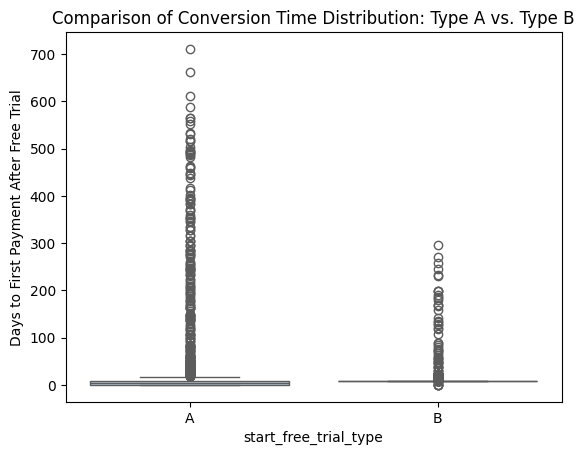

In [337]:
sns.boxplot(x=free_complete_yes["start_free_trial_type"], y=free_complete_yes["day_to_conversion"], palette = palette)
plt.ylabel("Days to First Payment After Free Trial")
plt.title("Comparison of Conversion Time Distribution: Type A vs. Type B") # 결제 소요 시간 비교
plt.show()

- 여기서 이상치는 무료 체험 서비스의 영향을 받는 기간을 지나 첫 결제를 진행한 유저들을 칭함

1. TYPE A    

- Type A는 전환 시간이 훨씬 길고 이상치가 많음    

- Type A는 700일 가까이 걸린 유저도 존재 → 일부 유저는 무료 체험 후 매우 오랜 시간이 지난 후 결제(무료 체험이 첫 결제에 미치는 영향이 극히 적을 것으로 예상 할 수 있음)    

- 박스가 매우 짧고 위쪽으로 이상치가 많음 → 대부분의 유저는 빠르게 전환하지만, 일부는 매우 늦게 결제    

2. TYPE B    
- Type B는 상대적으로 빠르게 전환됨     

- Type B는 최대 300일 정도 이상치가 존재하지만, Type A보다 확연히 적음       
 
- 박스가 더 길고 이상치 분포가 상대적으로 적음 → Type B는 좀 더 균일한 전환 패턴을 보임(그래도 장시간 이후에 첫 결제라면 무료 체험의 영향력은 작다고 판단)


### 무료 서비스 체험의 영향으로 첫 결제까지 이어진 유저 재지정

- TYPE A (영구 무료 체험)    

    - 무료 체험이 영구적이기 때문에, 사용자는 즉시 결제할 필요가 없음.    

    - 하지만 무료 체험 서비스가 일정 기간 동안 영향을 주어 결제로 이어지는 시점이 존재할 가능성이 있음.    

    - 무료 체험의 "잔존 효과" 반영    
        - 무료 체험이 끝나지 않더라도, 무료 체험의 영향으로 일정 기간 내 결제를 유도할 가능성이 있음.

In [338]:
# 특정 기간 내 첫 결제한 유저 수를 계산하는 함수 (누적 아님)
def count_conversions_in_period(conversion_data, start_day, end_day=None):
    """
    특정 시작일과 종료일 사이에 첫 결제를 완료한 유저 수를 계산하는 함수.
    - end_day가 None이면 start_day 이후(first conversion > start_day) 모든 유저를 포함
    """
    if end_day is None:  # 90일 이후 유저 수 계산
        return (conversion_data > start_day).sum()
    return ((conversion_data > start_day) & (conversion_data <= end_day)).sum()

# 전환율 분석 기간 설정 (7일, 15일, 30일, 60일, 90일, 90일 이후)
conversion_periods = [(0, 7), (7, 15), (15, 30), (30, 60), (60, 90), (90, None)]  # 90일 초과 추가

# TYPE A와 TYPE B 유저 데이터 분리
type_A_conversion = free_complete_yes[free_complete_yes["start_free_trial_type"] == "A"]["day_to_conversion"]
type_B_conversion = free_complete_yes[free_complete_yes["start_free_trial_type"] == "B"]["day_to_conversion"]

# 각 기간별 첫 결제 유저 수 계산
conversion_counts_A = {f"{start} - {end} days" if end else f"{start} + days": count_conversions_in_period(type_A_conversion, start, end) 
                       for start, end in conversion_periods}

conversion_counts_B = {f"{start} - {end} days" if end else f"{start} + days": count_conversions_in_period(type_B_conversion, start, end) 
                       for start, end in conversion_periods}

# 데이터프레임 생성
conversion_df = pd.DataFrame({
    "무료 체험 시작 후 첫 결제까지 소요 시간": list(conversion_counts_A.keys()),
    "TYPE A ": list(conversion_counts_A.values()),
    "TYPE B ": list(conversion_counts_B.values())
})

conversion_df

,무료 체험 시작 후 첫 결제까지 소요 시간,TYPE A,TYPE B
0,0 - 7 days,1223,5
1,7 - 15 days,599,781
2,15 - 30 days,78,32
3,30 - 60 days,66,15
4,60 - 90 days,20,10
5,90 + days,143,25


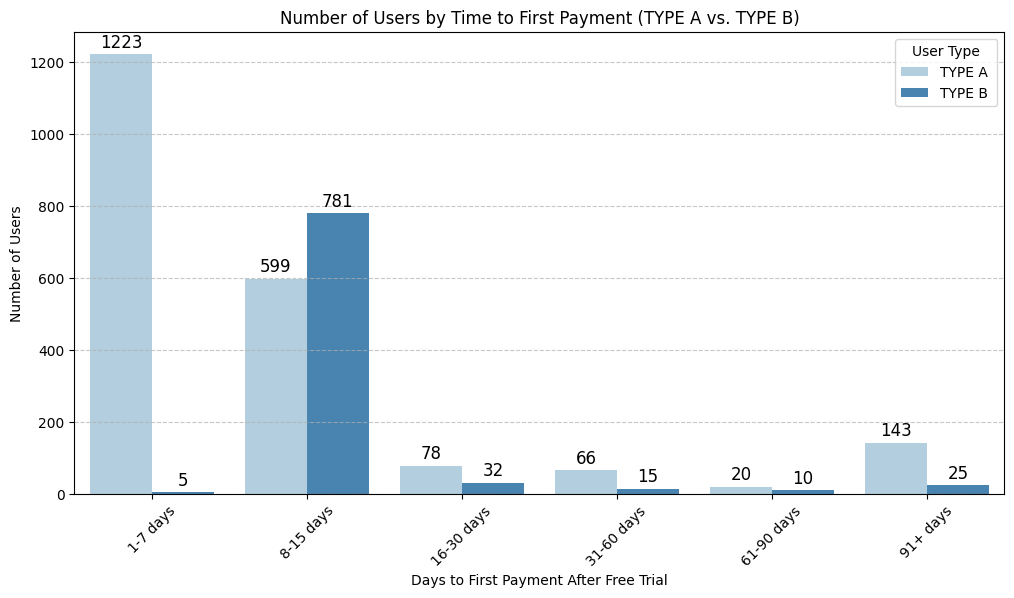

In [339]:
# 각 타입별 무료 체험 시작 후 첫 결제까지 소요 시간별 유저 수"

# Rename columns for visualization
conversion_df.rename(columns={
    "무료 체험 시작 후 첫 결제까지 소요 시간": "Days to First Payment",
    "TYPE A 30일 이내 첫 결제 유저 수": "TYPE A Conversions",
    "TYPE B 30일 이내 첫 결제 유저 수": "TYPE B Conversions"
}, inplace=True)

# Convert DataFrame to long format for seaborn
conversion_melted_df = conversion_df.melt(id_vars=["Days to First Payment"],
                                          var_name="User Type", value_name="Number of Users")

# 시각화

new_labels = ["1-7 days", "8-15 days", "16-30 days", "31-60 days", "61-90 days", "91+ days"]

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=conversion_melted_df, x="Days to First Payment",
            y="Number of Users", hue="User Type", palette="Blues")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=12, padding=2)


plt.xlabel("Days to First Payment After Free Trial")
plt.ylabel("Number of Users")
plt.title("Number of Users by Time to First Payment (TYPE A vs. TYPE B)")
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)
plt.legend(title="User Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


- TYPE A

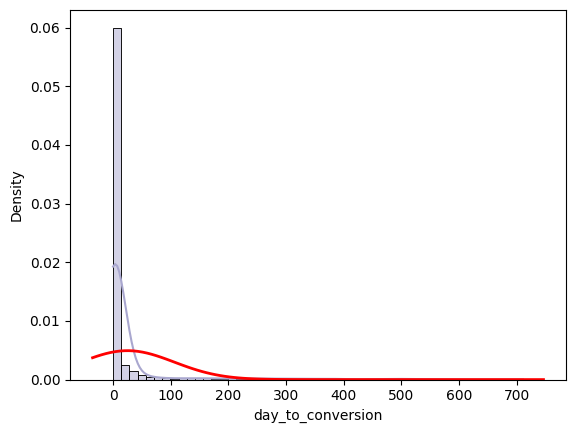

In [340]:
import scipy.stats as stats

type_A_conversion_times = free_complete_yes[free_complete_yes["start_free_trial_type"] == "A"]["day_to_conversion"]

sns.histplot(type_A_conversion_times, bins=50, kde=True, color= palette[5], stat="density", label="실제 데이터")
mu, std = np.mean(type_A_conversion_times), np.std(type_A_conversion_times)
xmin, xmax = plt.xlim()  # xmin, xmax 값 설정
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label="정규 분포 곡선")

- 0 ~ 7일 이내에 결제한 유저가 압도적으로 많아 보임
- KDE선도 0 ~7일 이내에 가장 높은 피크를 가짐 -> 무료 체험 후 즉각적인 전환 효과
- 대부분의 유저는 무료 체험 후 매우 빠르게 결제한 것으로 보임

- 우측으로 긴 꼬리 : 일부 매우 오랜 시간이 걸려 결제한 유저가 존재
    - 50일, 100일 이상 후에 결제한 유저들
    - 최대 700일

- 정규 분포곡선
    - 정규 분포 곡선(정규 분포 가정)과 KDE(실제 데이터 분포)가 다름

- 대부분의 유저가 무료 체험 후 빠르게 첫 결제로 이루어졌음을 알 수 있음 -> 무료 체험 효과
- 일부 유저 50일 이상 걸려서 결제 -> 이들은 무료 체험의 직접적인 효과보다는 다른 요인에 의해 결제 가능성 높음

In [341]:
# # TYPE A를 이용한 유저

# # 90% 기준(상위 10% 제외)으로 결제 소요 시간 계산 (Type A만)
# q90_value_A = free_complete_yes[free_complete_yes["start_free_trial_type"] == "A"]["day_to_conversion"].quantile(0.90)

# # Type A에서 90% 이하 유저 데이터 (상위 10% 제외) -> 얘네를 무료 체험 이후 첫 결제로 넘어간 type A 유저로 : 전환율 계산시(분모)  
# free_complete_yes_90_A = free_complete_yes[
#     (free_complete_yes["start_free_trial_type"] == "A") & 
#     (free_complete_yes["day_to_conversion"] <= q90_value_A)
# ]

# # Type A에서 90% 이상 유저 데이터 (상위 10%)
# free_complete_yes_10_A = free_complete_yes[
#     (free_complete_yes["start_free_trial_type"] == "A") & 
#     (free_complete_yes["day_to_conversion"] > q90_value_A)
# ]

# # 유저 수 계산
# num_conversion_users_90_A = free_complete_yes_90_A["user_id"].nunique()
# num_conversion_users_10_A = free_complete_yes_10_A["user_id"].nunique()

# # 결과 출력
# print(f"Type A - 90% 이하 유저 수: {num_conversion_users_90_A}명")
# print(f"Type A - 상위 10% 유저 수: {num_conversion_users_10_A}명")

In [342]:
# TYPE A를 이용한 유저

# 30일 기준으로 결제 소요 시간 필터링 (Type A만)
threshold_A = 61

# Type A에서 30일 이하 유저 데이터 (빠르게 결제한 유저)
free_complete_yes_30_A = free_complete_yes[
    (free_complete_yes["start_free_trial_type"] == "A") & 
    (free_complete_yes["day_to_conversion"] <= threshold_A)
]

# Type A에서 30일 초과 유저 데이터 (늦게 결제한 유저)
free_complete_yes_above_30_A = free_complete_yes[
    (free_complete_yes["start_free_trial_type"] == "A") & 
    (free_complete_yes["day_to_conversion"] > threshold_A)
]

# 유저 수 계산
num_conversion_users_30_A = free_complete_yes_30_A["user_id"].nunique()
num_conversion_users_above_30_A = free_complete_yes_above_30_A["user_id"].nunique()

# 결과 출력
print(f"Type A - 30일 이하 유저 수: {num_conversion_users_30_A}명")
print(f"Type A - 30일 초과 유저 수: {num_conversion_users_above_30_A}명")

Type A - 30일 이하 유저 수: 1968명
Type A - 30일 초과 유저 수: 161명


In [343]:
# TYPE A의 30일 이하 유저 결제 시간 기초 통계량(무료 체험 후 30일 이내 첫 결제)
print('TYPE A 결제까지 61일 이하 결제 시간 기초 통계')
print(free_complete_yes_30_A["day_to_conversion"].describe())
print('-' * 60)
# TYPE A의 30일 초과 유저 결제 시간 기초 통계량(무료 체험 후 30일 초과 첫 결제)
print('TYPE A 결제까지 61일 초과 결제 시간 기초 통계')
print(free_complete_yes_above_30_A["day_to_conversion"].describe())

TYPE A 결제까지 61일 이하 결제 시간 기초 통계
count    1968.000000
mean        5.383585
std         8.878704
min         0.000173
25%         0.019196
50%         2.370563
75%         7.003350
max        60.122673
Name: day_to_conversion, dtype: float64
------------------------------------------------------------
TYPE A 결제까지 61일 초과 결제 시간 기초 통계
count    161.000000
mean     265.236288
std      152.658210
min       62.724213
25%      139.021306
50%      241.970616
75%      369.215111
max      711.135931
Name: day_to_conversion, dtype: float64


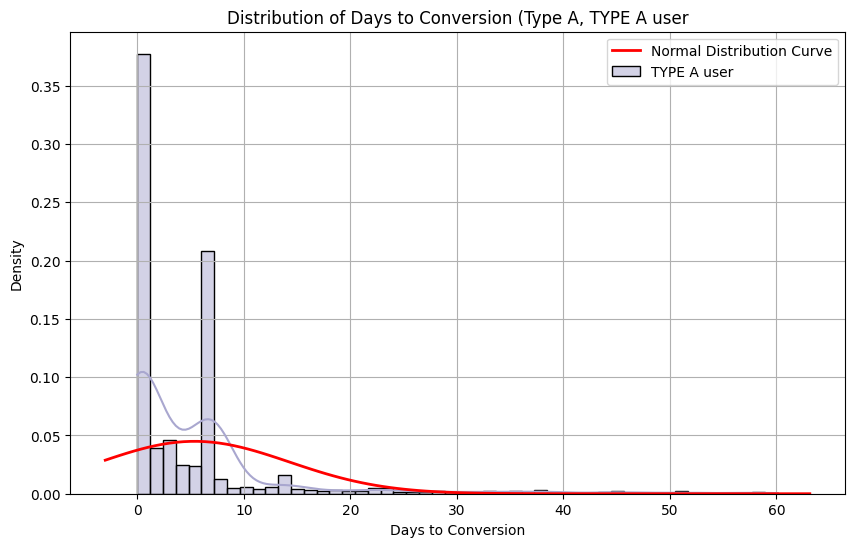

In [344]:
# 30일 이내 첫 결제 소요 시간 데이터 추출
type_A_conversion_days_30 = free_complete_yes_30_A["day_to_conversion"]

# 히스토그램 & KDE 시각화
plt.figure(figsize=(10, 6))
sns.histplot(type_A_conversion_days_30, bins=50, kde=True, color=palette[5], stat="density", label="TYPE A user") # a타입

# 정규 분포 곡선 추가
mu_90, std_90 = np.mean(type_A_conversion_days_30), np.std(type_A_conversion_days_30)
xmin, xmax = plt.xlim()  # x축 범위 설정
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_90, std_90)
plt.plot(x, p, 'r', linewidth=2, label="Normal Distribution Curve") # label = "정규분포곡선"

# 그래프 설정
plt.xlabel("Days to Conversion")
plt.ylabel("Density")
plt.title("Distribution of Days to Conversion (Type A, TYPE A user")
plt.legend()
plt.grid()

# 그래프 출력
plt.show()

<90% 이하 결제 시간 유저들>
- 무료 체험 후 90% 이내 유저(약 53일 이하 결제)가 실제 영향을 받은 그룹
- 평균 6일만에 결제 -> 무료 체험이 유저들에게 첫 결제로 이어지게 하는데 효과가 있었다.
- 표준 편차(약9일) 유저가 평균(6.04일)을 기준으로 ± 9일 범위 안에 많은 유저가 존재한다는 것 -> 전환율 분석 가능
- 즉 무료 체험 후 대부분이 유저가 6 ± 9일(즉, 0일~15일 사이)에 결제한 것을 알 수 있음
- 표준편차가 상대적으로 크지 않으며, 분포 또한 급격히 퍼져 있지 않음
- Q3가 7.01일로 유저가 7일 이내 결제했다는 것 -> 표준편차와 잘 맞아 떨어짐

<상위 10% 결제 시간 유저>
- 표준편차 151일(지나치게 큼)로 평균 229일 ± 151일 범위로 너무 넓게 퍼져 있음 -> 변동성이 크다
- 결제까지 걸린 시간이 일정하지 않고 매우 불규칙함
- 무료 체험 서비스의 직접적인 영향을 받았다고 보기 어려움

-------------------------------------------------------------------------------------------------------------------------
- TYPE B

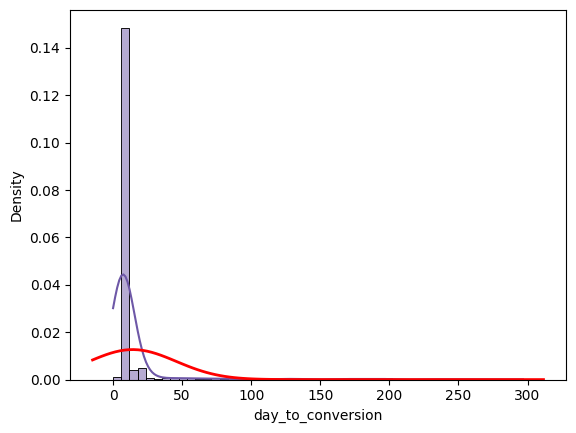

In [345]:
import scipy.stats as stats

type_B_conversion_times = free_complete_yes[free_complete_yes["start_free_trial_type"] == "B"]["day_to_conversion"]

sns.histplot(type_B_conversion_times, bins=50, kde=True, color= palette[3], stat="density", label="실제 데이터")
mu, std = np.mean(type_B_conversion_times), np.std(type_B_conversion_times)
xmin, xmax = plt.xlim()  # xmin, xmax 값 설정
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label="정규 분포 곡선")


- 빨간색 곡선(정규 분포 곡선) : 동일한 평균과 표준편차를 가진 정규 분포
    - 정규 분포 곡선과 실제 데이터의 분포가 크게 다름
    - 정규 분포 x -> 우측으로 치우져 있음
    - 평균 근처에 데이터가 분포해야하지만, 실제 데이터는 0 ~ 7일에 몰려 있다 이후 줄어드는 형태
    - 평균보다는 중앙값이 신뢰도 높을 수도?? .... 몰라...(상위 10% 없애면 뭔가 바뀌겠지)

- 0~7일 이내에 결제한 유저가 절대적으로 많음

- 가장 높은 피크 부분 : 대부분 유저가 무료 체험 후(7일 후) 결제 이루어지게 유지함 

- 우측으로 긴 꼬리 : 일부 매우 오랜 시간 걸려 결제
    - 일부 유저들 50일 이상 후에 결제함
    - 100일 이후도 소수 존재

In [346]:
# TYPE B의 기초 통계량
print(free_complete_yes[free_complete_yes["start_free_trial_type"] == "B"]["day_to_conversion"].describe())

count    868.000000
mean      14.207244
std       31.523104
min        0.003013
25%        7.001104
50%        7.002172
75%        7.003219
max      296.702592
Name: day_to_conversion, dtype: float64


- 표준 편차 35일 -> 결제 소요 시간이 평균적으로 ±35일 정도 차이가 남
- 평균 15.44일보다 표준편차 35일이 훨씬 크기 때문에 비대칭 분포 가능성 높음
- 75%의 유저가 7일 이내에 결제를 했지만 일부 유저는 306일 후 결제 -> 극단적으로 결제 시간이 긴 유저의 존재로 인해 표준 편차 증가
- TYPE B의 경우 플랜을 구독하게 되면 7일 무료 체험이 끝난 후 구독을 취소하지 않는 한 첫 결제가 이루어짐
- 그렇기 때문에 대부분 무료 체험 서비스 시작부터 첫 결제가 이루어지기까지 7일이 소요됨

In [347]:
# # TYPE B를 이용한 유저

# # 90% 기준(상위 10% 제외)으로 결제 소요 시간 계산 (Type A만)
# q90_value_B = free_complete_yes[free_complete_yes["start_free_trial_type"] == "B"]["day_to_conversion"].quantile(0.90)

# # Type A에서 90% 이하 유저 데이터 (상위 10% 제외) -> 얘네를 무료 체험 이후 첫 결제로 넘어간 type B 유저로 : 전환율 계산시(분모)  
# free_complete_yes_90_B = free_complete_yes[
#     (free_complete_yes["start_free_trial_type"] == "B") & 
#     (free_complete_yes["day_to_conversion"] <= q90_value_B)
# ]

# # Type A에서 90% 이상 유저 데이터 (상위 10%)
# free_complete_yes_10_B = free_complete_yes[
#     (free_complete_yes["start_free_trial_type"] == "B") & 
#     (free_complete_yes["day_to_conversion"] > q90_value_B)
# ]

# # 유저 수 계산
# num_conversion_users_90_B = free_complete_yes_90_B["user_id"].nunique()
# num_conversion_users_10_B = free_complete_yes_10_B["user_id"].nunique()

# # 결과 출력
# print(f"Type B - 90% 이하 유저 수: {num_conversion_users_90_B}명")
# print(f"Type B - 상위 10% 유저 수: {num_conversion_users_10_B}명")

In [348]:
# TYPE B를 이용한 유저

# 30일 기준으로 결제 소요 시간 필터링 (Type B만)
threshold_B = 60

# Type A에서 30일 이하 유저 데이터 (빠르게 결제한 유저)
free_complete_yes_30_B = free_complete_yes[
    (free_complete_yes["start_free_trial_type"] == "B") & 
    (free_complete_yes["day_to_conversion"] <= threshold_B)
]

# Type A에서 30일 초과 유저 데이터 (늦게 결제한 유저)
free_complete_yes_above_30_B = free_complete_yes[
    (free_complete_yes["start_free_trial_type"] == "B") & 
    (free_complete_yes["day_to_conversion"] > threshold_B)
]

# 유저 수 계산
num_conversion_users_30_B = free_complete_yes_30_B["user_id"].nunique()
num_conversion_users_above_30_B = free_complete_yes_above_30_B["user_id"].nunique()

# 결과 출력
print(f"Type B - 30일 이하 유저 수: {num_conversion_users_30_B}명")
print(f"Type B - 30일 초과 유저 수: {num_conversion_users_above_30_B}명")

Type B - 30일 이하 유저 수: 833명
Type B - 30일 초과 유저 수: 35명


In [349]:
# TYPE B의 30일 이하 유저 결제 시간 기초 통계량(무료 체험 후 30일 이내 첫 결제)
print('TYPE B 결제까지 61일 이하 결제 시간 기초 통계')
print(free_complete_yes_30_B["day_to_conversion"].describe())
print('-' * 60)
# TYPE B의 30일 초과 유저 결제 시간 기초 통계량(무료 체험 후 30일 초과 첫 결제)
print('TYPE A 결제까지 61일 초과 결제 시간 기초 통계')
print(free_complete_yes_above_30_B["day_to_conversion"].describe())

TYPE B 결제까지 61일 이하 결제 시간 기초 통계
count    833.000000
mean       8.437338
std        6.075141
min        0.003013
25%        7.001066
50%        7.002097
75%        7.003108
max       59.450705
Name: day_to_conversion, dtype: float64
------------------------------------------------------------
TYPE A 결제까지 61일 초과 결제 시간 기초 통계
count     35.000000
mean     151.531001
std       64.871076
min       62.337262
25%       88.885866
50%      141.091300
75%      193.643672
max      296.702592
Name: day_to_conversion, dtype: float64


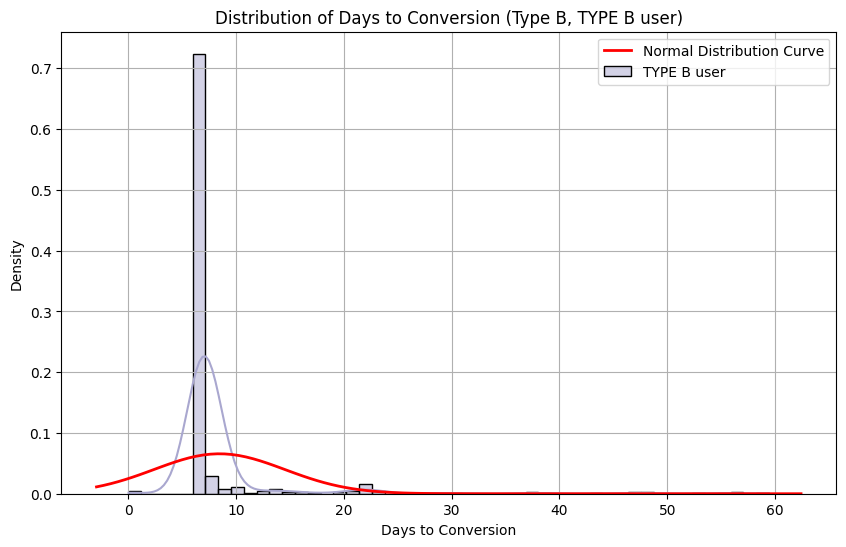

In [350]:
# 90% 이하 유저의 결제 소요 시간 데이터 추출
type_B_conversion_days_30 = free_complete_yes_30_B["day_to_conversion"]

# 히스토그램 & KDE 시각화
plt.figure(figsize=(10, 6))
sns.histplot(type_B_conversion_days_30, bins=50, kde=True, color=palette[5], stat="density", label="TYPE B user") # B 타입

# 정규 분포 곡선 추가
mu_90, std_90 = np.mean(type_B_conversion_days_30), np.std(type_B_conversion_days_30)
xmin, xmax = plt.xlim()  # x축 범위 설정
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_90, std_90)
plt.plot(x, p, 'r', linewidth=2, label="Normal Distribution Curve") # label = "정규분포곡선"

# 그래프 설정
plt.xlabel("Days to Conversion")
plt.ylabel("Density")
plt.title("Distribution of Days to Conversion (Type B, TYPE B user)")
plt.legend()
plt.grid()

# 그래프 출력
plt.show()

In [351]:
# 4. TYPE별 무료체험에서 첫 결제 전환율 -> 분자 : 각 타입별 무료 체험 서비스 이용 후 첫 결제를 진행한 유저 수
#                                        분모 : 각 타입별 기간 동안 무료 체험 서비스를 이용한 유저 수 

# 4-1. 무료 체험 서비스 이용 후 TYPE A의 첫 결제 전환율

# A 타입 무료 체험 기간 동안 무료체험 전체 유저 수
# total_trial_complete_users_A = signup_free_trial[
#                                                (signup_free_trial['start_free_trial_time'] >= A_start) &
#                                                       (signup_free_trial['start_free_trial_time'] <= A_end)]

# total_A_users_count = total_trial_complete_users_A['user_id'].nunique()

# A 타입 무료 체험 후 첫 결제 완료 유저
free_trial_complete_A = free_complete_yes_30_A[free_complete_yes_30_A['start_free_trial_type'] == 'A']

A_users_count =  free_trial_complete_A['user_id'].nunique()

A_conversation_rate = (A_users_count / total_trial_users_A) * 100



# 4-2. 무료 체험 서비스 이용 후 TYPE B의 첫 결제 전환율 

# # B 타입 무료 체험 기간
# B_start_date = free_trial_complete_yes[free_trial_complete_yes['start_free_trial_type'] == 'B']['start_free_trial_time'].min()
# B_end_date = free_trial_complete_yes[free_trial_complete_yes['start_free_trial_type'] == 'B']['start_free_trial_time'].max()



# # B 타입 무료 체험 기간 동안 무료체험 전체 유저 수
# total_trial_complete_users_B = signup_free_trial[
#                                                (signup_free_trial['start_free_trial_time'] >= B_start) & 
#                                                (signup_free_trial['start_free_trial_time'] <= B_end)]


# total_B_users_count = total_trial_complete_users_B['user_id'].nunique()

# B 타입 무료 체험 후 첫 결제 완료 유저
free_trial_complete_B = free_complete_yes_30_B[free_complete_yes_30_B['start_free_trial_type'] == 'B']


B_users_count =  free_trial_complete_B['user_id'].nunique()

B_conversation_rate = (B_users_count /total_trial_users_B) * 100

print(f'TYPE A 기간 무료체험 전체 유저 수 : {total_trial_users_A}')
print(f'TYPE A의 첫 결제 전환 유저 수 : {A_users_count}')
print(f'TYPE A의 첫 결제 전환율 : {A_conversation_rate:.2f}%')

print('-' * 60)

print(f'TYPE B 기간 무료체험 전체 유저 수 : {total_trial_users_B}')
print(f'TYPE B의 첫 결제 전환 유저 수 : {B_users_count}')
print(f'TYPE B의 첫 결제 전환율 : {B_conversation_rate:.2f}%')

TYPE A 기간 무료체험 전체 유저 수 : 11992
TYPE A의 첫 결제 전환 유저 수 : 1968
TYPE A의 첫 결제 전환율 : 16.41%
------------------------------------------------------------
TYPE B 기간 무료체험 전체 유저 수 : 2103
TYPE B의 첫 결제 전환 유저 수 : 833
TYPE B의 첫 결제 전환율 : 39.61%


In [352]:
# # TYPE B의 플랜별 첫 결제 전환 유저 수와 전환율 -> 플랜 상관없이 무료체험 7일 후 첫 결제로 넘어가는 거라 의미가 있는지 모르겠다. 

# # B 타입 전체 무료 체험 유저 수 (각 플랜별) 

# # B 타입 무료 체험 기간 동안 무료체험 전체 유저 수
# total_B_users_count = total_trial_complete_users_B['user_id'].nunique()

# # PLAN 1개월  
# total_users_1m = signup_free_trial[
#     (signup_free_trial["start_free_trial_type"] == "B") &
#     (signup_free_trial["start_free_trial_plan_type"] == "1개월 플랜") &
#     (signup_free_trial["start_free_trial_time"] >= B_start_date) &
#     (signup_free_trial["start_free_trial_time"] <= B_end_date)
# ]["user_id"].nunique()


# # PLAN 12개월
# total_users_12m = signup_free_trial[
#     (signup_free_trial["start_free_trial_type"] == "B") &
#     (signup_free_trial["start_free_trial_plan_type"] == "12개월 플랜") &
#     (signup_free_trial["start_free_trial_time"] >= B_start_date) &
#     (signup_free_trial["start_free_trial_time"] <= B_end_date)
# ]["user_id"].nunique()

# # B 타입 무료 체험 후 첫 결제 완료 유저 수 (각 플랜별)

# # PLAN 1개월 무료 체험 후 첫 결제 완료 유저 수
# converted_users_1m = free_complete_yes_30_B[
#     (free_complete_yes_30_B["start_free_trial_type"] == "B") &
#     (free_complete_yes_30_B["start_free_trial_plan_type"] == "1개월 플랜")]["user_id"].nunique()

# # PLAN 12개월 무료 체험 후 첫 결제 완료 유저 수 
# converted_users_12m = free_complete_yes_30_B[
#     (free_complete_yes_30_B["start_free_trial_type"] == "B") &
#     (free_complete_yes_30_B["start_free_trial_plan_type"] == "12개월 플랜")]["user_id"].nunique()

# # 전환율 계산
# conversion_rate_1m = (converted_users_1m / total_B_users_count) * 100
# conversion_rate_12m = (converted_users_12m / total_B_users_count) * 100

# # 결과 출력
# print("<TYPE B의 무료 체험 기간 동안 PLAN별 첫 결제 완료한 유저 분석>")

# print(f'TYPE B 기간 무료체험 전체 유저 수 : {total_trial_users_B}')

# print(f"\n TYPE B (1개월 플랜)")
# print(f" - 무료 체험 TYPE B의 1개월 플랜 유저 수: {total_users_1m}")
# print(f" - TYPE B의 1개월 플랜 첫 결제 완료 유저 수: {converted_users_1m}")
# print(f" - TYPE B의 1개월 플랜 첫 결제 전환율: {conversion_rate_1m:.2f}%")

# print("=" * 60)

# print(f"\n TYPE B (12개월 플랜)")
# print(f" - TYPE B의 12개월 플랜 무료 체험 유저 수: {total_users_12m}")
# print(f" - TYPE B의 12개월 플랜 첫 결제 완료 유저 수: {converted_users_12m}")
# print(f" - TYPE B의 12개월 플랜 첫 결제 전환율: {conversion_rate_12m:.2f}%")


In [353]:
# <루팡>
# 3. 무료 체험 후 첫 결제를 하지 않은 유저 필터링 

# 3-1. 무료 체험 후 첫 결제를 하지 않은 유저 필터링
free_trial_complete_no = free_trial_complete[
    free_trial_complete['start_free_trial_time'].notna() &  # 무료 체험을 한 유저
    free_trial_complete['complete_sub_time'].isna()  # 첫 결제 기록이 없는 유저
]

# 3-3.무료 체험 후 첫 결제를 하지 않은 유저 수
free_trial_complete_no_users = free_trial_complete_no['user_id'].nunique()

# 3-4.무료 체험 후 첫 결제를 하지 않은 유저 비율 계산
free_trial_complete_no_rate = (free_trial_complete_no_users / total_trial_users) * 100

print(f'무료 체험 후 첫 결제를 하지 않은 유저 수 : {free_trial_complete_no_users}')
print(f'무료 체험 후 첫 결제를 하지 않은 유저 비율 : {free_trial_complete_no_rate:.2f}%')


무료 체험 후 첫 결제를 하지 않은 유저 수 : 11036
무료 체험 후 첫 결제를 하지 않은 유저 비율 : 78.30%


In [354]:
# 위에서 무료 체험 서비스 이용 후 첫 결제까지 30일 초과한 유저들

# 4-1. free_complete_yes_10_B + free_complete_yes_10_A
free_trial_complete_long = pd.concat([free_complete_yes_30_A, free_complete_yes_30_B]).drop_duplicates()

# 4-2.무료 체험 후 첫 결제까지 오래 걸린 유저 수
free_trial_complete_long_users = free_trial_complete_long['user_id'].nunique()

# 4-3.무료 체험 후 첫 결제까지 오래 걸린 유저 비율 계산
free_trial_complete_long_rate = (free_trial_complete_long_users / total_trial_users) * 100

print(f'무료 체험 후 첫 결제까지 오래 걸린 유저 수 : {free_trial_complete_long_users}')
print(f'무료 체험 후 첫 결제까지 오래 걸린 유저 비율 : {free_trial_complete_long_rate:.2f}%')

무료 체험 후 첫 결제까지 오래 걸린 유저 수 : 2801
무료 체험 후 첫 결제까지 오래 걸린 유저 비율 : 19.87%


In [254]:
# 5. 회원 가입 후 첫 결제가 무료 체험보다 먼저 발생한 유저

# free_trial_complete(첫 결제제는 무료 체험 + 첫 결제 데이터를 단순히 merge 한 후 무료체험시작 시간과 첫 결제 완료 시간 순서를 고려하지 않은 merge
# free_trial_yes는 free_trial_complete 

# 5-1. 무료 체험을 한 유저 중, 첫 결제 여부가 확인된 유저 (결제한 유저 + 결제하지 않은 유저)
classified_users = pd.concat([free_trial_complete_yes[['user_id']], free_trial_complete_no[['user_id']]])

# 5-2. 무료 체험을 한 전체 유저에서, 첫 결제 여부가 확인된 유저를 제외
unclassified_users_df = free_trial_complete.merge(classified_users, on='user_id', how='left', indicator=True)

# 5-3. 어디에도 속하지 않은 유저 찾기 (_merge 값이 'left_only'인 유저)
unclassified_users_df = unclassified_users_df[unclassified_users_df['_merge'] == 'left_only'].drop(columns=['_merge'])
unclassified_users_df1 = unclassified_users_df['user_id'].nunique()
# 5-4. 결과 출력
print(f'회원 가입 유저 중 첫 결제 후 무료 체험을 이용한 유저 수: {unclassified_users_df1}명')

unclassified_users_df.head()

회원 가입 유저 중 첫 결제 후 무료 체험을 이용한 유저 수: 17명


,user_id,start_free_trial_time,start_free_trial_type,client_event_time,complete_sub_time
2233,8d97d064ff5e2a109b2e6219fb722584,2022-02-10 19:43:21.802,A,2022-02-10 10:23:58.557,2022-02-10 19:28:13.399
3913,02805904483310fc050f7c05f33b6434,2022-03-16 15:21:24.650,A,2022-03-16 14:30:44.609,2022-03-16 15:19:38.570
4480,40079d8c25087ef25218fad3f18cab83,2022-03-26 12:40:10.331,A,2022-03-20 17:19:55.144,2022-03-26 12:34:32.020
5295,4b7ef7369a018e815b8c3649e25626b1,2022-04-07 21:59:09.234,A,2022-02-08 10:43:40.683,2022-04-07 21:55:04.606
5496,4ec9d9c0a325f161e56e766292f15670,2022-04-12 05:50:15.857,A,2022-04-12 03:21:34.578,2022-04-12 05:46:45.359


C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\1153486609.py:14: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  sns.barplot(data=conversion_df, x="type", y="conversion Rate(%)", hue = 'type', palette= palette)


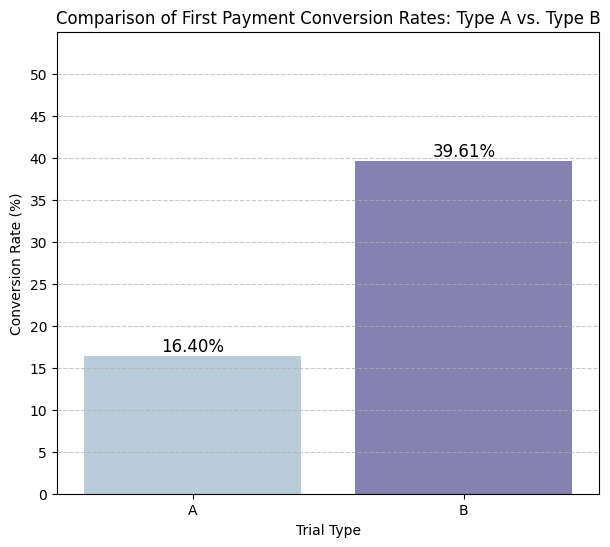

In [255]:
# TYPE A,B 전환율 시각화

# A/B 타입의 전환율 데이터
conversion_AB = {
    "type": ["A", "B"],
    "conversion Rate(%)": [A_conversation_rate, B_conversation_rate]  # 자동으로 가져오기
}

# 데이터프레임 생성
conversion_df = pd.DataFrame(conversion_AB)

# 시각화
plt.figure(figsize=(7, 6))
sns.barplot(data=conversion_df, x="type", y="conversion Rate(%)", hue = 'type', palette= palette)

# 그래프 세부 설정
plt.ylim(0, 55) 
plt.yticks(range(0, 55, 5))
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Trial Type")
plt.title("Comparison of First Payment Conversion Rates: Type A vs. Type B")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 값 표시
for index, row in conversion_df.iterrows():
    plt.text(index, row["conversion Rate(%)"] + 0.5, f"{row['conversion Rate(%)']:.2f}%", 
             ha="center", fontsize=12)

# 그래프 출력
plt.show()

In [256]:
#이 부분에서 astype(str)을 사용하는 이유는 start_free_trial_time이 Period 타입이기 때문
#이를 문자열로 변환해야 Seaborn의 lineplot()이 제대로 작동

# 
# A/B타입의 월별 무료 체험 후 첫 결제 완료 유저 수

# A와 B 데이터를 하나의 데이터프레임으로 결합
free_trial_complete_lineplot = pd.concat([free_trial_complete_A, free_trial_complete_B]).drop_duplicates()
free_trial_complete_lineplot["Month"] = free_trial_complete["start_free_trial_time"].dt.to_period("M").astype(str)

# 타입별, 월별 첫 결제한 유저 수 집계
monthly_free_trial_complete_counts = free_trial_complete_lineplot.groupby(["Month", "start_free_trial_type"])["user_id"].nunique().reset_index()
display(monthly_free_trial_complete_counts)

,Month,start_free_trial_type,user_id
0,2022-01,A,36
1,2022-02,A,200
2,2022-03,A,244
3,2022-04,A,264
4,2022-05,A,251
5,2022-06,A,269
6,2022-07,A,97
7,2022-08,A,160
8,2022-09,A,212
9,2022-10,A,166


C:\Users\rmagm\AppData\Local\Temp\ipykernel_10284\3696513049.py:3: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax = sns.lineplot(data=monthly_free_trial_complete_counts, x="Month", y="user_id",


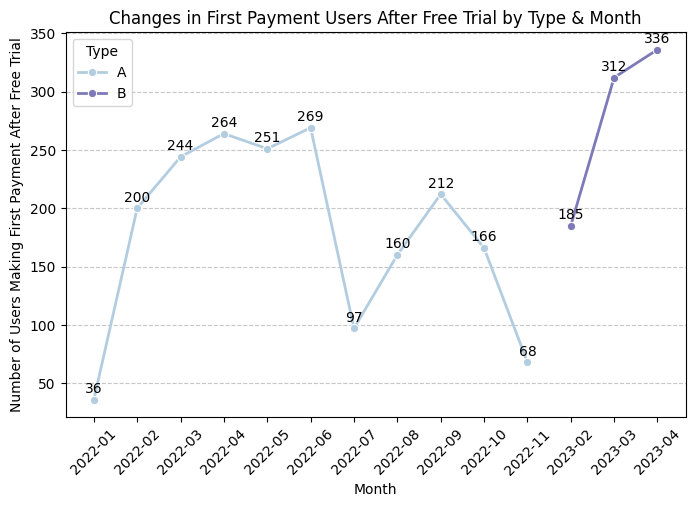

In [257]:
# 시각화
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=monthly_free_trial_complete_counts, x="Month", y="user_id", 
                  hue="start_free_trial_type", marker="o", linewidth=2, palette=palette)

# 값 표시 (각 포인트 위에 텍스트 추가)
for line in ax.lines:  # 라인별로 처리
    for x, y in zip(line.get_xdata(), line.get_ydata()):  # x, y 좌표 추출
        plt.annotate(f"{int(y)}", (x, y), textcoords="offset points", xytext=(0, 5), ha="center", fontsize=10)

# 그래프 설정
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Users Making First Payment After Free Trial")
plt.title("Changes in First Payment Users After Free Trial by Type & Month")
plt.legend(title="Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [258]:
# 정기구독 데이터와 결합 후 재구독 유저 구해보기 -> 장기적인 가치가 있는 유저 -> 아 시간 없다......

### <무료 체험 서비스의 효과성 통계 검정>

- TYPE A : 2022년 01월 01일 ~ 2022년 11월 13일(약 11개월)     

- TYPE B : 2023년 02월 01일 ~ 2023년 04얼 30일(약 3개월)

문제점     

- 같은 시기 비교 불가능
- 샘플 크기 차이

무료 체험 서비스 구독 퍼널 분석 목적
- 무료 체험 서비스를 제공하는 목적은 사용자가 무료 체험 후 유료 구독으로 전환하도록 유도하는 것이다.    

- 따라서, 무료 체험 퍼널 분석을 위해 세울 수 있는 적절한 가설은 무료 체험이 실제로 유료 구독으로 이어지는지 검증할 수 있어야 함

가설(일단 세워봄) -> 무료체험 서비스 제공 기간으로 제한해서 분석 실시함    

1. 무료 체험 서비스가 유료 전환에 미치는 영향    

    - 귀무가설 : 무료 체험 서비스는 유료 구독 전환(첫 결제)에 영향을 주지 않는다.    

    - 대립가설 : 무료 체험 서비스는 유료 구독 전환(첫 결제)에 영향을 준다.

2. TYPE A와 TYPE B의 무료 체험 효과 비교 검정      

    - 귀무가설 : TYPE A 와 TYPE B의 유료 전환율 차이는 없다.    

    - 대립가설 : TYPE A 와 TYPE B의 유료 전환율 차이가 있다.

- 1번 가설 -> 일단 해냈다

In [259]:
# 회원 가입 후 무료 체험 서비스 기간동안 무료 체험 서비스 이용이 없었던 유저

#1-2. 회원 가입 후 무료 체험 학습 서비스 제공 기간에 무료 체험 서비스를 이용하지 않은 유저 

signup_no_trial = complete_signup_df[~complete_signup_df['user_id'].isin(complete_signup_trial['user_id'])]

signup_no_trial = signup_no_trial[
    (
        ((signup_no_trial["client_event_time"] >= A_start) & (signup_no_trial["client_event_time"] <= A_end)) | 
        ((signup_no_trial["client_event_time"] >= B_start) & (signup_no_trial["client_event_time"] <= B_end))
    )
]
total_signup_no_trial = signup_no_trial['user_id'].nunique()

#1-3. 회원 가입 후 무료 체험 서비스 이용 없는 유저 비율 계산
signup_no_trial_rate = (total_signup_no_trial / total_signup) * 100

print("회원가입 후 무료 체험 서비스 기간동안 무료 체험을 이용하지 않은 유저 수:", total_signup_no_trial)
print(f"회원가입 후 무료 체험 서비스 기간동안 무료 체험을 이용하지 않은 유저 비율(%): {signup_no_trial_rate:.2f}%")

회원가입 후 무료 체험 서비스 기간동안 무료 체험을 이용하지 않은 유저 수: 53645
회원가입 후 무료 체험 서비스 기간동안 무료 체험을 이용하지 않은 유저 비율(%): 79.19%


In [260]:
# 회원 가입 후 무료 체험 서비스를 이용하지 않은 유저들 중 첫 결제를 한 유저

# 2-1. 중복 결제 내역 제거한 첫 결제 완료 데이터
complete_subscription_final 

# 2-2. 무료 체험 하지 않은 유저와 첫 결제 완료 데이터 merge
signup_no_trial_complete = signup_no_trial.merge(complete_subscription_final, on='user_id', how='inner')

#2-3. 무료 체험 하지 않은 유저의 첫 결제 완료 전환율
signup_no_trial_complete_count = signup_no_trial_complete['user_id'].nunique()
signup_no_trial_complete_rate = (signup_no_trial_complete_count / total_signup_no_trial) * 100

print("회원가입 후 무료 체험 서비스 없이 첫 결제 유저 수:", signup_no_trial_complete_count)
print(f"회원가입 후 무료 체험 서비스 없이 첫 결제 전환율(%): {signup_no_trial_complete_rate:.2f}%")

회원가입 후 무료 체험 서비스 없이 첫 결제 유저 수: 2498
회원가입 후 무료 체험 서비스 없이 첫 결제 전환율(%): 4.66%


In [261]:
# 회원 가입 후 무료 체험 서비스를 이용하지 않은 유저들 중 첫 결제를 하지 않은 유저
3-1. 
signup_no_trial_no_complete = signup_no_trial[~signup_no_trial['user_id'].isin(signup_no_trial_complete['user_id'])]

# 3-2. 유저 수
signup_no_trial_no_complete_users = signup_no_trial_no_complete['user_id'].nunique()

# 3-3. 비율 계산
signup_no_trial_no_complete_rate = (signup_no_trial_no_complete_users / total_signup_no_trial) * 100

print("회원가입 후 무료 체험 서비스 없이 첫 결제를 하지 않은 유저 수:", signup_no_trial_no_complete_users)
print(f"회원가입 후 무료 체험 서비스 없이 첫 결제를 하지 않은 유저 비율(%): {signup_no_trial_no_complete_rate:.2f}%")


회원가입 후 무료 체험 서비스 없이 첫 결제를 하지 않은 유저 수: 51147
회원가입 후 무료 체험 서비스 없이 첫 결제를 하지 않은 유저 비율(%): 95.34%


### 1-1. 카이제곱 검정(chi-square test) -> 상관성 분석
- 무료 체험을 한 그룹과 무료 체험을 하지 않은 그룹의 유의미한 차이를 알아보고자 함

- 두 개의 그룹(무료 체험 유저 vs 무료 체험 미이용 유저)의 비율(첫 결제 전환율)을 비교

    <무료 체험 서비스가 유료 전환에 미치는 영향>    

    - 귀무가설 : 무료 체험 서비스는 유료 구독 전환(첫 결제)에 영향을 주지 않는다.    

    - 대립가설 : 무료 체험 서비스는 유료 구독 전환(첫 결제)에 영향을 준다.


- 표본 크기 
    - 무료 체험O, 첫 결제O : 3147명, 전환율 : 22.05% / 무료 체험O, 첫결제X 유저 : 11110명, 비율 : 77.83%     

    - 무료 체험 X, 첫 결제O : 5425명, 전환율 : 7.26%  / 무료 체험 X, 첫 결제X 유저 :69264, 비율 : 92.74% 

In [262]:
from scipy.stats import chi2_contingency

# 카이제곱 검정 데이터 테이블 
chi_conversion_table = [
    [free_trial_complete_yes_users, free_trial_complete_no_users],  # 무료 체험 이용_첫결제 / 무료 체험 이용_첫결제X
    [signup_no_trial_complete_count, signup_no_trial_no_complete_users]  # 무료 체험 미이용_첫결제 / 무료 체험 미이용_첫결제X
]

print("<실제 관측값>")
print(chi_conversion_table)
print('-' * 70)

# 카이제곱 검정(기대 빈도 자동 수행)
chi2, p, dof, expected_freq_auto = chi2_contingency(chi_conversion_table)

# 기대 빈도 결과
print("<기대 빈도 테이블>")
for i, row in enumerate(expected_freq_auto):
    group_name = "무료 체험 O" if i == 0 else "무료 체험 X"
    print(f"{group_name}: {row[0]:.2f} (첫 결제 O), {row[1]:.2f} (첫 결제 X)")

print('-' * 70)

# 크래머의 V 계산
n = np.sum(chi_conversion_table)  # 전체 샘플 수
min_dim = min(len(chi_conversion_table), len(chi_conversion_table[0])) - 1  # 최소 행/열 차원 계산
cramers_v = np.sqrt(chi2 / (n * min_dim))


print(f"Chi-Square Test 결과:")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"크래머의 V: {cramers_v:.4f}")

print('-' * 70)


# 유의수준 0.05에서 귀무가설 기각 여부 판단
if p < 0.05:
    print("무료 체험 서비스가 유료 전환(첫 결제)에 유의미한 영향을 준다 (귀무가설 기각)")
else:
    print("무료 체험 서비스가 유료 전환(첫 결제)에 유의미한 영향을 주지 않는다 (귀무가설 채택)")

print('-' * 70)


# 크래머의 V 해석
if cramers_v < 0.1:
    print("무료 체험과 첫 결제의 연관성이 매우 약함 (실제 차이가 거의 없을 가능성 있음)")
elif 0.1 <= cramers_v < 0.3:
    print("무료 체험과 첫 결제 간 약한 연관성 있음")
elif 0.3 <= cramers_v < 0.5:
    print("무료 체험과 첫 결제 간 중간 정도 연관성 있음")
else:
    print("무료 체험과 첫 결제 간 강한 연관성 있음")


<실제 관측값>
[[3042, 11036], [2498, 51147]]
----------------------------------------------------------------------
<기대 빈도 테이블>
무료 체험 O: 1151.63 (첫 결제 O), 12926.37 (첫 결제 X)
무료 체험 X: 4388.37 (첫 결제 O), 49256.63 (첫 결제 X)
----------------------------------------------------------------------
Chi-Square Test 결과:
카이제곱 통계량: 4264.0164
p-value: 0.000000
크래머의 V: 0.2509
----------------------------------------------------------------------
무료 체험 서비스가 유료 전환(첫 결제)에 유의미한 영향을 준다 (귀무가설 기각)
----------------------------------------------------------------------
무료 체험과 첫 결제 간 약한 연관성 있음


- 기대 빈도 해석
    - 무료 체험 O 그룹
        - 기대값(첫 결제 O): 1374.80 → 실제 결제한 유저: 3147명
        - 기대값(첫 결제 X): 12882.20 → 실제 결제하지 않은 유저: 11110명    

        예상보다 첫 결제 전환율이 높음 → 무료 체험이 첫 결제에 긍정적인 영향 가능성!   

    - 무료 체험 X 그룹    
        - 기대값(첫 결제 O): 7197.20 → 실제 결제한 유저: 5425명
        - 기대값(첫 결제 X): 67591.80 → 실제 결제하지 않은 유저: 69264명     

        예상보다 첫 결제 전환율이 낮음 → 무료 체험을 하지 않은 그룹에서 첫 결제율이 낮은 경향.


- 크래머 v : 카이제곱 검정에서 그룹 간 관계 강도 측정(0 ~ 1 사이 값)    
    - 0.1 ~ 0.3은 약한 연관성
    - 무료 체험과 첫 결제 전환 간의 관계는 있지만, 강한 관계는 아님
        - 무료 체험을 경험한 유저 중 77.83%가 첫 결제로 이어지지 않음
        - 무료 체험을 하지 않은 유저 중에서도 일정 비율이 첫 결제를 진행함    
        - 즉, 무료 체험이 첫 결제에 영향을 미치지만 결정적인 요소는 아닐 수도 있음   

결론 : 추가 분석을 통해(ex. 어떤 요인으로 결제했는지 등등등) -> but 이젠 시간 없음 -> 여기까지만 하겠음


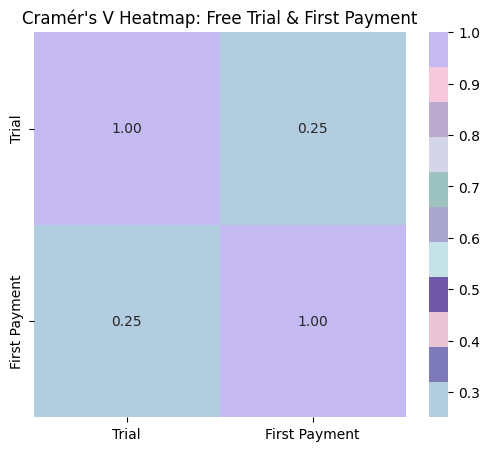

In [263]:
import seaborn as sns
import numpy as np

# 크래머의 V 행렬 생성
cramers_v_matrix = np.array([[1, cramers_v], [cramers_v, 1]])  # 자기 자신과의 연관성은 1

# 히트맵 생성
plt.figure(figsize=(6, 5))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap= palette, xticklabels=["Trial", "First Payment"], yticklabels=["Trial", "First Payment"])
plt.title("Cramér's V Heatmap: Free Trial & First Payment")
plt.show()

### 1-2. Z-검정(비율 비교 검정) 
    -> 무료 체험과 첫 결제 간 상관성이 있다 그렇다면 전환율 차이가 통계적으로 유의한가?

<무료 체험 서비스가 유료 전환에 미치는 영향>
- 귀무가설 : 무료 체험 그룹과 비무료 체험 그룹의 전환율 차이는 없다.

- 대립가설 : 무료 체험 그룹과 비무료 체험 그룹의 전환율 차이는 없다.

In [264]:
from statsmodels.stats.proportion import proportions_ztest

#  미리 계산된 전환율 & 표본 크기
p1 = free_trial_complete_yes_rate / 100  # 무료 체험 그룹 전환율 (퍼센트를 소수점으로 변환)
n1 = total_trial_users  # 무료 체험 유저 수

p2 = signup_no_trial_complete_rate / 100  # 비무료 체험 그룹 전환율 (퍼센트를 소수점으로 변환)
n2 = total_signup_no_trial  # 무료 체험 미이용 유저 수

# 두 그룹의 성공 횟수 (첫 결제 유저 수) 설정
success_counts = [free_trial_complete_yes_users, signup_no_trial_complete_count]
sample_sizes = [n1, n2]

# Z-검정 수행
z_stat, p_value = proportions_ztest(success_counts, sample_sizes)

#  Z-검정 결과 출력
print("=== Z-검정 결과 ===")
print(f"Z-통계량: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# 유의수준 0.05에서 검정 결과 해석
if p_value < 0.05:
    print("무료 체험 그룹과 비무료 체험 그룹의 첫 결제 전환율 차이가 통계적으로 유의하다 (귀무가설 기각)")
else:
    print("무료 체험 그룹과 비무료 체험 그룹의 첫 결제 전환율 차이가 통계적으로 유의하지 않다 (귀무가설 채택)")


=== Z-검정 결과 ===
Z-통계량: 65.2549
P-value: 0.000000
무료 체험 그룹과 비무료 체험 그룹의 첫 결제 전환율 차이가 통계적으로 유의하다 (귀무가설 기각)


<Z-검정 결과>    

- 무료 체험을 경험한 유저 그룹과 무료 체험을 하지 않은 유저 그룹의 첫 결제 전환율 차이가 통계적으로 유의미하게 나타남
- 무료 체험을 하면 첫 결제로 이어질 확률이 높아짐을 의미

<최종 결론>    
- 무료 체험 서비스는 유료 전환(첫 결제)에 긍정적인 영향을 미친다    

- BUT 긍정적인 영향력이 강하지 않으며, 대다수의 유저는 첫 결제로 이어지지 않는다.    

- 따라서, 무료 체험 후 첫 결제까지의 유저 여정을 최적화할 필요가 있으며,    

- 이탈 유저에 대한 추가 분석이 필요함 -> 시간이 부족함.....

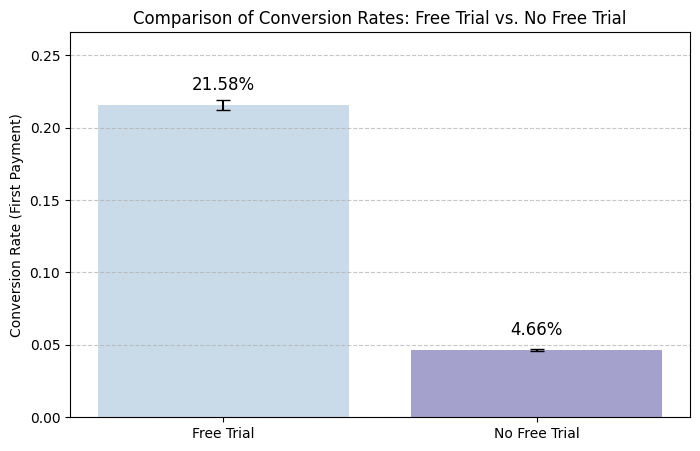

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 전환율 계산
conversion_rates = [p1, p2]  # 무료 체험 그룹과 비무료 체험 그룹의 전환율
labels = ["Free Trial", "No Free Trial"]
errors = [np.sqrt((p1 * (1 - p1)) / n1), np.sqrt((p2 * (1 - p2)) / n2)]  # 신뢰구간(표준오차 계산)

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(labels, conversion_rates, yerr=errors, capsize=5, color= palette, alpha=0.7)
plt.ylabel("Conversion Rate (First Payment)")
plt.title("Comparison of Conversion Rates: Free Trial vs. No Free Trial")
plt.ylim(0, max(conversion_rates) + 0.05)

# 데이터 라벨 추가
for i, rate in enumerate(conversion_rates):
    plt.text(i, rate + 0.01, f"{rate:.2%}", ha='center', fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


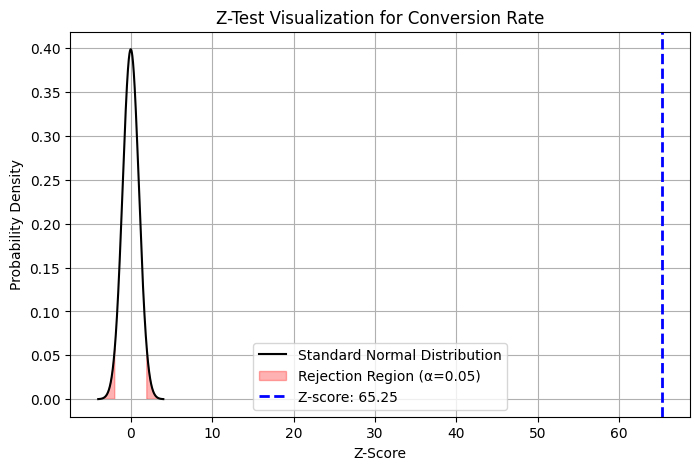

In [266]:
# Z-검정에서 사용한 정규 분포 및 Z-통계량 시각화
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # 표준 정규 분포 (평균=0, 표준편차=1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color='black', label="Standard Normal Distribution")
plt.fill_between(x, y, where=(x < -1.96) | (x > 1.96), color='red', alpha=0.3, label="Rejection Region (α=0.05)")
plt.axvline(z_stat, color='blue', linestyle='dashed', linewidth=2, label=f"Z-score: {z_stat:.2f}")

plt.title("Z-Test Visualization for Conversion Rate")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

plt.show()

### 2-1. TYPE A와 TYPE B -> Z-검정(비율 비교)
- 귀무가설 : TYPE A 와 TYPE B의 유료 전환율 차이는 없다.  

- 대립가설 : TYPE A 와 TYPE B의 유료 전환율 차이가 있다.

In [267]:
#  TYPE A (무료 체험 후 첫 결제)
type_A_converted = A_users_count  # TYPE A에서 첫 결제한 유저 수
type_A_total = total_trial_users_A  # TYPE A 전체 무료 체험 유저 수
type_A_conversion_rate = A_conversation_rate / 100  # 전환율

#  TYPE B (무료 체험 후 첫 결제)
type_B_converted = B_users_count  # TYPE B에서 첫 결제한 유저 수
type_B_total = total_trial_users_B  # TYPE B 전체 무료 체험 유저 수
type_B_conversion_rate = B_conversation_rate / 100  # 전환율

#  Z-검정 수행 (두 비율 비교)
count = np.array([type_A_converted, type_B_converted])  # 첫 결제한 유저 수
nobs = np.array([type_A_total, type_B_total])  # 전체 무료 체험 유저 수
z_stat, p_value = proportions_ztest(count, nobs)

#  타입별 전환율
print("-" * 60)
print(f"TYPE A 전환율: {type_A_conversion_rate:.2%}")
print(f"TYPE B 전환율: {type_B_conversion_rate:.2%}")
print("-" * 60)

#  결과 
print("=== Z-검정 결과 ===")
print(f"Z-통계량: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")

#  유의 수준 0.05에서 결과 해석
if p_value < 0.05:
    print("TYPE A와 TYPE B의 첫 결제 전환율 차이가 통계적으로 유의하다 (귀무가설 기각)")
else:
    print("TYPE A와 TYPE B의 첫 결제 전환율 차이가 통계적으로 유의하지 않다 (귀무가설 채택)")



------------------------------------------------------------
TYPE A 전환율: 16.40%
TYPE B 전환율: 39.61%
------------------------------------------------------------
=== Z-검정 결과 ===
Z-통계량: -24.6039
P-value: 0.000000
TYPE A와 TYPE B의 첫 결제 전환율 차이가 통계적으로 유의하다 (귀무가설 기각)


<Z-검정 결과>

- 우려했던 표본 수 차이 극복
    - TYPE A: 11,992명, TYPE B: 2,280명으로 TYPE A의 표본 크기가 훨씬 큼.    
    
    - 하지만 Z-검정은 표본 수가 크면 정규 근사(Normal Approximation)를 따르므로, 적절한 방법

- Z-통계량: -24.2205 (음수는 TYPE A의 전환율이 TYPE B보다 낮음을 의미)      

     -> 두 그룹간 차이가 크다(매우 큰 절대 값)    

- TYPE A와 TYPE B의 첫 결제 전환율 차이는 통계적으로 유의미하다      

- TYPE B가 첫 결제로의 전환에 있어 더 효과적인 무료 체험 모델일 가능성이 높음.    

    (7일 무료 체험 후 자동으로 첫 결제로 넘어간다면 매우 가능성있는 결론 같음)

### 2-2. TYPE A와 TYPE B 로지스틱 회귀 분석
- Z-검정은 단순한 두 그룹 간 비율 차이를 비교    

- 로지스틱 회귀분석은 A/B 타입이 첫 결제에 미치는 영향을 확률적으로 모델링하고, 오즈비(Odds Ratio)를 해석할 수 있음.    

- TYPE별 효과를 조정된 모델에서 다시 평가하여 더 정확한 비교(맞지?)

<가설>

- 귀무가설 : TYPE A 와 TYPE B의 유료 전환율 차이는 없다.  

- 대립가설 : TYPE A 와 TYPE B의 유료 전환율 차이가 있다.


<모델 설명>  
- 독립 변수(x) : A/B 타입(A = 0, B = 1)    

- 종속 변수(y) : 첫 결제 여부 (0: 미결제, 1 : 결제)

In [268]:
import statsmodels.api as sm

# 데이터프레임 생성
AB_df = pd.DataFrame({
    'user_id': list(range(total_trial_users_A + total_trial_users_B)),
    'trial_type': ['A'] * total_trial_users_A + ['B'] * total_trial_users_B,  # A/B 타입
    'converted': [1] * A_users_count + [0] * (total_trial_users_A - A_users_count) + 
                 [1] * B_users_count + [0] * (total_trial_users_B - B_users_count)  # 첫 결제 여부
})

# A/B 타입을 0과 1로 변환
AB_df['trial_type'] = AB_df['trial_type'].map({'A': 0, 'B': 1})

# 독립변수(타입), 종속변수(첫 결제 여부)
X = sm.add_constant(AB_df['trial_type'])  # 상수 추가
y = AB_df['converted']

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 출력
print(result.summary())

# 해석
odds_ratio = np.exp(result.params['trial_type'])  # 오즈비 계산
print(f"오즈비 (Odds Ratio): {odds_ratio:.4f}")

# 유의수준 판단
if result.pvalues['trial_type'] < 0.05:
    print("TYPE A와 TYPE B의 첫 결제 전환율 차이가 통계적으로 유의하다 (귀무가설 기각)")
else:
    print("TYPE A와 TYPE B의 첫 결제 전환율 차이가 통계적으로 유의하지 않다 (귀무가설 채택)")


Optimization terminated successfully.
         Current function value: 0.479873
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                14095
Model:                          Logit   Df Residuals:                    14093
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                 0.03742
Time:                        09:26:47   Log-Likelihood:                -6763.8
converged:                       True   LL-Null:                       -7026.8
Covariance Type:            nonrobust   LLR p-value:                2.229e-116
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6286      0.025    -66.040      0.000      -1.677      -1.580
trial_type     1.2068      0.

<로지스틱 회귀 분석 결과>

회귀 계수는 로그 오즈의 변화를 나타냄 -> 계수가 클수록 해당 변수가 첫 결제에 더 큰 영향을 미침 

- coef
    - const(절편) : -1.6353
        - 기준값(TYPE A일 때의 절편)  : TYPE A 유저의 첫 결제 확률(전환율) : 16.3%
    - trial_type : 1.1617
        - TYPE B 사용자는 TYPE A보다 첫 결제 로그 오즈가 1.1617 증가    

    
        (로그 오즈 확률로 변환 : 식으로 계산하면 TYPE B 사용자의 전환율 : 약 38.4%)  

- 오즈비 : 3.2 => TYPE B의 유저가 TYPE A 유저보다 첫 결제를 할 확률이 약 3.2배 더 높음 

    - 즉, TYPE B 유저가 TYPE A 유저에 비해 첫 결제할 확률이 증가함(유의미하게 높음)을 의미 -> 자동 결제면 강제 아닐까?
    - TYPE B가 TYPE A보다 첫 결제를 유도하는데 더 효과적이다

- 표준 오차(std err)
    - const : 0.025 / trial_type : 0.050
    - 표준 오차 작을수록 추정된 계수(coef)의 신뢰성이 높음
    - trial_type의 표준오차 0.050이므로 계수 1.1617이 비교적 신뢰할 수 있는 값
|
- Z 값 : 계수가 0과 얼마나 차이나는지
    - trial_type의 z값 23.396으로 매우 큼 -> type a/b의 전환율 차이 유의미

결론 : type b가 type a보다 첫 결제를 유도하는데 효과적이다.

### 2-3. Bootstrapping Z-검정
- A/B 타입의 표본 수가 다름 -> 작은 표본에 맞춰 리샘플링(bootstrapping)    

- A/B 타입에서 각각 2000개씩 샘플링 -> 동일한 크기 데이터로 분석(편향 줄이기)    

- Z-검정 : 두 타입의 유료 전환율 차이가 통계적으로 유의한지 평가

In [269]:
from sklearn.utils import resample

# A/B 그룹에서 각각 2000개씩 샘플링 (작은 표본에 맞춤)
sample_size = min(total_trial_users_A, total_trial_users_B)

boot_A = resample(AB_df[AB_df['trial_type'] == 0], n_samples=sample_size, replace=True, random_state=42)
boot_B = resample(AB_df[AB_df['trial_type'] == 1], n_samples=sample_size, replace=True, random_state=42)

# 샘플링된 데이터로 Z-검정 수행
count = np.array([boot_A['converted'].sum(), boot_B['converted'].sum()])
nobs = np.array([len(boot_A), len(boot_B)])
z_stat, p_value = proportions_ztest(count, nobs)

# 결과 출력
print(f"Bootstrapped Z-검정 결과: Z={z_stat:.4f}, P-value={p_value:.6f}")


Bootstrapped Z-검정 결과: Z=-16.8758, P-value=0.000000


<결과 해석>
- Z-값 -16.5753   
    - Z-값이 매우 작음(음수) → TYPE A의 전환율이 TYPE B보다 유의하게 낮음을 의미    

    - 일반적으로 |Z| > 1.96이면 유의하다고 판단하는데, -16.5753은 압도적으로 작음

- P-value 0.000000
    - P-value가 0에 가깝다 → 귀무가설 기각    
    
    - 즉, TYPE A와 TYPE B의 유료 전환율 차이는 유의미하다

### C 선생님과 해 본 TYPE A,B 베이지안 분석
    - 신뢰 구간을 포함해 보다 확률적인 해석이 가능하다고 함

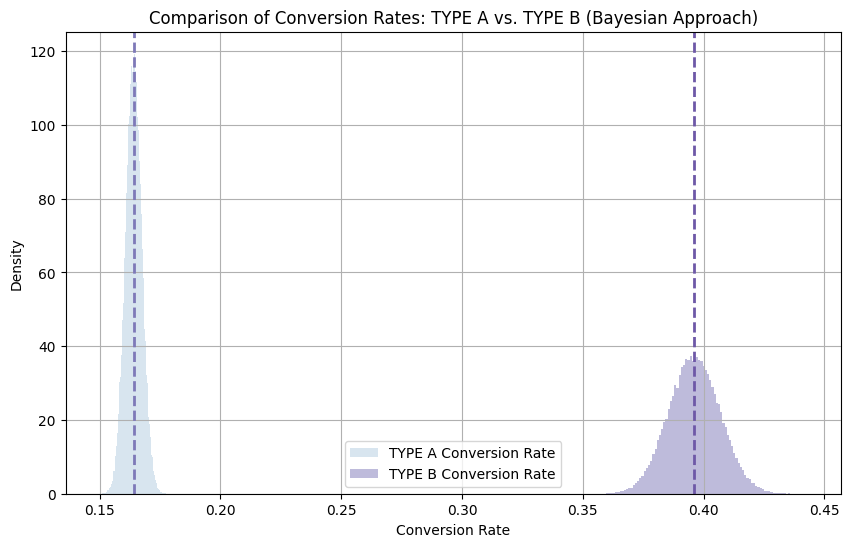

TYPE A 평균 전환율 추정값: 0.1641
TYPE B 평균 전환율 추정값: 0.3962
TYPE B가 TYPE A보다 전환율이 높을 확률: 100.0000%


In [270]:
# A/B 테스트 데이터
alpha_A = 1 + A_users_count  # 첫 결제 한 유저 수 + 베타 분포 초기값
beta_A = 1 + (total_trial_users_A - A_users_count)  # 첫 결제X한 유저 수 + 베타 분포 초기값

alpha_B = 1 + B_users_count
beta_B = 1 + (total_trial_users_B - B_users_count)

# 베타 분포에서 샘플링
np.random.seed(42)
samples_A = np.random.beta(alpha_A, beta_A, 100000)  # A 타입 전환율 샘플
samples_B = np.random.beta(alpha_B, beta_B, 100000)  # B 타입 전환율 샘플

# B가 A보다 높은 확률 계산 (P(B > A))
prob_B_superior = np.mean(samples_B > samples_A)

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(samples_A, bins=100, alpha=0.5, label="TYPE A Conversion Rate", color = palette[0], density=True)
plt.hist(samples_B, bins=100, alpha=0.5, label="TYPE B Conversion Rate", color= palette[1], density=True)
plt.axvline(samples_A.mean(), color= palette[1], linestyle='dashed', linewidth=2)
plt.axvline(samples_B.mean(), color= palette[3], linestyle='dashed', linewidth=2)
plt.title("Comparison of Conversion Rates: TYPE A vs. TYPE B (Bayesian Approach)") #TYPE A vs TYPE B 전환율 비교 (베이지안 접근)
plt.xlabel("Conversion Rate") # 전환율
plt.ylabel("Density") # 밀도
plt.legend()
plt.grid()
plt.show()

# 결과 출력
print(f"TYPE A 평균 전환율 추정값: {samples_A.mean():.4f}")
print(f"TYPE B 평균 전환율 추정값: {samples_B.mean():.4f}")
print(f"TYPE B가 TYPE A보다 전환율이 높을 확률: {prob_B_superior:.4%}")


In [271]:
ci_A = np.percentile(samples_A, [2.5, 97.5])  # TYPE A의 95% 신뢰 구간
ci_B = np.percentile(samples_B, [2.5, 97.5])  # TYPE B의 95% 신뢰 구간

print(f"TYPE A 신뢰 구간: {ci_A[0]:.4f} ~ {ci_A[1]:.4f}")
print(f"TYPE B 신뢰 구간: {ci_B[0]:.4f} ~ {ci_B[1]:.4f}")

TYPE A 신뢰 구간: 0.1575 ~ 0.1708
TYPE B 신뢰 구간: 0.3754 ~ 0.4171


- 신뢰구간 겹치지 않음 => TYPE B가 압도적으로 전환율이 높음

<결과 해석>
1. 베타 분포 정의
    - alpha = 성공한 유저 수 + 1
    - beta = 실패한 유저 수 + 1
    - A/B의 전환율을 베타 분포를 이용해 모델링

2. 100,000개 샘플링
    - 베타 분포에서 np.random.beta(alpha, beta, 100000)을 통해 각각 샘플링하여 전환율 분포 추정.

3. P(B >A) 계산
    - B의 전환율 샘플 중 A보다 높은 비율을 계산하여 B가 A보다 유리할 확률을 추정

4. 결과
 - TYPE A 평균 전환율 추정값: 16.32%    
    - 베이지안 추론을 통해 도출된 TYPE A의 평균 전환율(결제 전환율)이 **16.32%**로 나타남.    

    - 기존 분석(빈도주의 접근)에서 구한 **16.31%**과 일치하는 수준       

    -  베이지안 방식으로도 유사한 추정 결과를 얻었음을 의미.

- TYPE B 평균 전환율 추정값: 38.39%
    - TYPE B의 평균 전환율은 **38.39%**로 추정됨    

    - 기존 빈도주의 분석(38.38%)과 거의 일치하며, 베이지안 추론을 통해 TYPE B의 전환율이 확실히 더 높음을 확인.

- TYPE B가 TYPE A보다 전환율이 높을 확률: 100.000%
    - 베이지안 추론에서 **TYPE B가 TYPE A보다 전환율이 높을 확률이 100%**로 계산됨.    

    - 이는 TYPE B의 전환율이 TYPE A보다 높다는 것이 사실상 확실하다는 의미.


<베이지안 그래프 해석>
- X축 (Conversion Rate, 전환율)
    - 각 타입(A, B)의 전환율 분포를 나타냄    
    
    - TYPE A (파란색): 전환율이 0.15~0.17 사이에 집중되어 있음     

    - TYPE B (보라색): 전환율이 0.35~0.40 사이에서 분포함

- 히스토그램 (Density, 밀도)
    - 각 히스토그램은 베이지안 추론을 통해 샘플링된 전환율 분포를 나타냄    

    - TYPE B(보라색)의 전환율이 TYPE A(파란색)보다 훨씬 더 높은 값에 집중

- 점선 (평균 전환율 위치)
    - 파란 점선: TYPE A의 평균 전환율 (16.32%)    

    - 보라 점선: TYPE B의 평균 전환율 (38.39%)    

    - TYPE B의 평균 전환율이 TYPE A보다 훨씬 오른쪽에 위치, 즉 더 높은 전환율을 보임


<추가적으로 하면 좋은 것들>
1. 시간 효과 고려
    - trial_period_length (11개월 vs 3개월) 조정하여 추가 분석 가능
    - 선형 회귀 또는 혼합 모델 활용 가능

2. 비용 분석 포함
    - TYPE B가 전환율이 높더라도 **비용 대비 수익(Cost-Benefit Analysis)**을 고려해야 함.

3. 추가 실험 설계
    - TYPE A의 기간을 줄이거나 TYPE B의 기간을 늘려서 다시 실험.

In [ ]:
# # TYPE B의 플랜별 첫 결제 전환 유저 수와 전환율 -> 플랜 상관없이 무료체험 7일 후 첫 결제로 넘어가는 거라 의미가 있는지 모르겠다. 

# # B 타입 전체 무료 체험 유저 수 (각 플랜별) 

# # B 타입 무료 체험 기간 동안 무료체험 전체 유저 수
# total_B_users_count = total_trial_complete_users_B['user_id'].nunique()

# # PLAN 1개월  
# total_users_1m = signup_free_trial[
#     (signup_free_trial["start_free_trial_type"] == "B") &
#     (signup_free_trial["start_free_trial_plan_type"] == "1개월 플랜") &
#     (signup_free_trial["start_free_trial_time"] >= B_start_date) &
#     (signup_free_trial["start_free_trial_time"] <= B_end_date)
# ]["user_id"].nunique()


# # PLAN 12개월
# total_users_12m = signup_free_trial[
#     (signup_free_trial["start_free_trial_type"] == "B") &
#     (signup_free_trial["start_free_trial_plan_type"] == "12개월 플랜") &
#     (signup_free_trial["start_free_trial_time"] >= B_start_date) &
#     (signup_free_trial["start_free_trial_time"] <= B_end_date)
# ]["user_id"].nunique()

# # B 타입 무료 체험 후 첫 결제 완료 유저 수 (각 플랜별)

# # PLAN 1개월 무료 체험 후 첫 결제 완료 유저 수
# converted_users_1m = free_complete_yes_30_B[
#     (free_complete_yes_30_B["start_free_trial_type"] == "B") &
#     (free_complete_yes_30_B["start_free_trial_plan_type"] == "1개월 플랜")]["user_id"].nunique()

# # PLAN 12개월 무료 체험 후 첫 결제 완료 유저 수 
# converted_users_12m = free_complete_yes_30_B[
#     (free_complete_yes_30_B["start_free_trial_type"] == "B") &
#     (free_complete_yes_30_B["start_free_trial_plan_type"] == "12개월 플랜")]["user_id"].nunique()

# # 전환율 계산
# conversion_rate_1m = (converted_users_1m / total_B_users_count) * 100
# conversion_rate_12m = (converted_users_12m / total_B_users_count) * 100

# # 결과 출력
# print("<TYPE B의 무료 체험 기간 동안 PLAN별 첫 결제 완료한 유저 분석>")

# print(f'TYPE B 기간 무료체험 전체 유저 수 : {total_trial_users_B}')

# print(f"\n TYPE B (1개월 플랜)")
# print(f" - 무료 체험 TYPE B의 1개월 플랜 유저 수: {total_users_1m}")
# print(f" - TYPE B의 1개월 플랜 첫 결제 완료 유저 수: {converted_users_1m}")
# print(f" - TYPE B의 1개월 플랜 첫 결제 전환율: {conversion_rate_1m:.2f}%")

# print("=" * 60)

# print(f"\n TYPE B (12개월 플랜)")
# print(f" - TYPE B의 12개월 플랜 무료 체험 유저 수: {total_users_12m}")
# print(f" - TYPE B의 12개월 플랜 첫 결제 완료 유저 수: {converted_users_12m}")
# print(f" - TYPE B의 12개월 플랜 첫 결제 전환율: {conversion_rate_12m:.2f}%")


<TYPE B의 무료 체험 기간 동안 PLAN별 첫 결제 완료한 유저 분석>
TYPE B 기간 무료체험 전체 유저 수 : 2280

 TYPE B (1개월 플랜)
 - 무료 체험 TYPE B의 1개월 플랜 유저 수: 1192
 - TYPE B의 1개월 플랜 첫 결제 완료 유저 수: 577
 - TYPE B의 1개월 플랜 첫 결제 전환율: 25.31%

 TYPE B (12개월 플랜)
 - TYPE B의 12개월 플랜 무료 체험 유저 수: 1088
 - TYPE B의 12개월 플랜 첫 결제 완료 유저 수: 333
 - TYPE B의 12개월 플랜 첫 결제 전환율: 14.61%


### [세일즈 리드 분석] 루팡 유저들의 패턴?을 파악하자 
- 주의사항
    - 결제 페이지 진입 데이터는 "22-11-03 ~ 2023-12-10"까지만 존재
- PQL정의 : 루팡 유저들 중 결제 페이지 진입을 한 유저들로 정의

In [ ]:
# a/b 타입별 미결제 유저 비율 비교

In [ ]:
# 루팡 유저들이 많이 멈춘 단계(체험 첫날 사용 후 이탈 vs 여러 번 사용 후 이탈) 

In [272]:
print(enter_payment_page_df['enter_payment_page_time'].min())
print(enter_payment_page_df['enter_payment_page_time'].max())

2022-11-03 11:39:46.400000
2023-12-10 23:56:01.475000


In [273]:
payment_page = enter_payment_page_df[['user_id', 'enter_payment_page_time', 'os_name']]


# 무료 체험 후 첫 결제 내역이 없는 유저(루팡)들의 결제 페이지 진입 확인
merged_lupang = free_trial_complete_no.merge(payment_page, how = 'inner', on = 'user_id')

#merged_lupang[['user_id','client_event_time', 'start_free_trial_time', 'enter_payment_page_time']]
merged_lupang = merged_lupang[(merged_lupang['start_free_trial_time']) < (merged_lupang['enter_payment_page_time'])]

merged_lupang
merged_lupang['user_id'].nunique()

1079

In [ ]:
# TYPE A,B별 미결제 유저 비율 -> PQL 유저들의 전환율 유도할 수 있는 개선점을 찾아보자



In [ ]:
# 루팡 유저들 중 PQL 유저와 그렇지 않은 유저의 비율

In [274]:
merged_lupang['user_id'].value_counts()

user_id
33705b62360604afe5e9777c9f62a6cb    26
192a137b9fe77f91baf6b6a07ecab19e    22
d7e1b57cbd4d11a33eed05b199c6b703    16
169d680d57a065b6d029c6e5c682d21a    15
5e4c22621f056548707b52d9d883b0f2    15
                                    ..
82d00064b6915bd424cf2b5d479ba302     1
785cfe97f1ba4d9c2dba312b0bdd6db5     1
309742021382b6d506743867f3fb067b     1
386e01d688e7375efb6b6d136f4b038d     1
3360d24e521715d48ca73088d15694d5     1
Name: count, Length: 1079, dtype: int64

In [275]:
merged_lupang['os_name'].value_counts()

os_name
Chrome             1514
Instagram           217
Mobile Safari       205
Whale               155
Edge                148
Samsung Browser      99
Chrome WebView       89
Safari               75
WebKit               31
Facebook             14
Chrome Mobile         7
GSA                   5
Opera                 2
Firefox               1
Name: count, dtype: int64

In [276]:
# 루팡 유저들이 결제 페이지에 진입을 어떤 식으로 많이 해서 결제를 망설일까?

In [277]:
# 루팡 유저들의 무료 체험 서비스 이용하며 어떤 컨텐츠? 
enter_content = enter_content_page_df[['city','user_id','enter_content_page_time','content_id']]

enter_content = enter_content[(enter_content['enter_content_page_time'] >= '2022-01-10') & (enter_content['enter_content_page_time'] <= '2023-04-30')]
enter_content

lupang_enter_content = free_trial_complete_no.merge(enter_content, on = 'user_id', how = 'inner')
lupang_enter_content

,user_id,start_free_trial_time,start_free_trial_type,client_event_time,complete_sub_time,city,enter_content_page_time,content_id
0,65eca51bd95d9f65cac59dfbfbd363d3,2022-01-01 13:31:49.213,A,2022-01-01 13:31:24.500,NaT,Gwangjin-gu,2022-01-20 22:11:37.897,5acd4977e14d5edc6a408ae0d468ca4e
1,65eca51bd95d9f65cac59dfbfbd363d3,2022-01-01 13:31:49.213,A,2022-01-01 13:31:24.500,NaT,Gwangjin-gu,2022-01-20 22:12:12.635,32cf55a55adcc30ad80b674c0fee2ff4
2,65eca51bd95d9f65cac59dfbfbd363d3,2022-01-01 13:31:49.213,A,2022-01-01 13:31:24.500,NaT,Gwangjin-gu,2022-01-20 22:12:33.359,595cb4bbfc83e683b0314ca1312cfbde
3,65eca51bd95d9f65cac59dfbfbd363d3,2022-01-01 13:31:49.213,A,2022-01-01 13:31:24.500,NaT,Gwangjin-gu,2022-01-20 22:12:54.432,38df90d4de533d6296b52c6a1d90e26b
4,65eca51bd95d9f65cac59dfbfbd363d3,2022-01-01 13:31:49.213,A,2022-01-01 13:31:24.500,NaT,Gwangjin-gu,2022-01-22 18:42:12.444,621c7ad99b17d2d16832b618d47aea7e
...,...,...,...,...,...,...,...,...
57477,6b48d12d7456836ba40cbc0ca8faf8f4,2023-04-29 17:36:43.589,B,2023-04-29 14:56:49.613,NaT,Donggu,2023-04-29 21:27:56.885,235c5afae879c3a87ba07e7a465240f8
57478,6b48d12d7456836ba40cbc0ca8faf8f4,2023-04-29 17:36:43.589,B,2023-04-29 14:56:49.613,NaT,Donggu,2023-04-29 21:28:39.688,235c5afae879c3a87ba07e7a465240f8
57479,6b48d12d7456836ba40cbc0ca8faf8f4,2023-04-29 17:36:43.589,B,2023-04-29 14:56:49.613,NaT,Donggu,2023-04-29 21:28:44.811,445fac33232adcb3d1cdab7d8a579430
57480,6b48d12d7456836ba40cbc0ca8faf8f4,2023-04-29 17:36:43.589,B,2023-04-29 14:56:49.613,NaT,Donggu,2023-04-29 22:20:54.000,6ed981e96eb69b7169b85ed3994a4980


In [278]:
lupang_enter_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57482 entries, 0 to 57481
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  57482 non-null  object        
 1   start_free_trial_time    57482 non-null  datetime64[ns]
 2   start_free_trial_type    57482 non-null  object        
 3   client_event_time        57482 non-null  datetime64[ns]
 4   complete_sub_time        0 non-null      datetime64[ns]
 5   city                     57079 non-null  object        
 6   enter_content_page_time  57482 non-null  datetime64[ns]
 7   content_id               57482 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 3.5+ MB


In [279]:
lupang_enter_content['content_id'].value_counts()

content_id
f4be1a0fe0e301b03115591777fddf29    7152
f491517f4737a60d661cd1fcacc702c0    3857
68a3658f1b936bfff3bd6960cd561b0a    2447
c269eb6df3a374b464f7c18f12fa398f    2338
595cb4bbfc83e683b0314ca1312cfbde    2221
                                    ... 
8ea4bdd38bef55abd73fb4fb733a0ecd       2
3ff99ace71ebd7283e6e4c5bd924da9b       1
104b6ff31ef413e48742d5b6c80210c7       1
62d828507e08a225242afb285de123fb       1
27bc972e9f29687d262b9bbddd89ee2b       1
Name: count, Length: 87, dtype: int64

In [280]:
lupang_enter_content['content_id'].nunique()

87

#### 수치 다시 맞추기

In [ ]:
complete_signup_df